# Methodology

The approach we adopted for the analysis of this dataset follows a standard methodology used by machine learning scientist. We first begin by looking at the data, from a descriptive statistics perspective, then we try to visialize the dataset in order to have a general idea.

In order to apply any machine learning algorithm, we need to transform the data into a format that will minimize the error propagation due to the difference in the way different features were measured and reported. We apply several techniques like rescaling and normalization. This step is necessary to make sure our odels are accurate and generalizable.

We then need to take a look at our features one by one. We need to know what feature combination impact the most the performance of our models. TO do that, several techniques for feature selection exist, and we will apply some of them to our dataset in order to pick the most important ones to use in our models.

We will mainly be doing classification in this dataset, but we might do some regression as well. We will be applying different approaches to our data and measure the accuracy of our models to pick the winning solution.

The general approach in this notebook is summarized in the figure below:

![approach](./images/approach.png)  


After looking at the data sent by Kollmann's lab members, I decided to go with the vertical dataset for the reasons below :

- The horizontal dataset represents data points per mouse (rows) and visits (columns). THis is an interesting view of the experiment and the most obvious way to describe the visits and the observations, unfortunately, reducing the number of instances (rows) to a row per mouse, reduces the size of the dataset to be used by some classification algorithm, which will lead to models that are not generalizable
- Some data points were not entered and are missing. Usually when these missing values are rare in a dataset, one common approach will be the imputation of the missing values by using the average or the median values. But if these missing values are a big part of the dataset, the best approach to deal with them is to simply remove all the rows containing missing data. With the horizontal data set we might end up removing a lot of data which doesn't help.
- Assuming all visits in the vertical dataset are independent (which is not necessarily true), we can have a dataset with a decent size that can be used to split the dataset later into training/testing/validation datasets, or to do k-fold cross validation on some classification tasks

# Analysis Environment 

This analysis was done using open source tools mainly.

- [Python Anaconda](https://www.continuum.io/downloads)
- [Jupyter Notebook](http://jupyter.org/)

I also used [Tableau free edition](http://www.tableau.com/) for some visualizations.

# Understand the data

##  Descriptive Statistics

Let's start first by importing all libraries we need for the analysis, for reading the files, creating plots, performaing machine learning data analysis etc ..

In [99]:
%matplotlib inline
# Load libraries
import numpy as np
from numpy import arange
from numpy import set_printoptions
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RandomizedLasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from string import letters
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import r2_score
from collections import defaultdict
import pprint
from minepy import MINE

from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost

sns.set(style="white")
plt.rcParams['figure.figsize'] = (20.0, 10.0)


Now let's create the function to read and load the data

In [100]:
# Load the data set into a dataframe
df = pd.read_csv('../data/excel_updates_danny/cs.mortality.vertical.24h.nobcg.leftvright.matrix.csv')


In [101]:
# Print dataset
df.shape

(297, 44)

We have a dataset with 297 instances and 44 features  
Let's take a look at the types of each attribute

In [102]:
# Print data types for attributes

pd.set_option('display.max_rows', 600)
df.dtypes

pupID                                object
litter                                int64
sex                                  object
outcome                              object
challenge.time                       object
weight.challenge                    float64
weight                              float64
ch.weight                           float64
pch.weight                          float64
time                                 object
hr.post.challenge                   float64
visit                                object
score.overall                        object
score.left                           object
score.right                          object
rights.mobile.overall                 int64
rights.shakey.overall                 int64
rights.lethargic.overall              int64
rights.nonmobile.overall              int64
ftr.one.side.overall                  int64
ftr.mobile.hips.over                  int64
ftr.lethargic.hips.overall            int64
ftr.lethargic.two.visits.overall

Let's take a look at the 20 first rows of the dataset

In [103]:
#print first 20 rows
df.head(20)

,pupID,litter,sex,outcome,challenge.time,weight.challenge,weight,ch.weight,pch.weight,time,...,rights.shakey.right,rights.lethargic.right,rights.nonmobile.right,rightss.only.right,ftr.mobile.hips.right,ftr.lethargic.hips.right,ftr.lethargic.two.visits.right,ftr.nonmobile.hips.right,obs.found.dead,observations
0,2015.07.31_F1_M7 (M)_saline_old.0.8,1,M,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2015.07.31_F1_M7 (M)_saline_old.0.8,1,M,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2015.07.31_F1_M7 (M)_saline_old.0.8,1,M,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,2015.07.31_F1_M8 (F)_saline_old.0.8,1,F,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,2015.07.31_F1_M8 (F)_saline_old.0.8,1,F,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
5,2015.07.31_F1_M8 (F)_saline_old.0.8,1,F,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
6,2015.07.31_F1_M9 (F)_saline_old.0.8,1,F,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
7,2015.07.31_F1_M9 (F)_saline_old.0.8,1,F,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
8,2015.07.31_F1_M9 (F)_saline_old.0.8,1,F,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
9,2015.07.31_G2.F2_M1 (M)_saline_old.1.1,2,M,die,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


As we can see a lot of data is missing, we will deal with this later in our analysis
For now let's summarize the distribution of each attribute, not all of this is informative, as some text data is transformed automatically into numerical data, but we are more interested in the distribution of the attributes (features)

In [104]:
pd.set_option('precision', 3)
df.describe()

,litter,weight.challenge,weight,ch.weight,pch.weight,hr.post.challenge,rights.mobile.overall,rights.shakey.overall,rights.lethargic.overall,rights.nonmobile.overall,...,rights.mobile.right,rights.shakey.right,rights.lethargic.right,rights.nonmobile.right,rightss.only.right,ftr.mobile.hips.right,ftr.lethargic.hips.right,ftr.lethargic.two.visits.right,ftr.nonmobile.hips.right,obs.found.dead
count,297.000,274.000,188.000,188.000,188.000,297.000,297.000,297.000,297.000,297.000,...,263.000,263.000,263.000,263.000,263.000,263.000,263.000,263.000,263.000,297.000
mean,12.054,4.292,4.080,-0.012,-0.323,18.341,0.084,0.047,0.236,0.094,...,0.065,0.068,0.255,0.160,0.099,0.194,0.171,0.015,0.061,0.007
std,6.781,0.736,0.676,0.185,4.318,4.164,0.278,0.212,0.425,0.293,...,0.246,0.253,0.437,0.367,0.299,0.396,0.377,0.123,0.239,0.082
min,1.000,2.510,2.430,-0.530,-11.733,12.083,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,5.000,NaN,NaN,NaN,NaN,14.333,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
50%,13.000,NaN,NaN,NaN,NaN,18.167,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
75%,18.000,NaN,NaN,NaN,NaN,21.750,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
max,25.000,5.930,5.790,0.480,12.800,27.333,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


The most important thing we want to see here prior to starting any analysis is how balanced this dataset is, so we will try to take a look at the dsitribution of the outcome, which is the class we want to predict with the score

In [105]:
# class distribution
df.groupby('outcome').size()

outcome
die           124
found.dead     60
live          113
dtype: int64

As we can see the class `live` is **LOWER** than the two other, especially when we merge `found.dead` with `die` we can have a dataset that is more balanced. That said this is a general observation, things can change later when we transform the data.

## Visualization

### Unimodal Data Visualization

Let's look at how the data looks like before any transformation. It is always useful to lok how different attributes are distributed. 

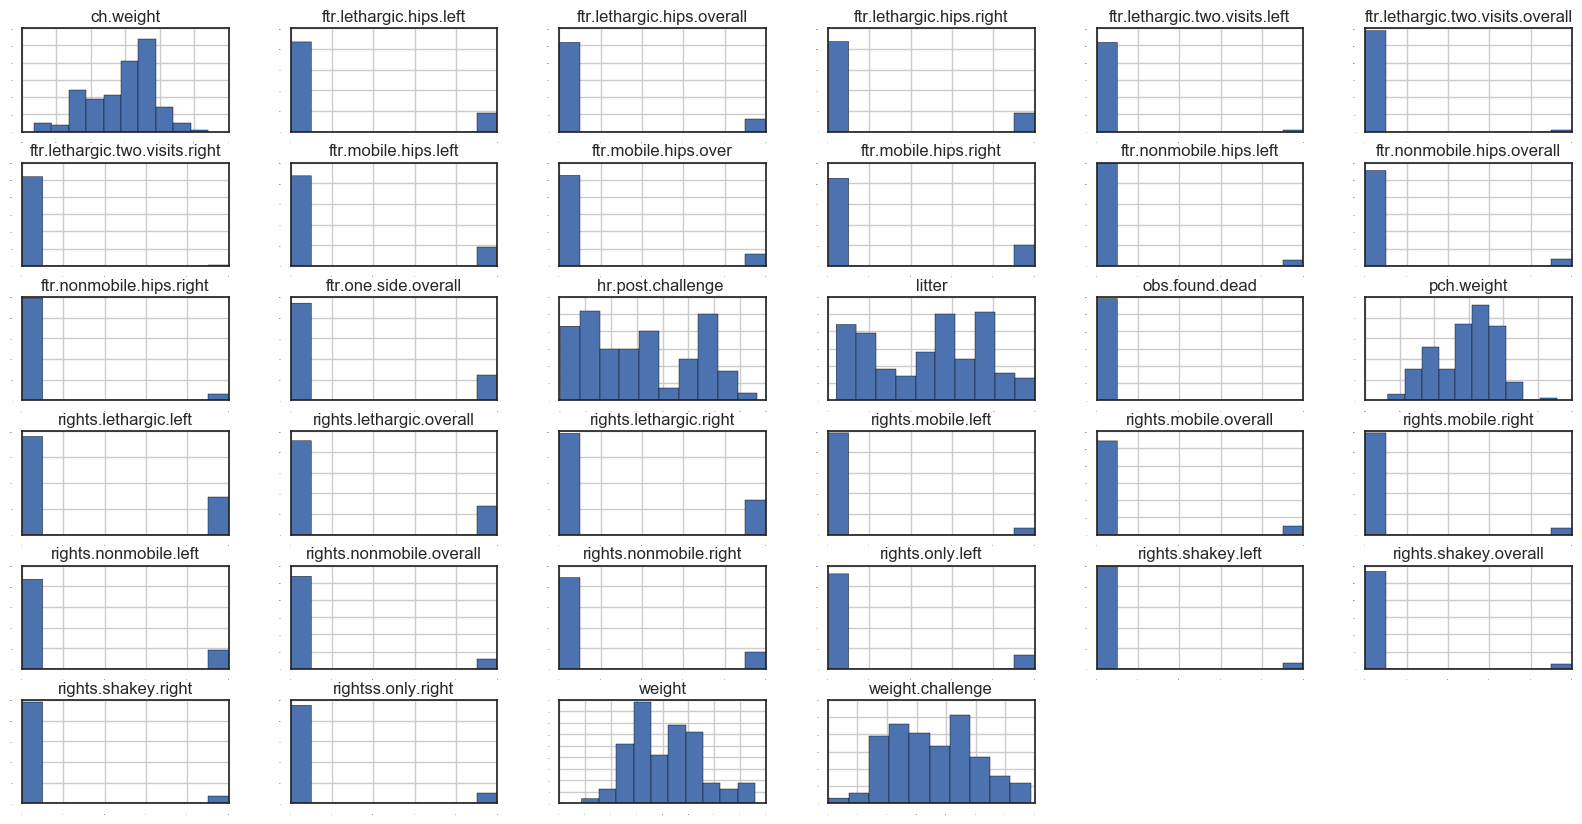

In [106]:
# histograms
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

Because we have a lot of features that are 0/1 we don't get much out of this plot, except that all features/attributes related to `weight` seem to have a gaussian like distribution

### Multimodal Data Visualization

Let's see if we have attributes that correlate

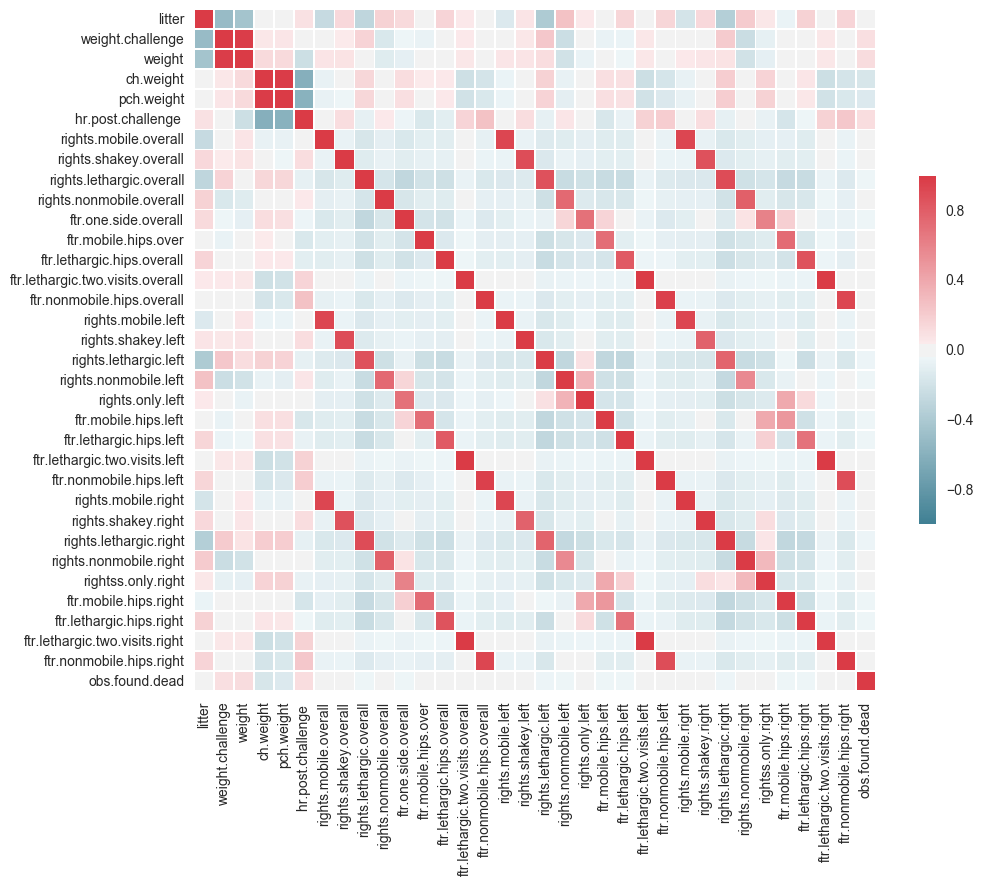

In [107]:
correlations = df.corr(method='pearson')
correlations

# Plot Correlations
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = False
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#for tick in ax.get_xticklabels():
#    tick.set_rotation(90)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

As we can see we have a lot of diagonals in this dataset, which means not all these features are going to be included in the dataset as we have a lot of correlations

We can already spot some positive correlation between the weight and the hours post challenges even if it is a slightly positive (not a strong correlation judging by the colors).

The top left corner seems to have some useful information

Not all the algorithms deal with correlated features equally. Some algorithms like Naive Bayes assumes attributes independence, so it may behaves in an unexpected way, some other approaches like Support Vector Machines care about it much less.

One thing we can do here, is to take the decision to reduce the number of attributes by doing a **Principal Component Aanalysis**, squeezing features that are part of the same components, transform the original dataset and see what this will give us.

But first of all we will need to start doing some transformation to make sure we have all the features included, not only the numerical ones, so we will have to do some transformations.

Let's list all the features we have so far.


## Data Transformation

### Categorical Data Encoding

In [108]:
list(df)

['pupID',
 'litter',
 'sex',
 'outcome',
 'challenge.time',
 'weight.challenge',
 'weight',
 'ch.weight',
 'pch.weight',
 'time',
 'hr.post.challenge ',
 'visit',
 'score.overall',
 'score.left',
 'score.right',
 'rights.mobile.overall',
 'rights.shakey.overall',
 'rights.lethargic.overall',
 'rights.nonmobile.overall',
 'ftr.one.side.overall',
 'ftr.mobile.hips.over',
 'ftr.lethargic.hips.overall',
 'ftr.lethargic.two.visits.overall',
 'ftr.nonmobile.hips.overall',
 'rights.mobile.left',
 'rights.shakey.left',
 'rights.lethargic.left',
 'rights.nonmobile.left',
 'rights.only.left',
 'ftr.mobile.hips.left',
 'ftr.lethargic.hips.left',
 'ftr.lethargic.two.visits.left',
 'ftr.nonmobile.hips.left',
 'rights.mobile.right',
 'rights.shakey.right',
 'rights.lethargic.right',
 'rights.nonmobile.right',
 'rightss.only.right',
 'ftr.mobile.hips.right',
 'ftr.lethargic.hips.right',
 'ftr.lethargic.two.visits.right',
 'ftr.nonmobile.hips.right',
 'obs.found.dead',
 'observations']

The features that we need to transform to numerical ones are :
- sex
- outcome

The ones we will drop that are not useful here are 
- pupId
- Litter
- observations

In [109]:
df_clean = df.drop(['litter', 'pupID', 'visit', 'observations'], axis=1)

Let's now merge the **outcome** values corresponding to `die` and `found dead` to make a binary classification instead of having three classes

In [110]:
df_clean.outcome = df_clean.outcome.str.replace("found.dead","die")
df_clean.groupby('outcome').size()

outcome
die     184
live    113
dtype: int64

Now we need to codify the classes `live` and `die` with `0` and `1`

In [111]:
# Verify code for the outcome
zip(df_clean.outcome, pd.factorize(df_clean.outcome)[0])

[('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),

In [112]:
transformed_outcome = pd.factorize(df_clean.outcome)
df_clean['outcome'] = transformed_outcome[0].astype(float)

Now we will do the same with `sex` attribute

In [113]:
zip(df_clean.sex, pd.factorize(df_clean.sex)[0])
transformed_sex = pd.factorize(df_clean.sex)
df_clean['sex'] = transformed_sex[0].astype(float)

Now let's remove the time related attributes as we are not doing any time series analysis here

In [114]:
df_clean = df_clean.drop(['challenge.time', 'time'], axis=1)

Three columns remain having `string` values while a number is expected, we will fix that by changing `FD == Found Dead` values into `0`

In [115]:
df_clean['score.left'] = df_clean['score.left'].str.replace("FD","0").astype(float)   

In [116]:
df_clean['score.right'] = df_clean['score.right'].str.replace("FD","0").astype(float)
df_clean['score.overall'] = df_clean['score.overall'].str.replace("FD","0").astype(float)


### Missing Data Imputation


In [117]:
#fill_NaN = Imputer(missing_values=np.nan, strategy='mean', axis=1)
#imputed_DF = pd.DataFrame(fill_NaN.fit_transform(df_clean))
#imputed_DF.columns = df_clean.columns
#imputed_DF.index = df_clean.index

imputed_DF = df_clean.dropna() 
imputed_DF.columns = df_clean.columns
#imputed_DF.index = df_clean.index

In [118]:
imputed_DF.head()

,sex,outcome,weight.challenge,weight,ch.weight,pch.weight,hr.post.challenge,score.overall,score.left,score.right,...,rights.mobile.right,rights.shakey.right,rights.lethargic.right,rights.nonmobile.right,rightss.only.right,ftr.mobile.hips.right,ftr.lethargic.hips.right,ftr.lethargic.two.visits.right,ftr.nonmobile.hips.right,obs.found.dead
23,0.0,1.0,4.31,4.33,-0.02,-0.464,12.333,6.0,6.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
26,0.0,1.0,4.80,4.91,-0.11,-2.292,12.333,8.0,6.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
29,1.0,1.0,5.01,5.02,-0.01,-0.200,12.333,8.0,8.0,8.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
32,0.0,0.0,4.98,4.88,0.10,2.008,12.333,6.0,6.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
35,0.0,1.0,3.93,3.97,-0.04,-1.018,12.333,8.0,8.0,8.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [119]:
#df_clean_no_nas = df_clean.dropna()
#0df_clean_no_nas.head()
df_clean_2 = imputed_DF

In [120]:
df_clean_2.shape

(181, 38)

In [121]:
df_clean_2.groupby('outcome').size()

outcome
0.0     70
1.0    111
dtype: int64

Now let's drop the outcome column as we will not be counting it as feature

In [122]:
df_final = df_clean_2.drop(['outcome', 'obs.found.dead'], axis=1)


### Scaling Data : Normalization


In [123]:
#df_scaled = preprocessing.scale(df_final)
scaler = StandardScaler().fit(df_final)
normalized_df = scaler.transform(df_final)

In [124]:
df_scaled_df = pd.DataFrame(normalized_df, columns = df_final.columns)

In [125]:
df_scaled_df.head()

,sex,weight.challenge,weight,ch.weight,pch.weight,hr.post.challenge,score.overall,score.left,score.right,rights.mobile.overall,...,ftr.nonmobile.hips.left,rights.mobile.right,rights.shakey.right,rights.lethargic.right,rights.nonmobile.right,rightss.only.right,ftr.mobile.hips.right,ftr.lethargic.hips.right,ftr.lethargic.two.visits.right,ftr.nonmobile.hips.right
0,-1.124,0.171,0.385,-0.063,-0.050,-1.197,0.901,0.849,0.857,-0.266,...,-0.29,-0.254,-0.311,2.079,-0.437,-0.332,-0.463,-0.507,-0.15,-0.301
1,-1.124,0.878,1.258,-0.546,-0.470,-1.197,1.824,0.849,-0.436,3.753,...,-0.29,-0.254,-0.311,-0.481,-0.437,-0.332,2.158,-0.507,-0.15,-0.301
2,0.890,1.181,1.423,-0.010,0.010,-1.197,1.824,1.722,1.720,3.753,...,-0.29,3.931,-0.311,-0.481,-0.437,-0.332,-0.463,-0.507,-0.15,-0.301
3,-1.124,1.138,1.213,0.580,0.516,-1.197,0.901,0.849,0.857,-0.266,...,-0.29,-0.254,-0.311,2.079,-0.437,-0.332,-0.463,-0.507,-0.15,-0.301
4,-1.124,-0.377,-0.157,-0.171,-0.177,-1.197,1.824,1.722,1.720,3.753,...,-0.29,3.931,-0.311,-0.481,-0.437,-0.332,-0.463,-0.507,-0.15,-0.301


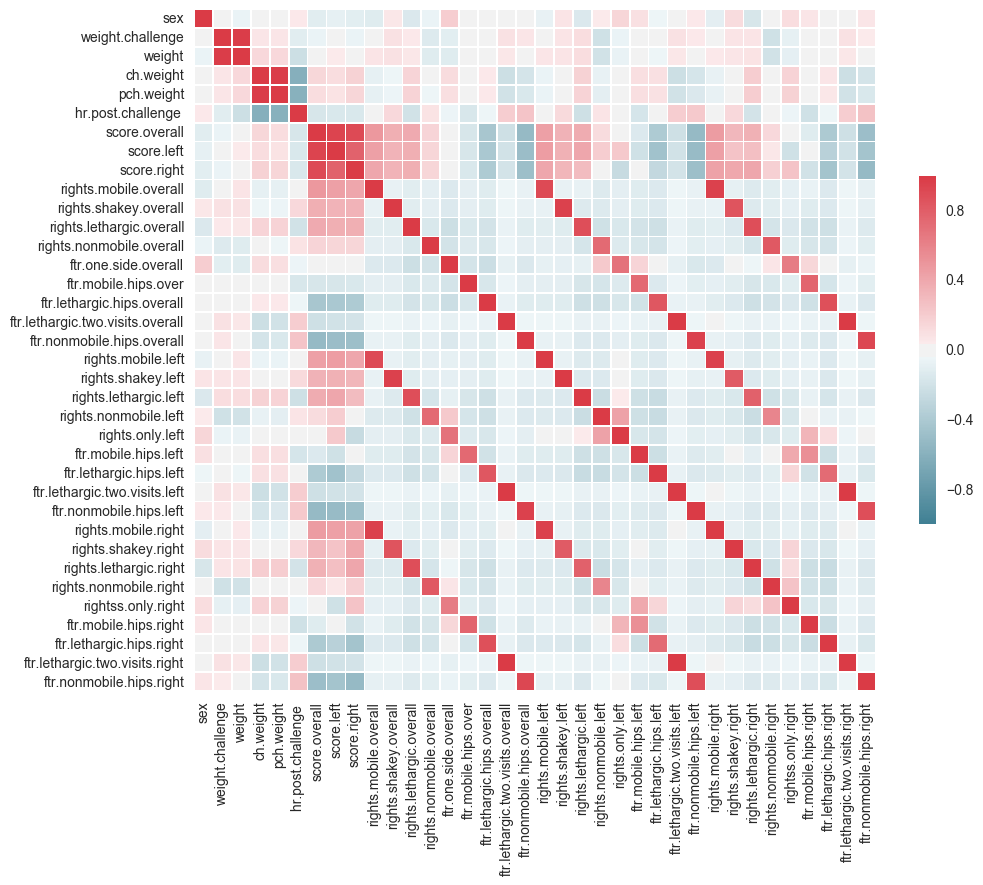

In [126]:
correlations = df_scaled_df.corr(method='pearson')
correlations

# Plot Correlations
corr = df_scaled_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = False
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#for tick in ax.get_xticklabels():
#    tick.set_rotation(90)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

**What we see here is the impact of data normalization on the extraction of meaningful information, here correlation, between different features**, after normalizing the data we can clearly see a block on the right corner of the correlation matrix, showing that the observation made by the scientists in the lab related to left and right behaviour are highly correlated.

What we need to do now is proceed for feature selection applying different methods and test this process with different classifiers in order to study the best combination of feature selection and model accuracy (algorithm)

# Predicting outcome WITHOUT feature selection

In [127]:
X = df_scaled_df
Y = df_clean_2["outcome"]
names = df_scaled_df.columns

It is a good idea to use a validation hold-out set. This is a sample of the data that we hold back from our analysis and modeling. We use it right at the end of our project to confirm the accuracy of our final model. It is a smoke test that we can use to see if we messed up and to give us confidence on our estimates of accuracy on unseen data. We will use 80% of the dataset for modeling and hold back 20% for validation.

In [128]:
# Validation dataset

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y,test_size=validation_size, random_state=seed)

## Base Line Models


LR: 0.619524 (0.101830)
LDA: 0.624762 (0.093866)
KNN: 0.680476 (0.131784)
CART: 0.717143 (0.087785)
NB: 0.464286 (0.082595)
SVM: 0.645714 (0.078772)


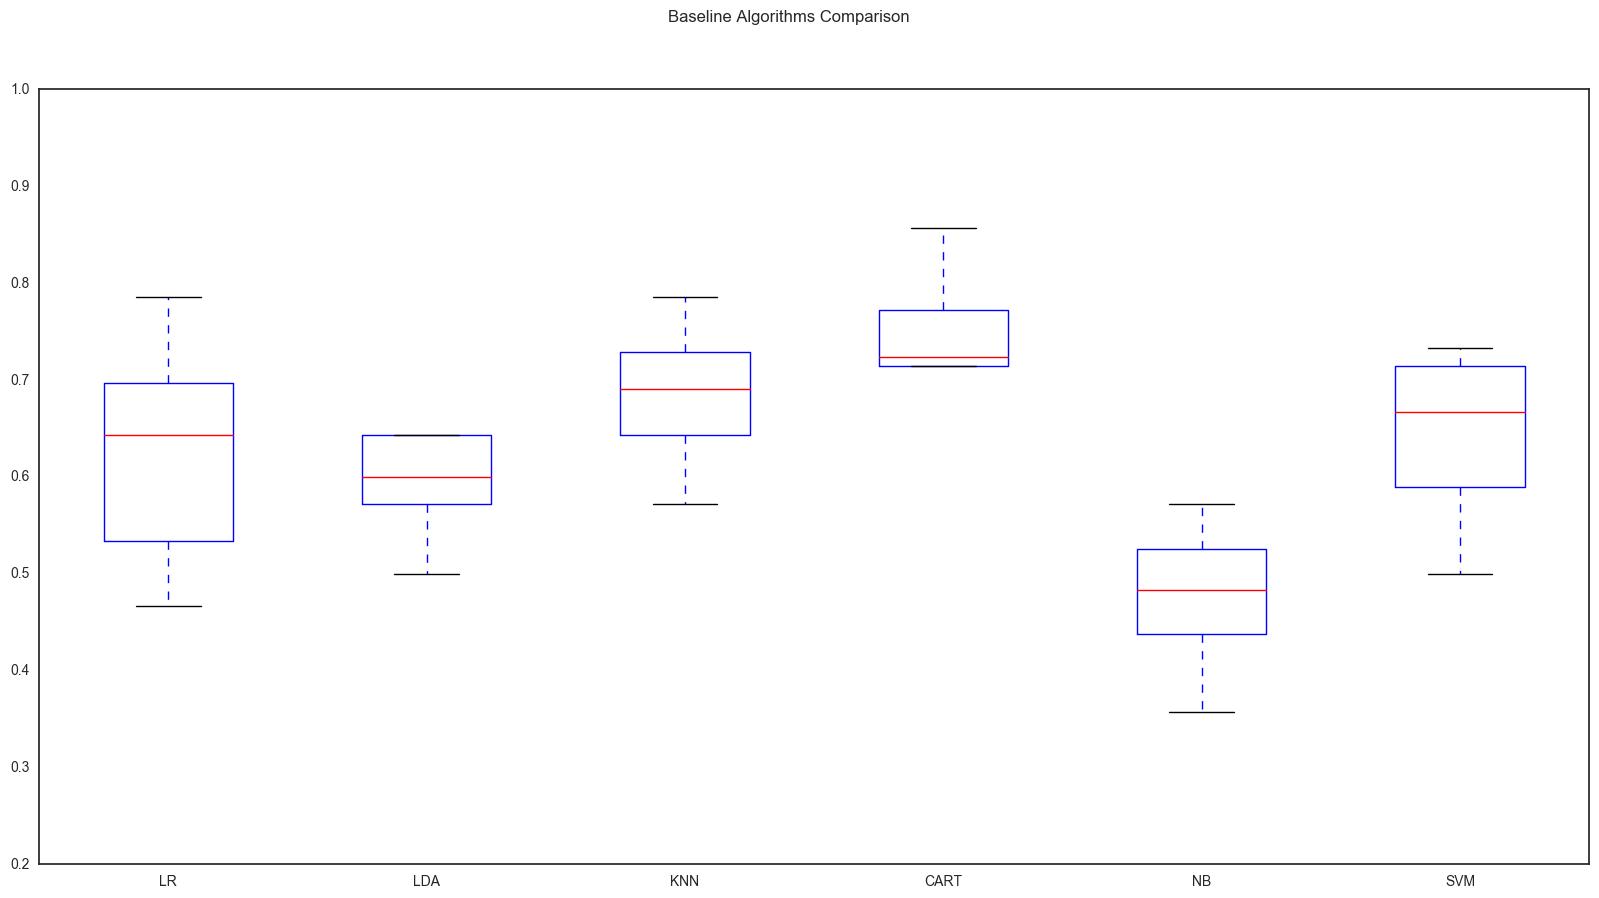

In [129]:
def base_line_models(training_set, outcome):
    # Test options and evaluation metric
    num_folds = 10
    num_instances = len(training_set)
    seed = 7
    scoring = 'accuracy'

    # Spot-Check Algorithms
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))
    results = []
    names = []
    for name, model in models:
        kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
        cv_results = cross_validation.cross_val_score(model, training_set, outcome, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    # Compare Algorithms
    fig = plt.figure()
    fig.suptitle('Baseline Algorithms Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

base_line_models(X_train, Y_train)

## Ensemble Models


AB: 0.724286 (0.091583)
GBM: 0.752381 (0.096256)
RF: 0.724286 (0.096995)
ET: 0.676667 (0.136716)
XGB: 0.786667 (0.098717)


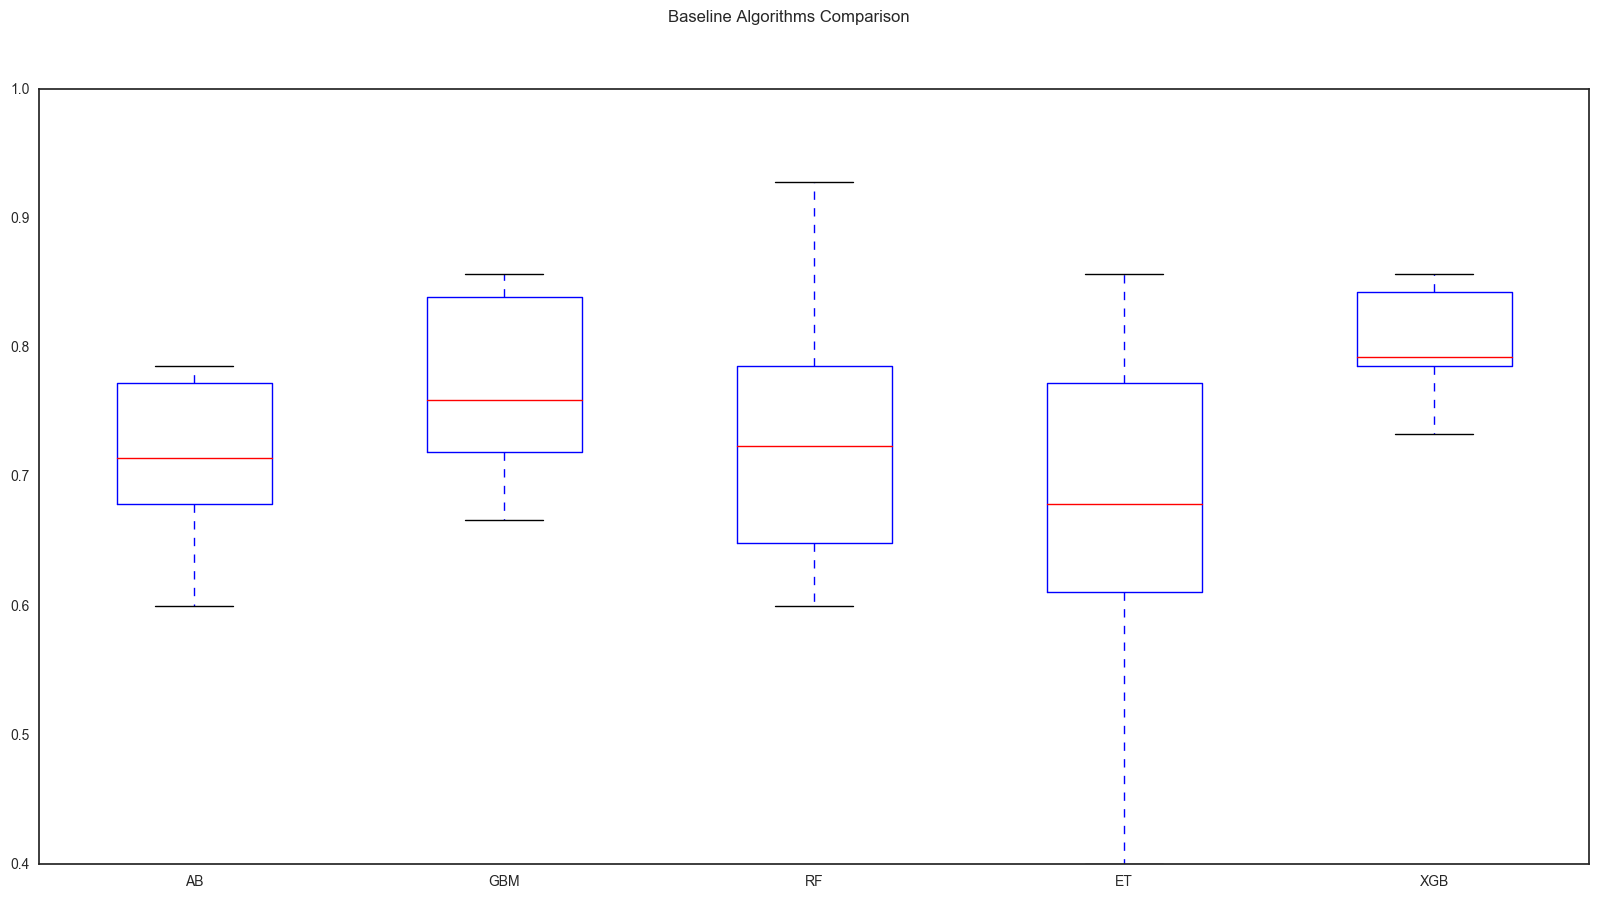

In [130]:
def ensemble_models(training_set, outcome):
    # Test options and evaluation metric
    num_folds = 10
    num_instances = len(training_set)
    seed = 7
    scoring = 'accuracy'

    # ensembles
    ensembles = []
    ensembles.append(('AB', AdaBoostClassifier()))
    ensembles.append(('GBM', GradientBoostingClassifier()))
    ensembles.append(('RF', RandomForestClassifier()))
    ensembles.append(('ET', ExtraTreesClassifier()))
    ensembles.append(('XGB', xgboost.XGBClassifier()))
    results = []
    names = []
    for name, model in ensembles:
        kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
        cv_results = cross_validation.cross_val_score(model, training_set, outcome, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    # Compare Algorithms
    fig = plt.figure()
    fig.suptitle('Baseline Algorithms Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

ensemble_models(X_train, Y_train)

## Model Validations

Validation based on LR
0.810810810811
[[11  1]
 [ 6 19]]
[[11  1]
 [ 6 19]]
             precision    recall  f1-score   support

        0.0       0.65      0.92      0.76        12
        1.0       0.95      0.76      0.84        25

avg / total       0.85      0.81      0.82        37



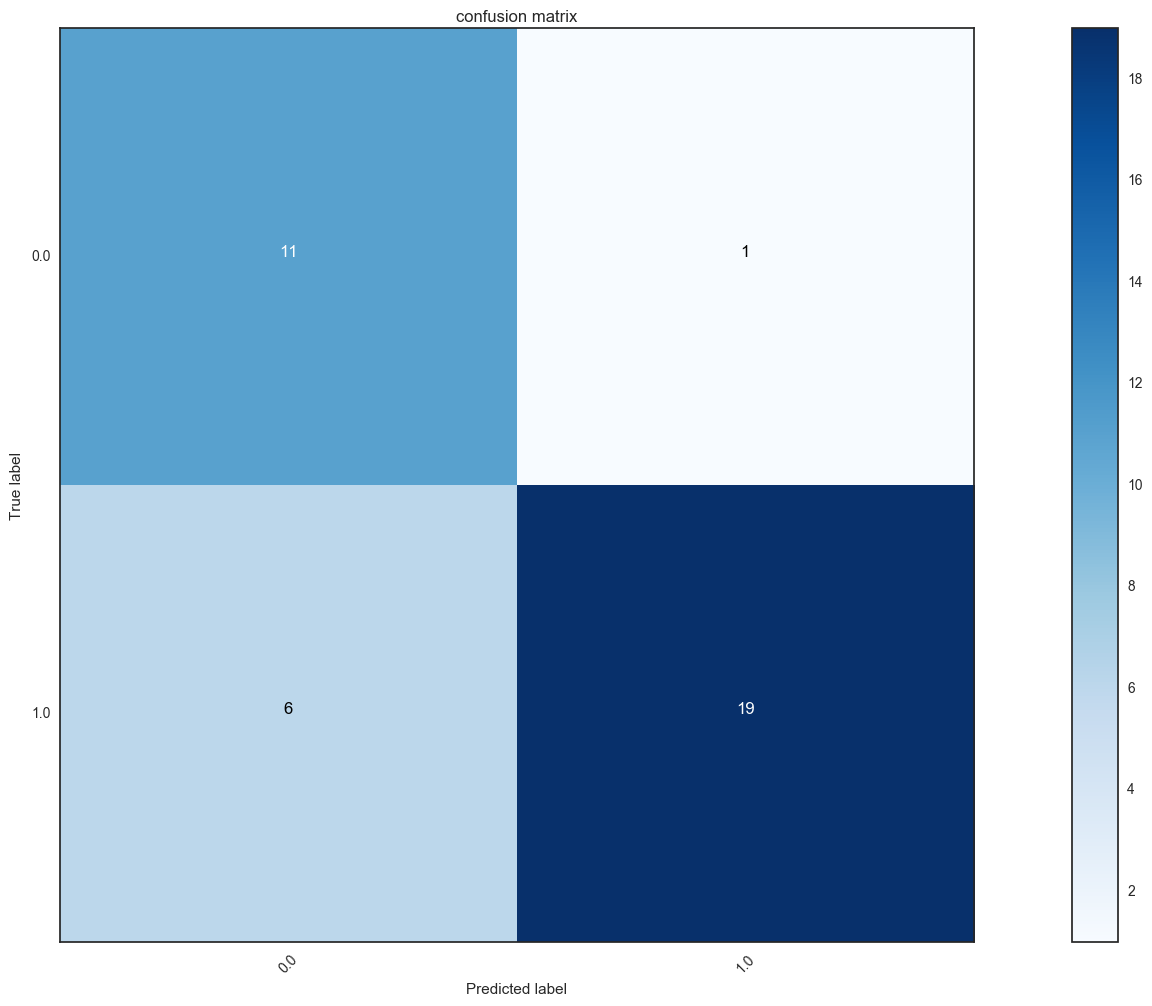

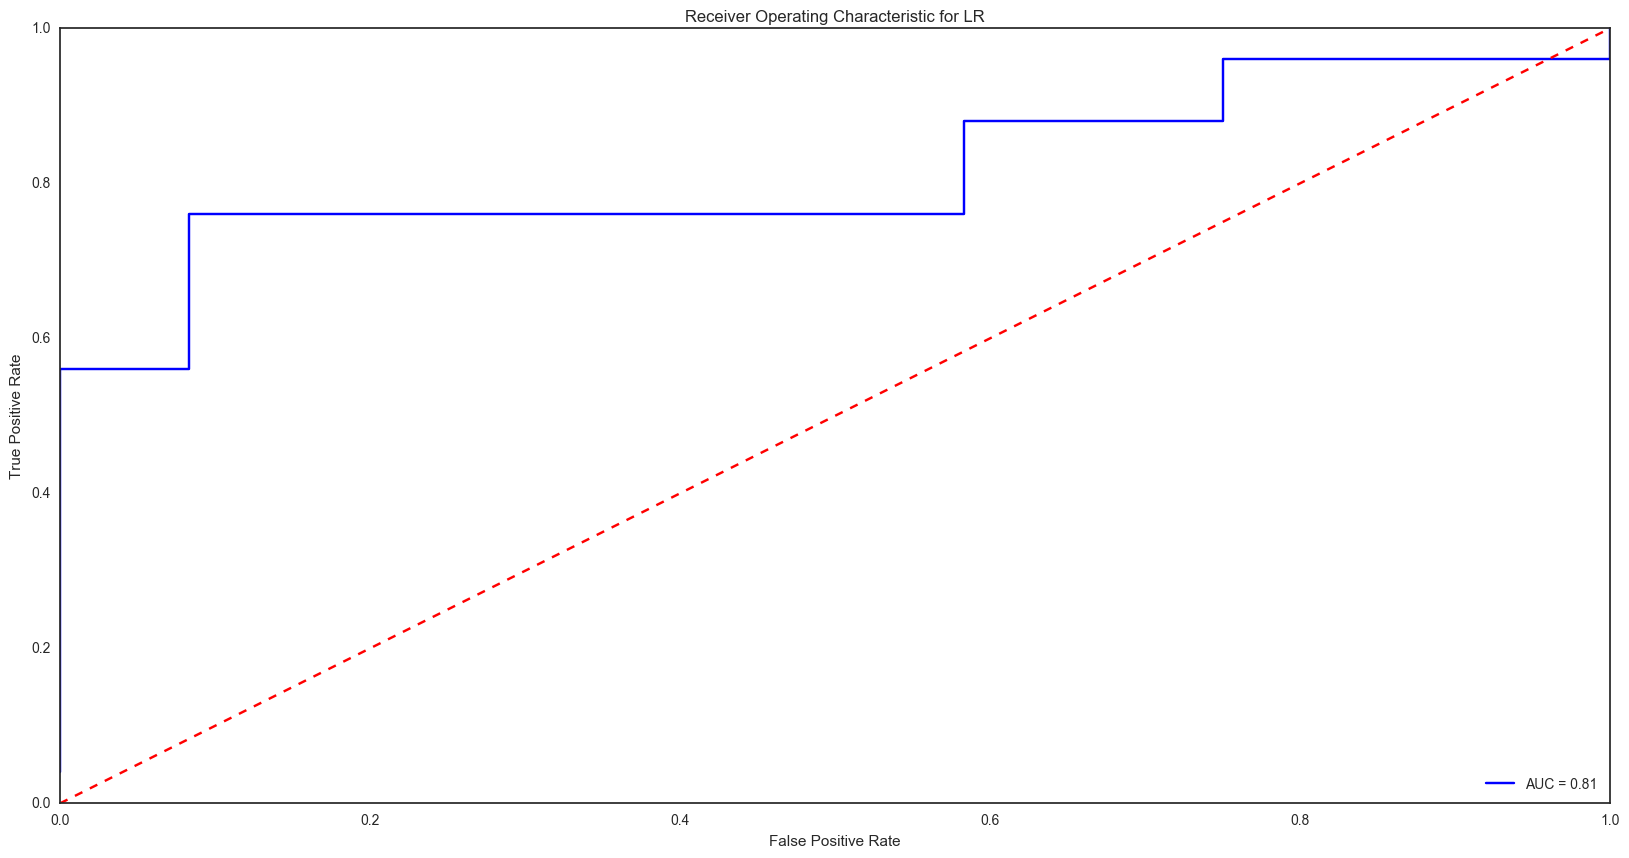

Validation based on LDA
0.702702702703
[[ 8  4]
 [ 7 18]]
[[ 8  4]
 [ 7 18]]
             precision    recall  f1-score   support

        0.0       0.53      0.67      0.59        12
        1.0       0.82      0.72      0.77        25

avg / total       0.73      0.70      0.71        37



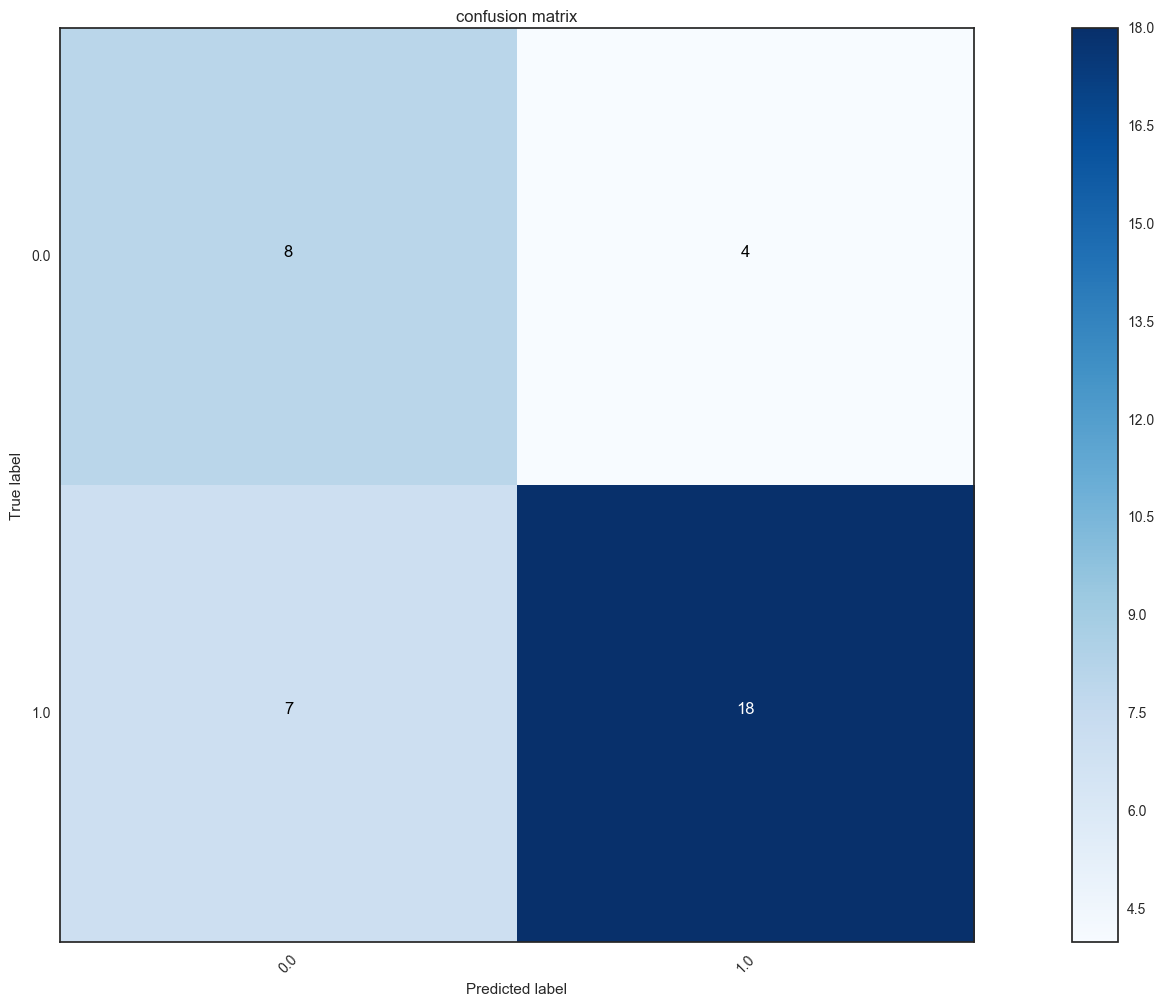

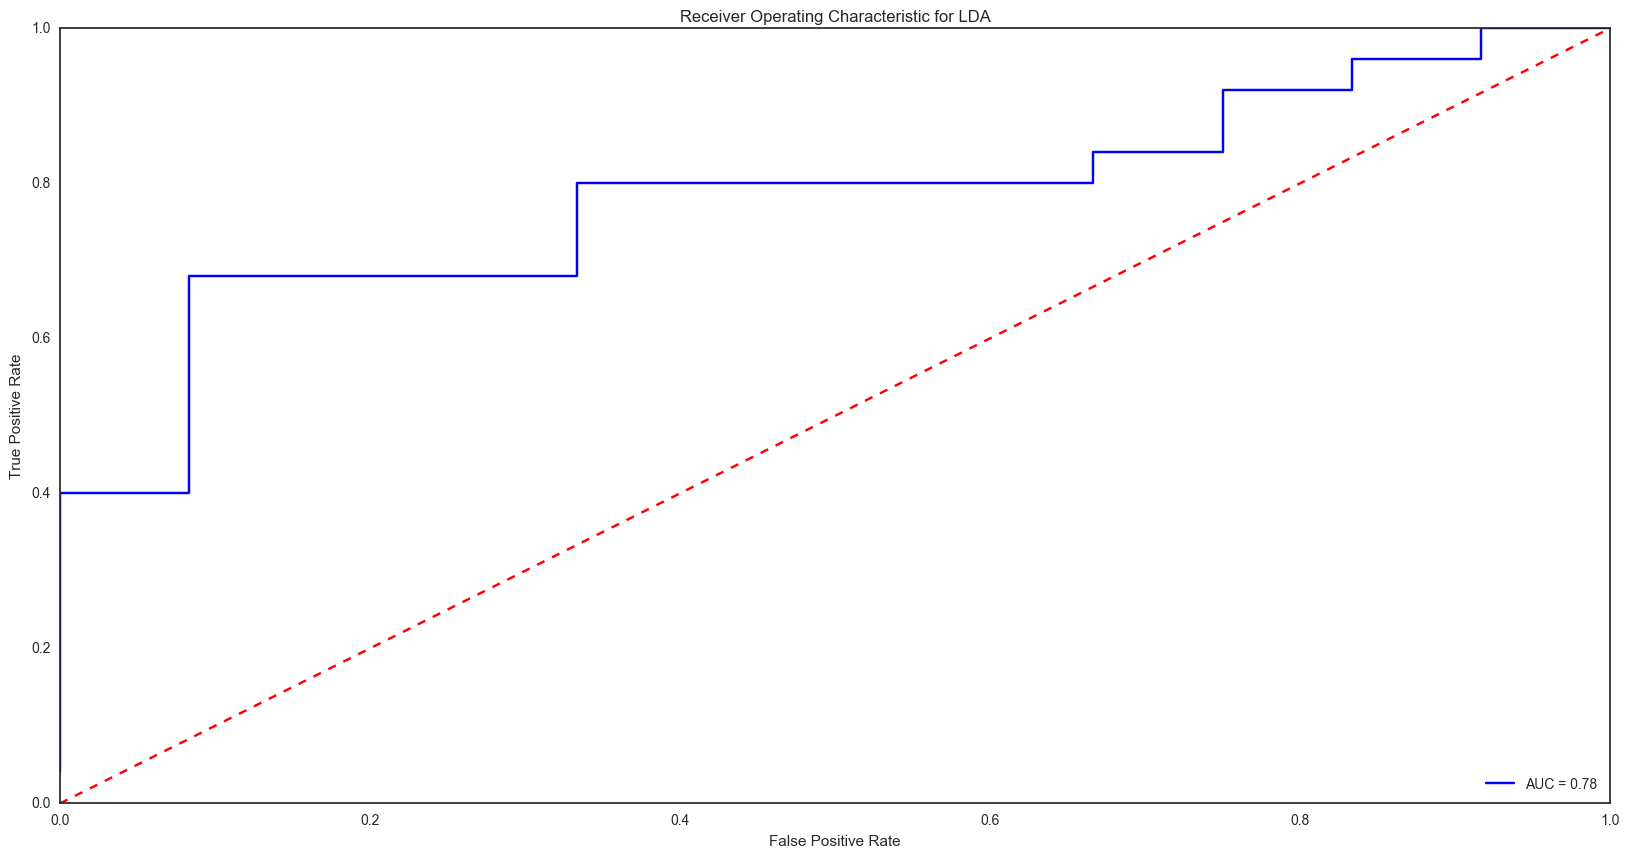

Validation based on KNN
0.756756756757
[[ 7  5]
 [ 4 21]]
[[ 7  5]
 [ 4 21]]
             precision    recall  f1-score   support

        0.0       0.64      0.58      0.61        12
        1.0       0.81      0.84      0.82        25

avg / total       0.75      0.76      0.75        37



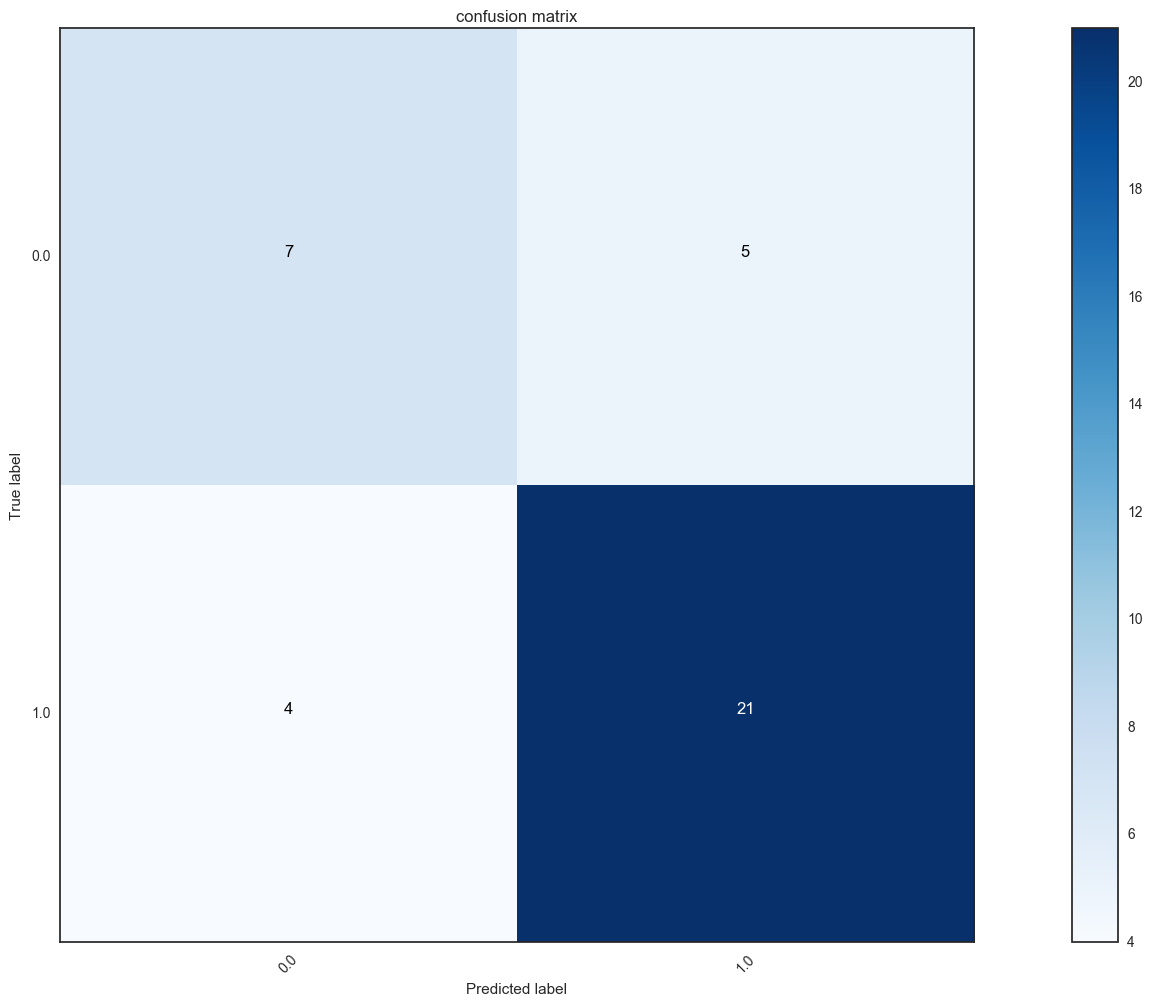

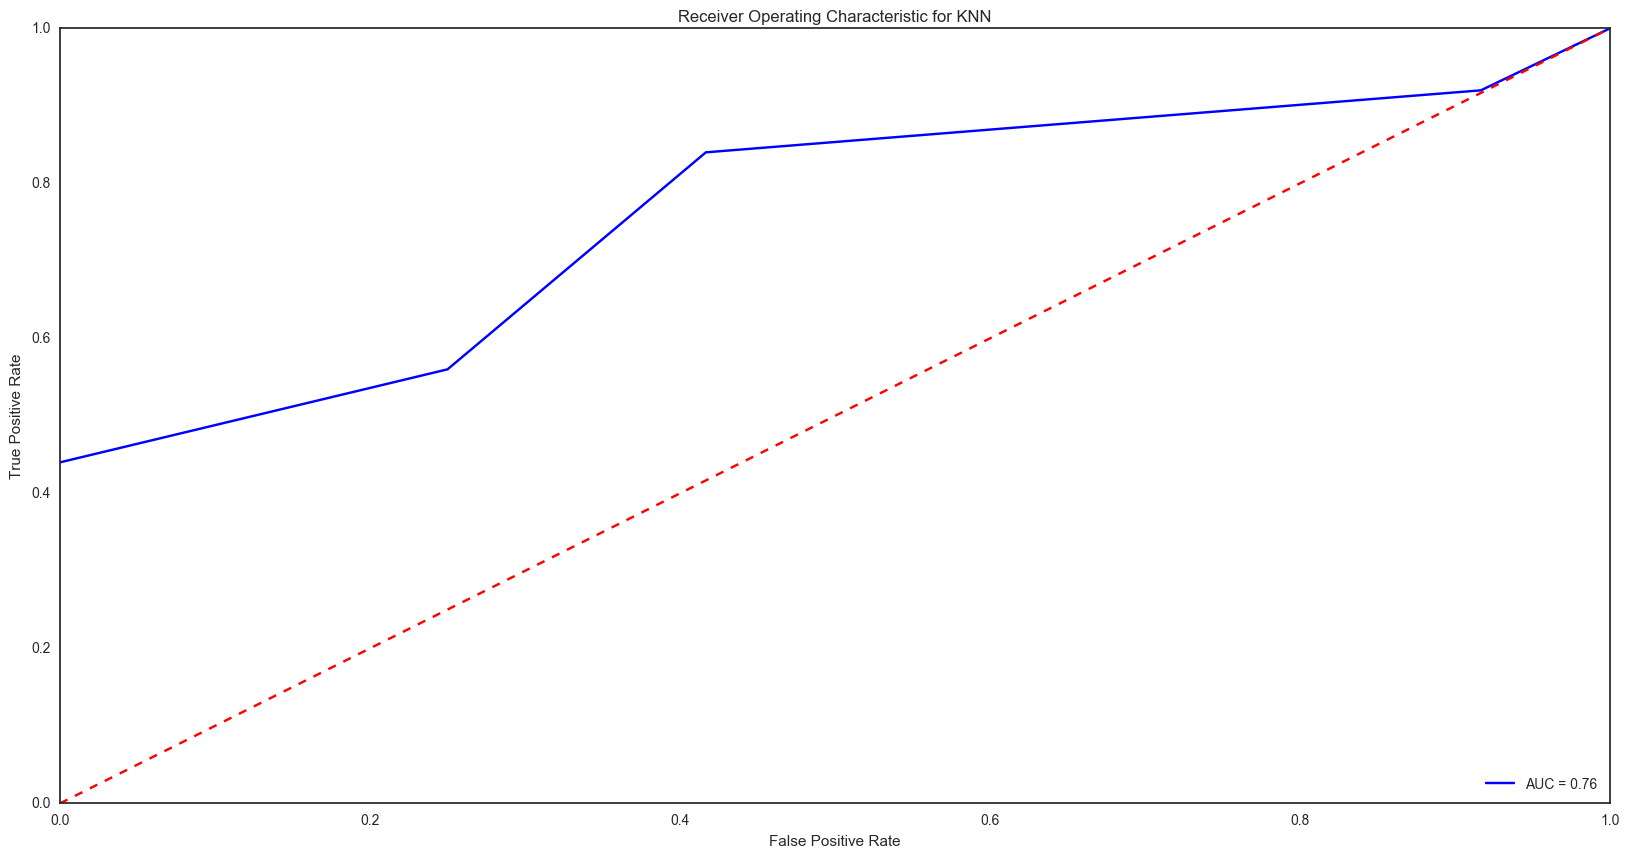

Validation based on CART
0.810810810811
[[ 9  3]
 [ 4 21]]
[[ 9  3]
 [ 4 21]]
             precision    recall  f1-score   support

        0.0       0.69      0.75      0.72        12
        1.0       0.88      0.84      0.86        25

avg / total       0.82      0.81      0.81        37



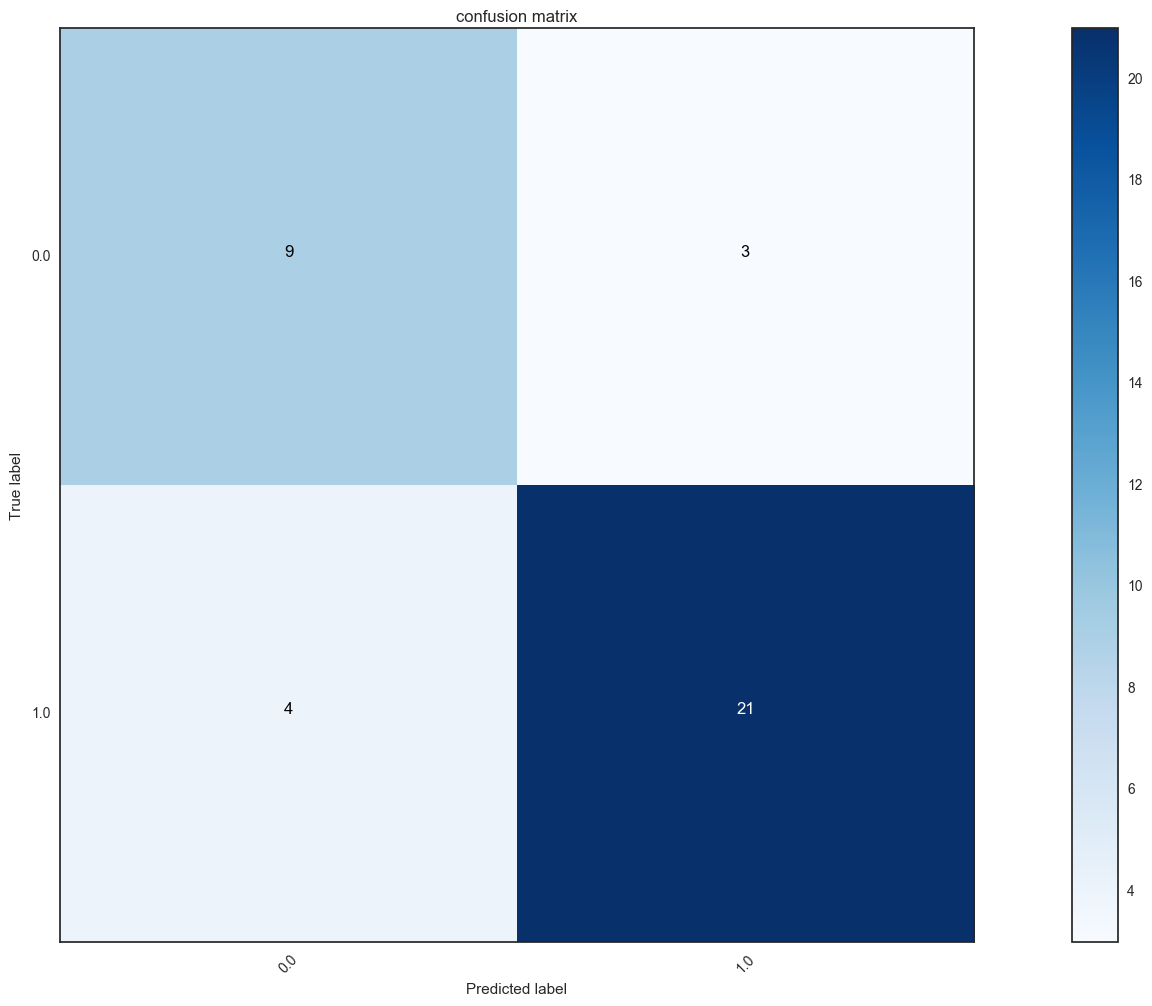

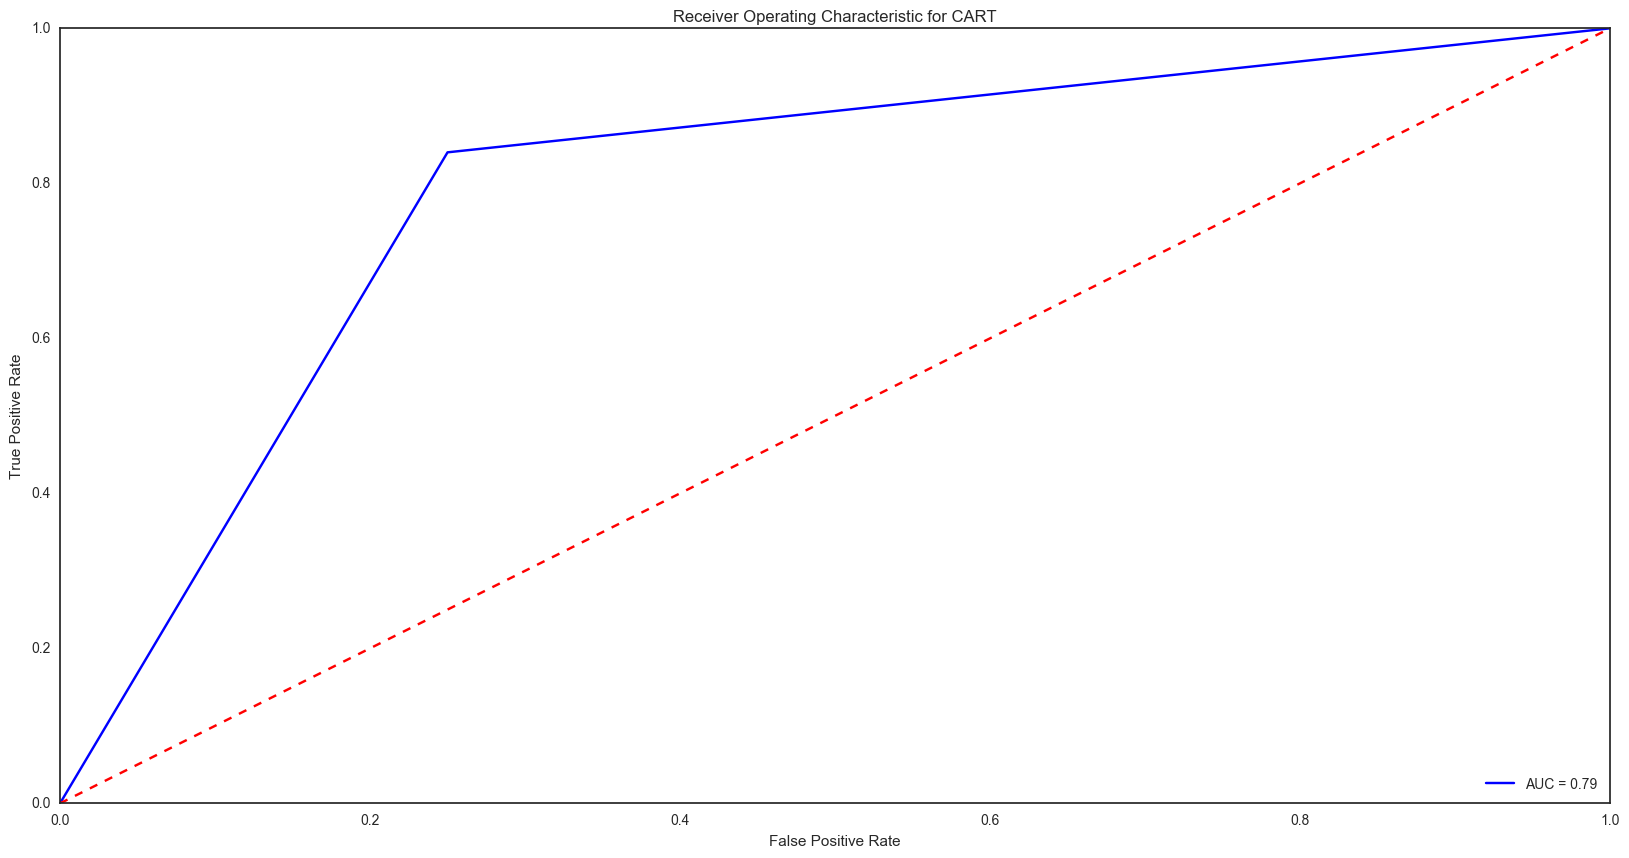

Validation based on NB
0.567567567568
[[12  0]
 [16  9]]
[[12  0]
 [16  9]]
             precision    recall  f1-score   support

        0.0       0.43      1.00      0.60        12
        1.0       1.00      0.36      0.53        25

avg / total       0.81      0.57      0.55        37



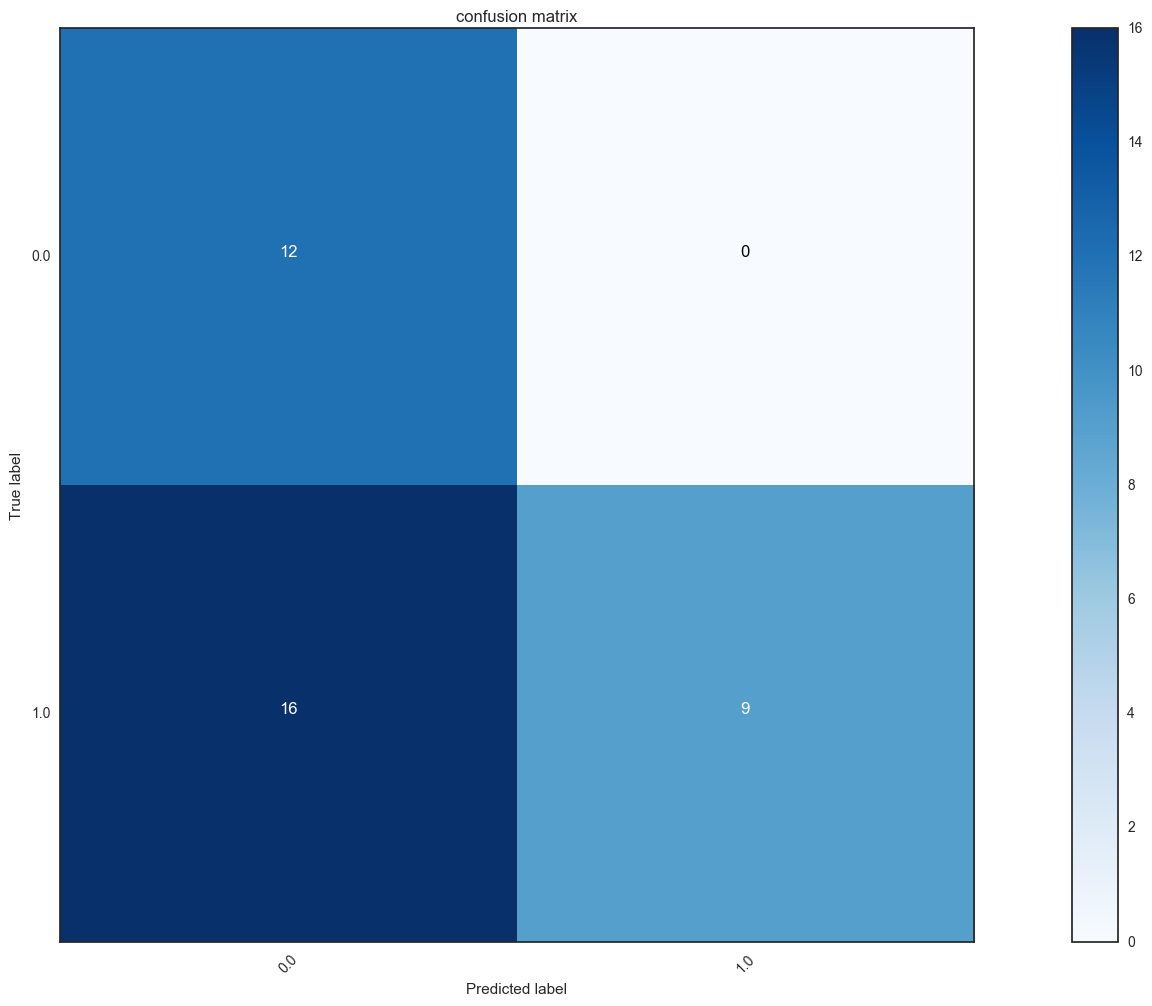

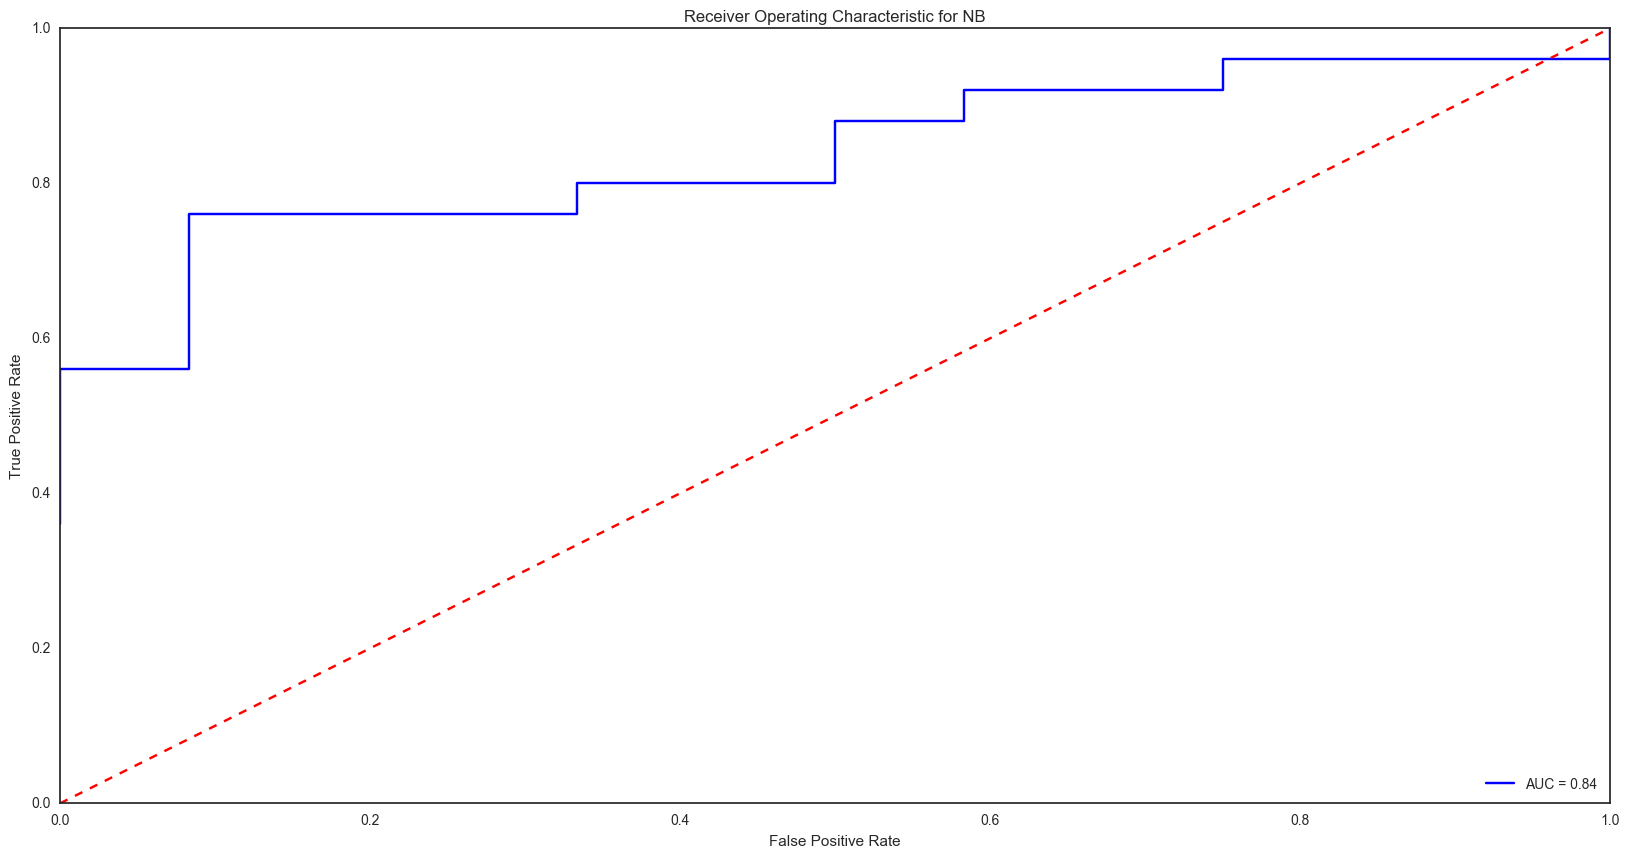

Validation based on SVM
0.702702702703
[[ 7  5]
 [ 6 19]]
[[ 7  5]
 [ 6 19]]
             precision    recall  f1-score   support

        0.0       0.54      0.58      0.56        12
        1.0       0.79      0.76      0.78        25

avg / total       0.71      0.70      0.71        37



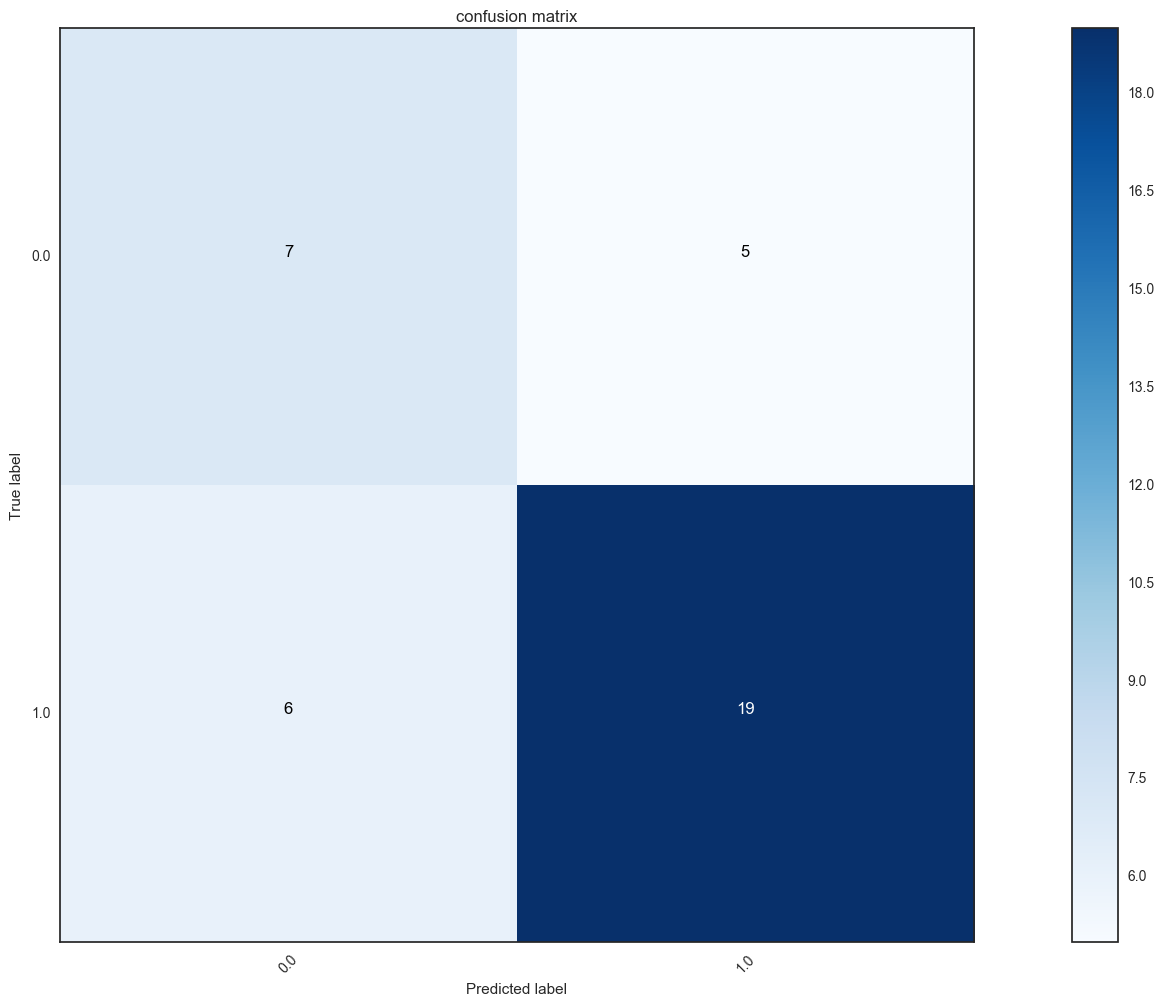

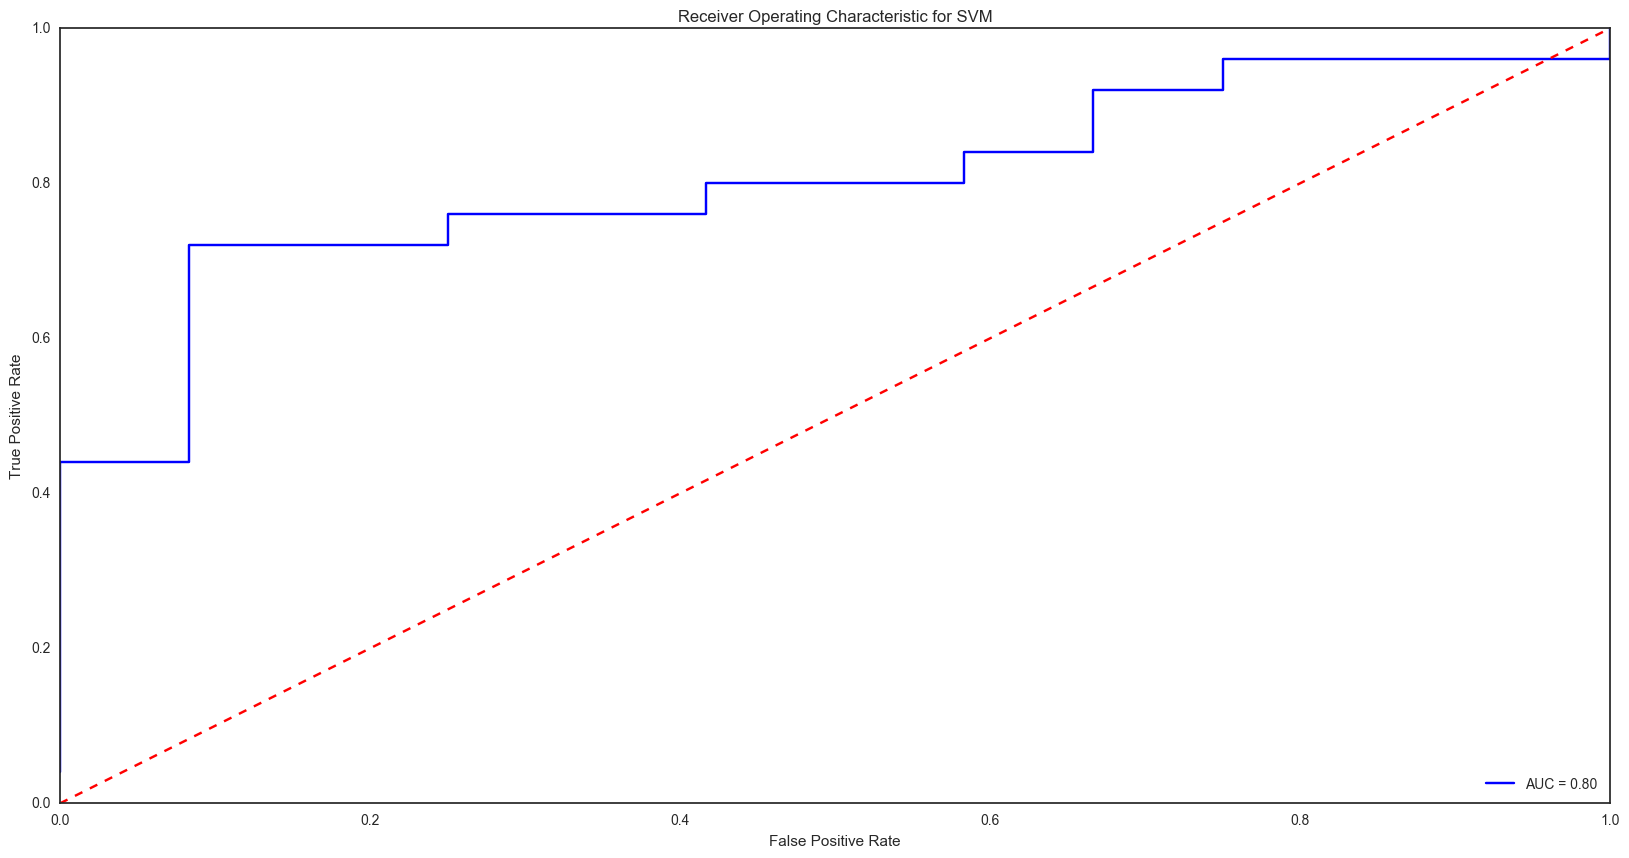

Validation based on AB
0.891891891892
[[10  2]
 [ 2 23]]
[[10  2]
 [ 2 23]]
             precision    recall  f1-score   support

        0.0       0.83      0.83      0.83        12
        1.0       0.92      0.92      0.92        25

avg / total       0.89      0.89      0.89        37



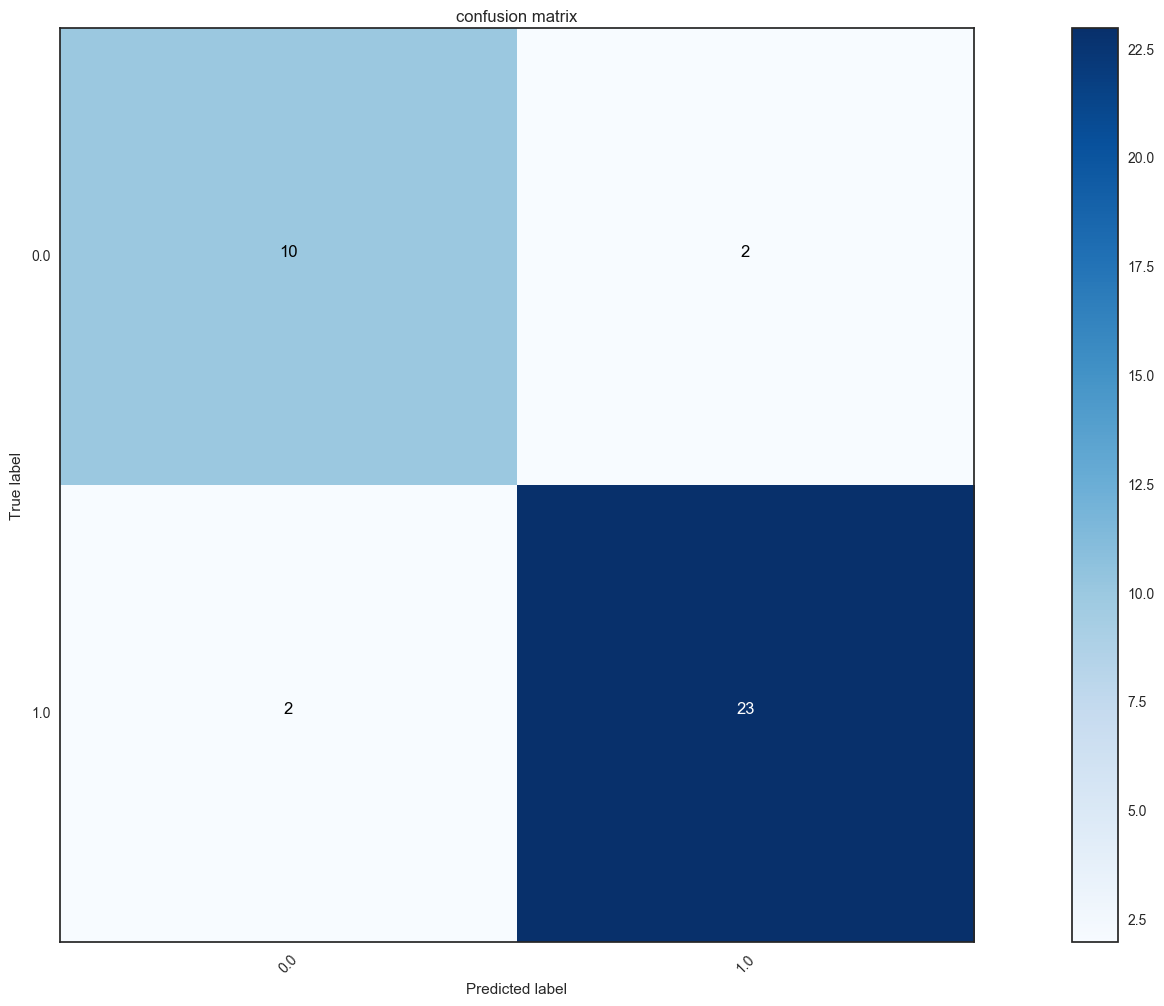

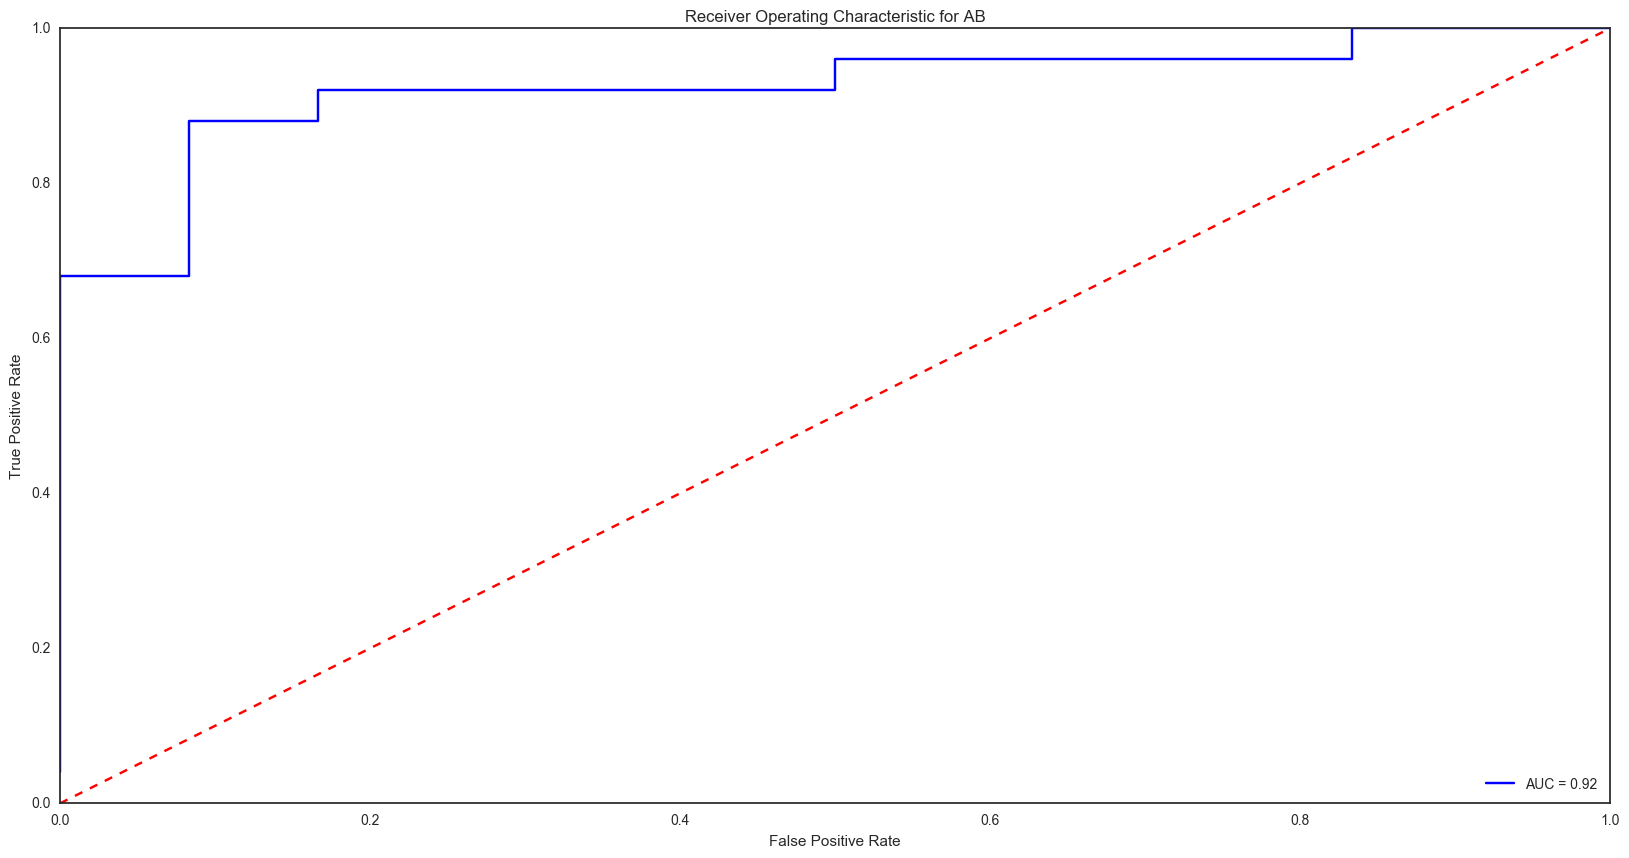

Validation based on GBM
0.837837837838
[[ 7  5]
 [ 1 24]]
[[ 7  5]
 [ 1 24]]
             precision    recall  f1-score   support

        0.0       0.88      0.58      0.70        12
        1.0       0.83      0.96      0.89        25

avg / total       0.84      0.84      0.83        37



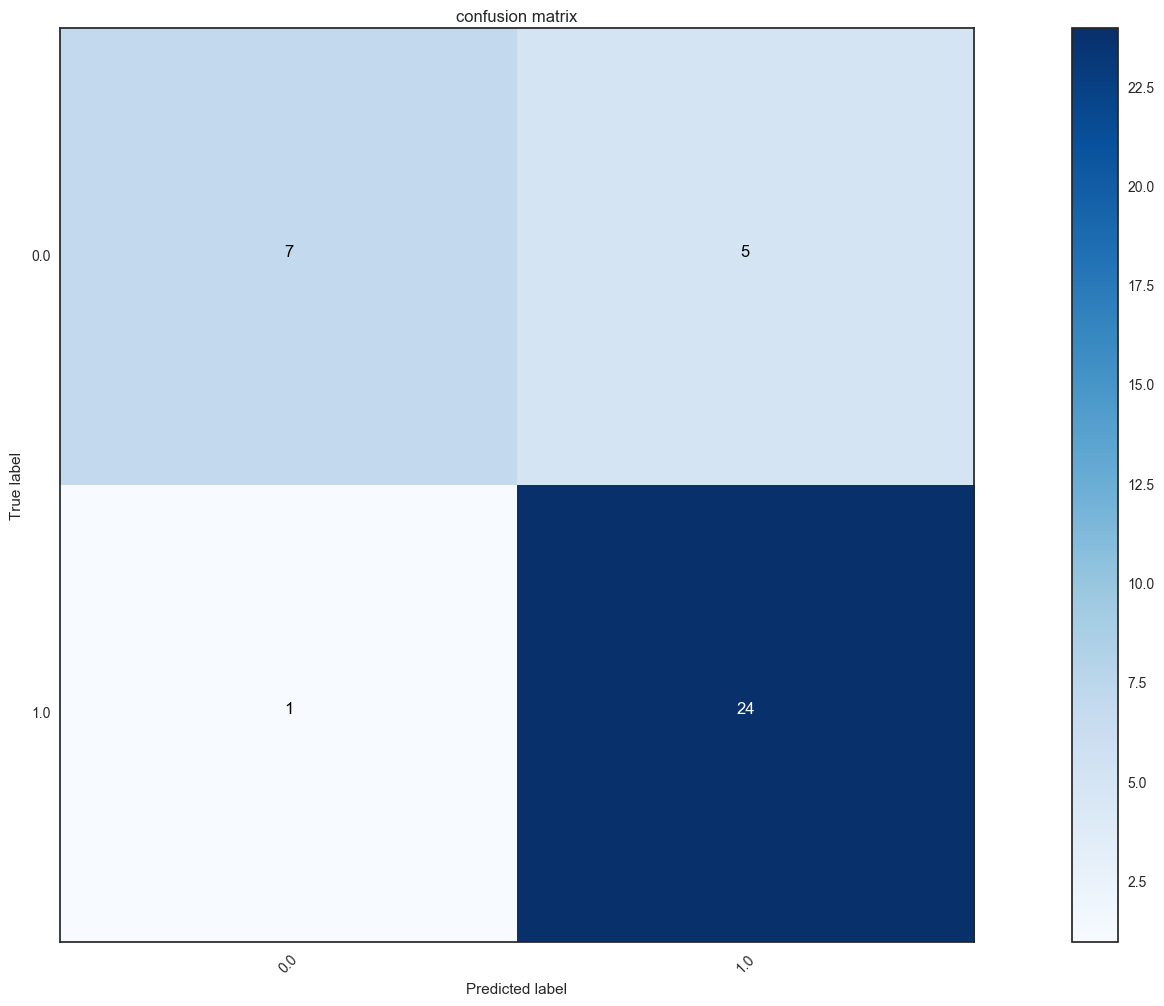

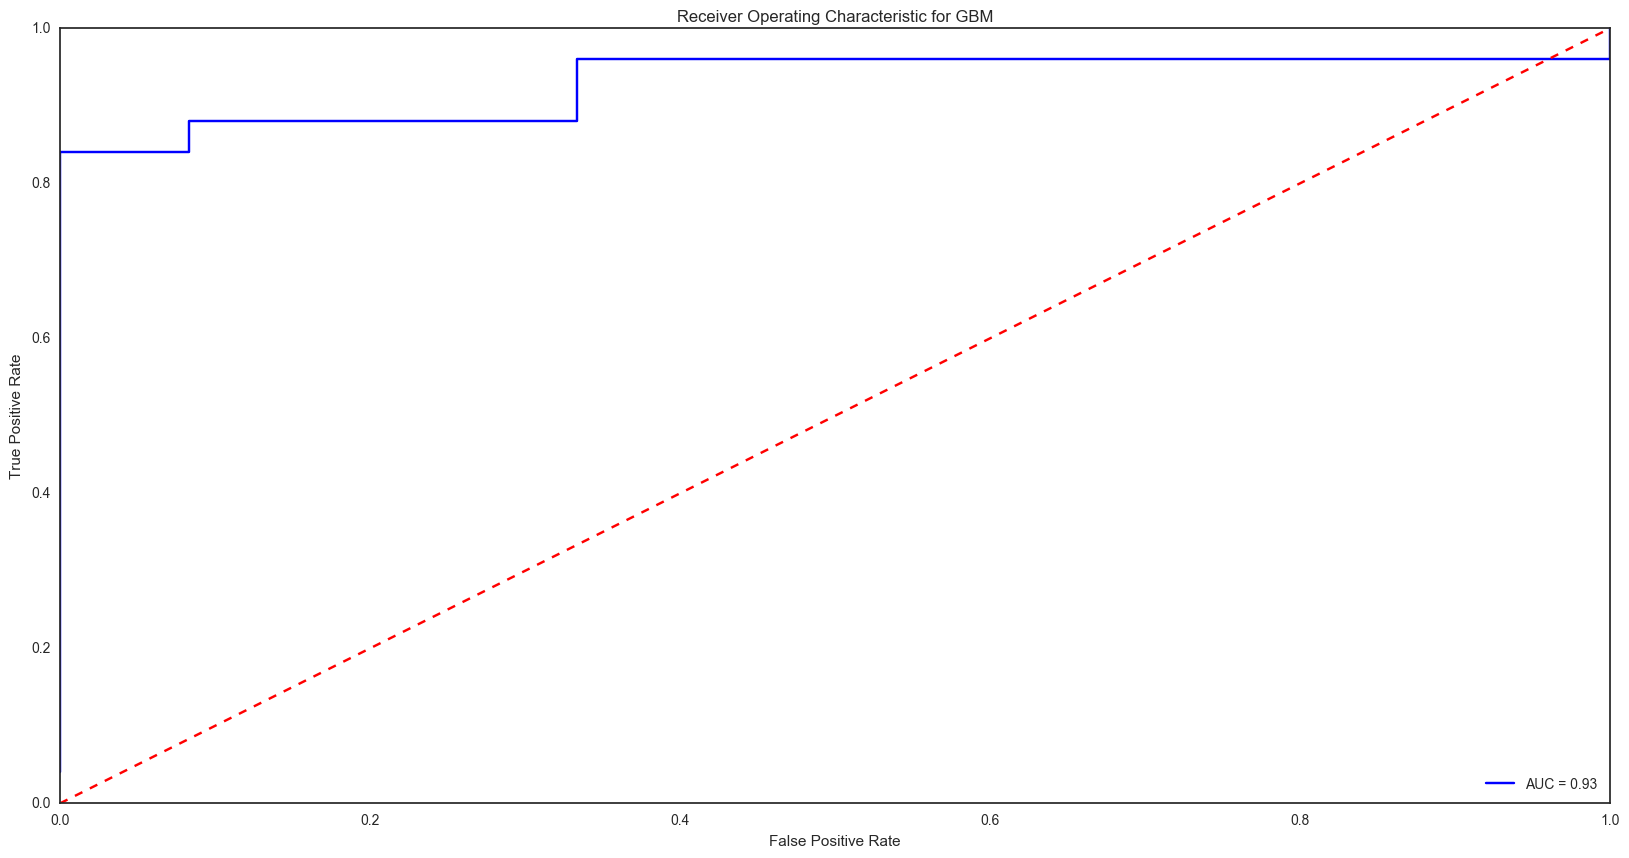

Validation based on RF
0.72972972973
[[ 9  3]
 [ 7 18]]
[[ 9  3]
 [ 7 18]]
             precision    recall  f1-score   support

        0.0       0.56      0.75      0.64        12
        1.0       0.86      0.72      0.78        25

avg / total       0.76      0.73      0.74        37



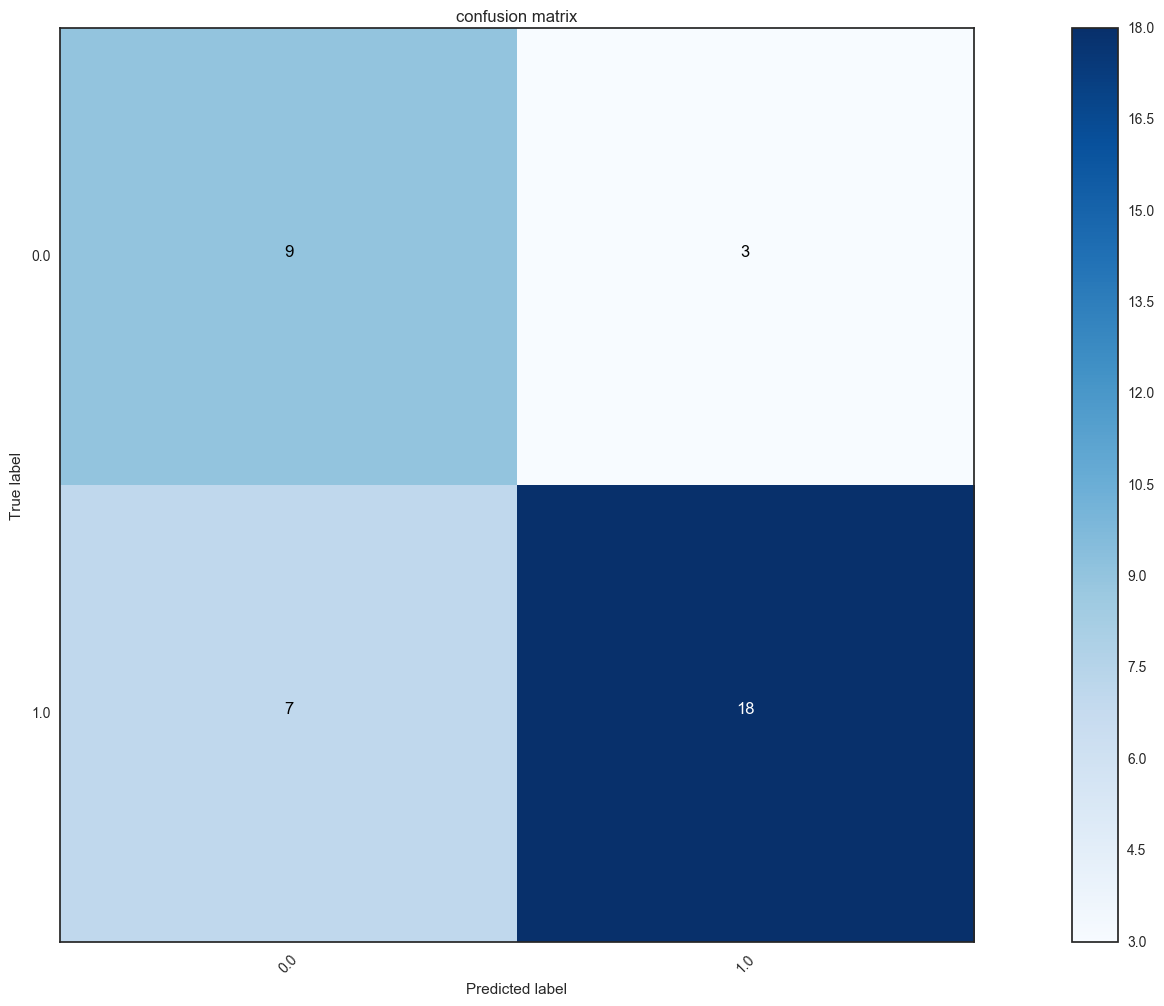

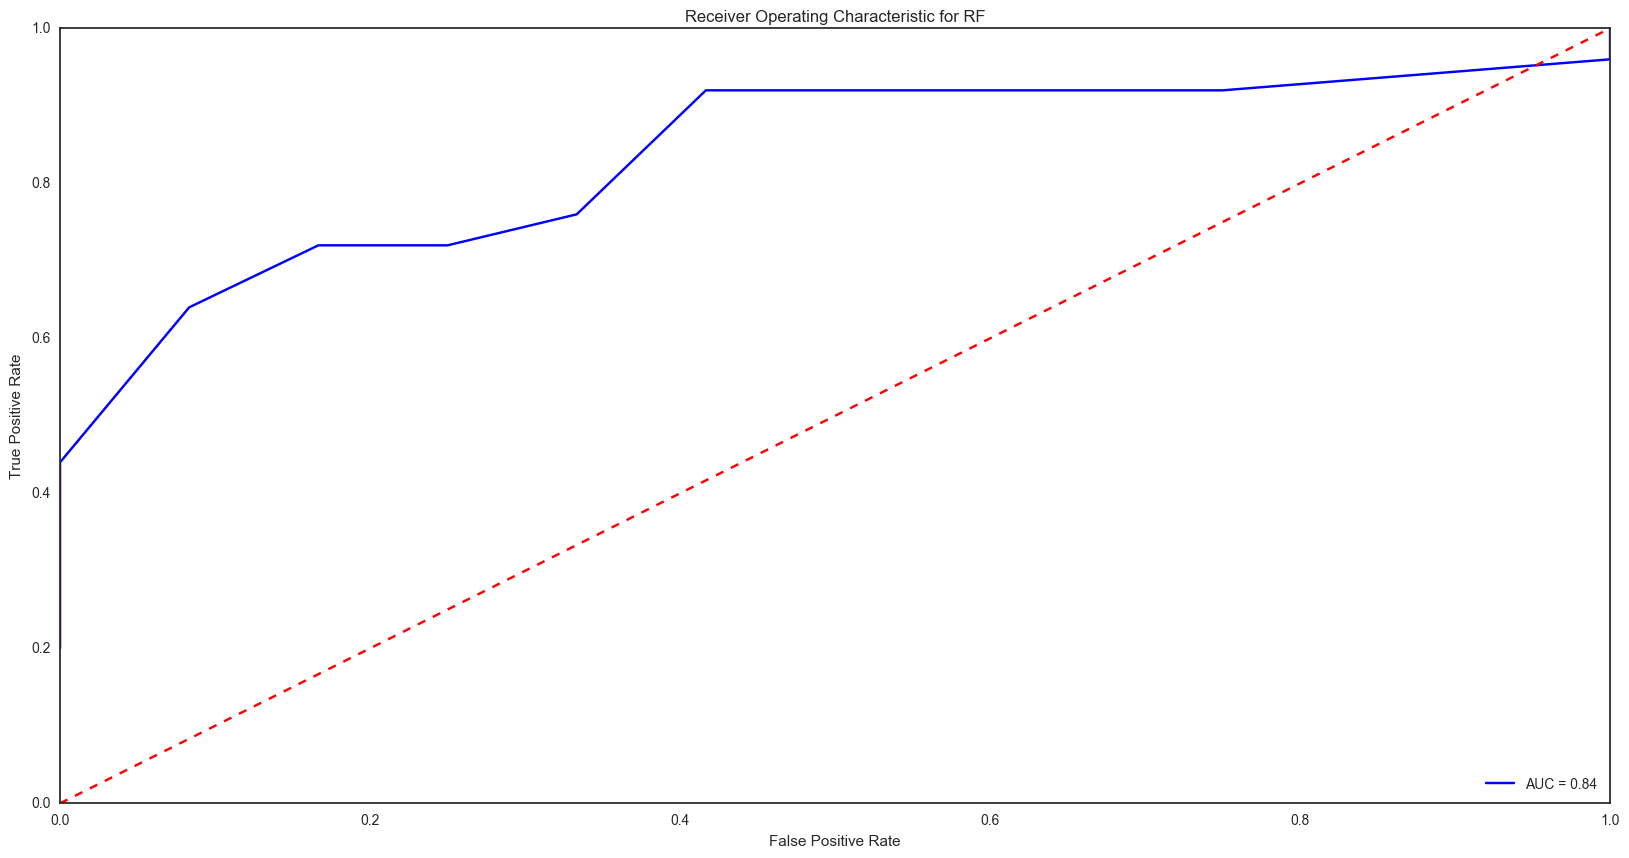

Validation based on ET
0.702702702703
[[ 8  4]
 [ 7 18]]
[[ 8  4]
 [ 7 18]]
             precision    recall  f1-score   support

        0.0       0.53      0.67      0.59        12
        1.0       0.82      0.72      0.77        25

avg / total       0.73      0.70      0.71        37



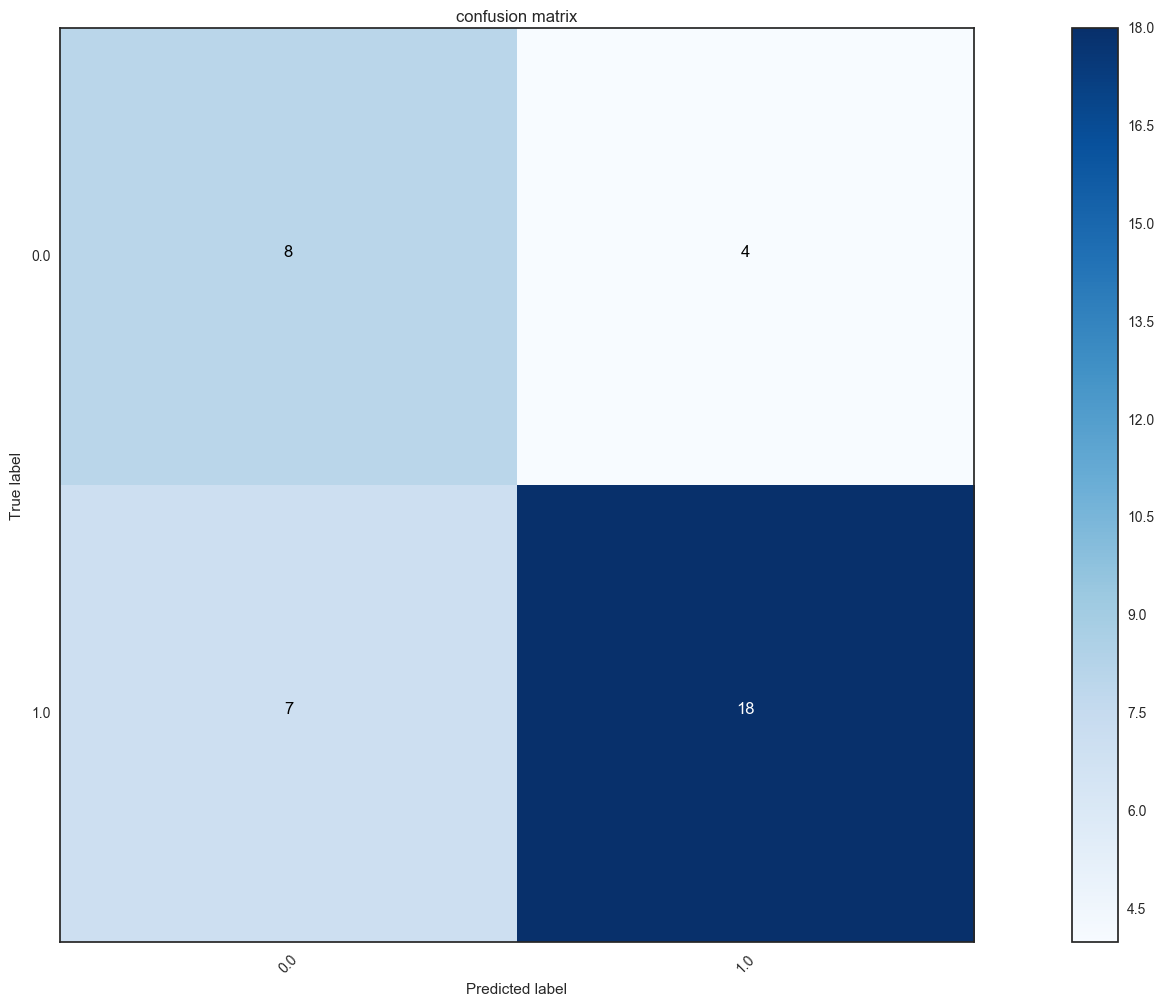

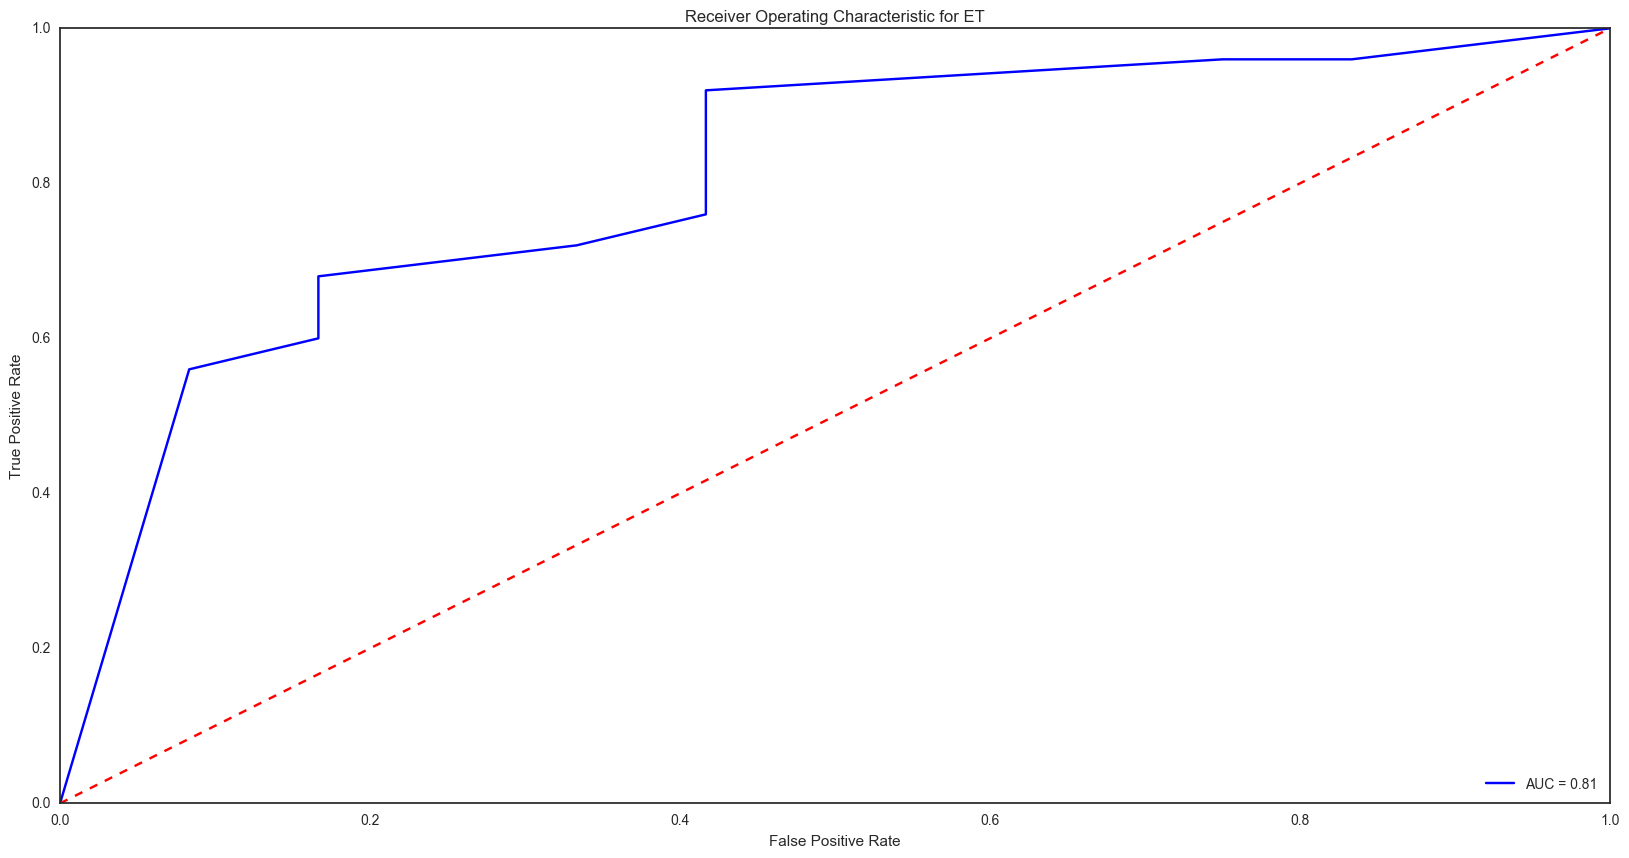

Validation based on XGB
0.864864864865
[[ 8  4]
 [ 1 24]]
[[ 8  4]
 [ 1 24]]
             precision    recall  f1-score   support

        0.0       0.89      0.67      0.76        12
        1.0       0.86      0.96      0.91        25

avg / total       0.87      0.86      0.86        37



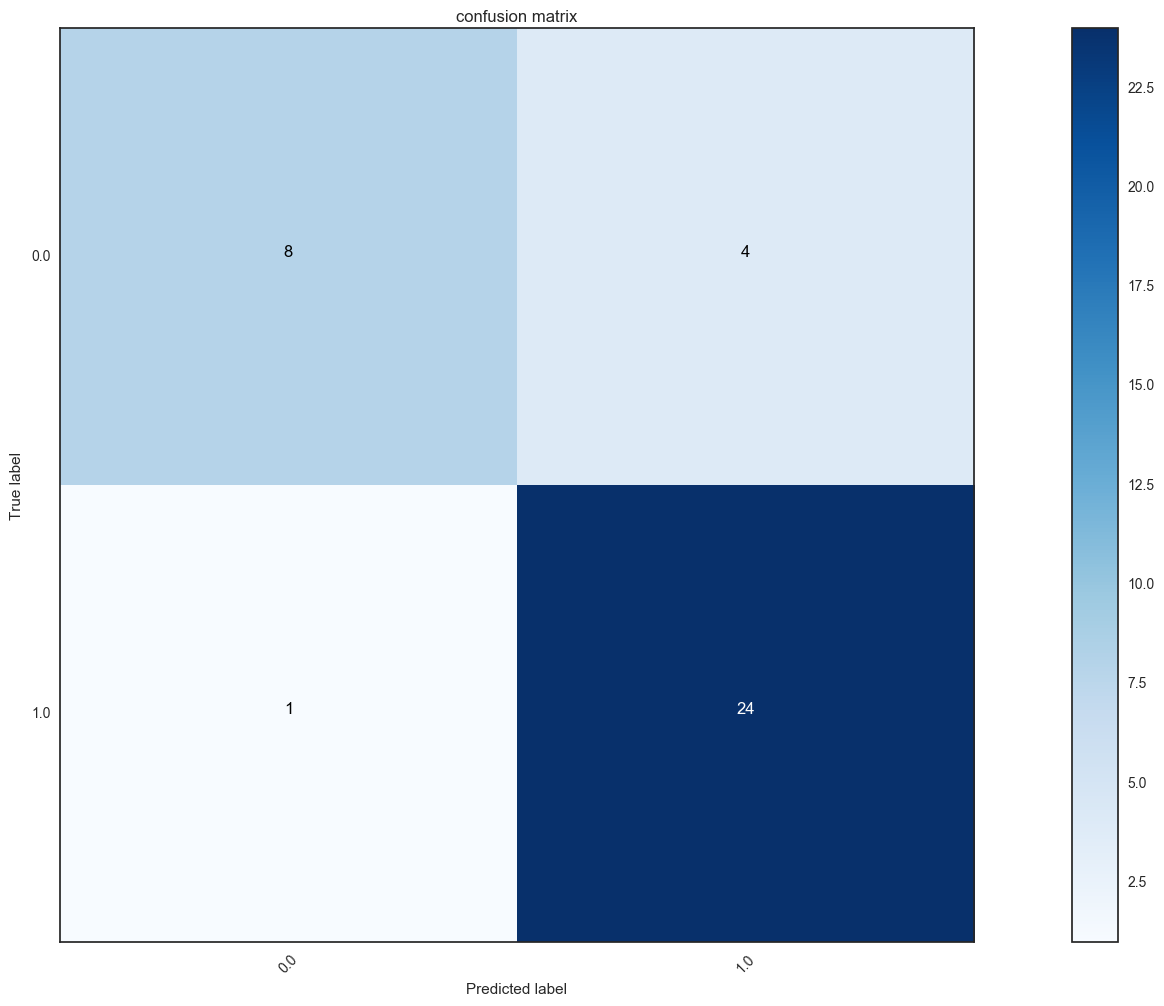

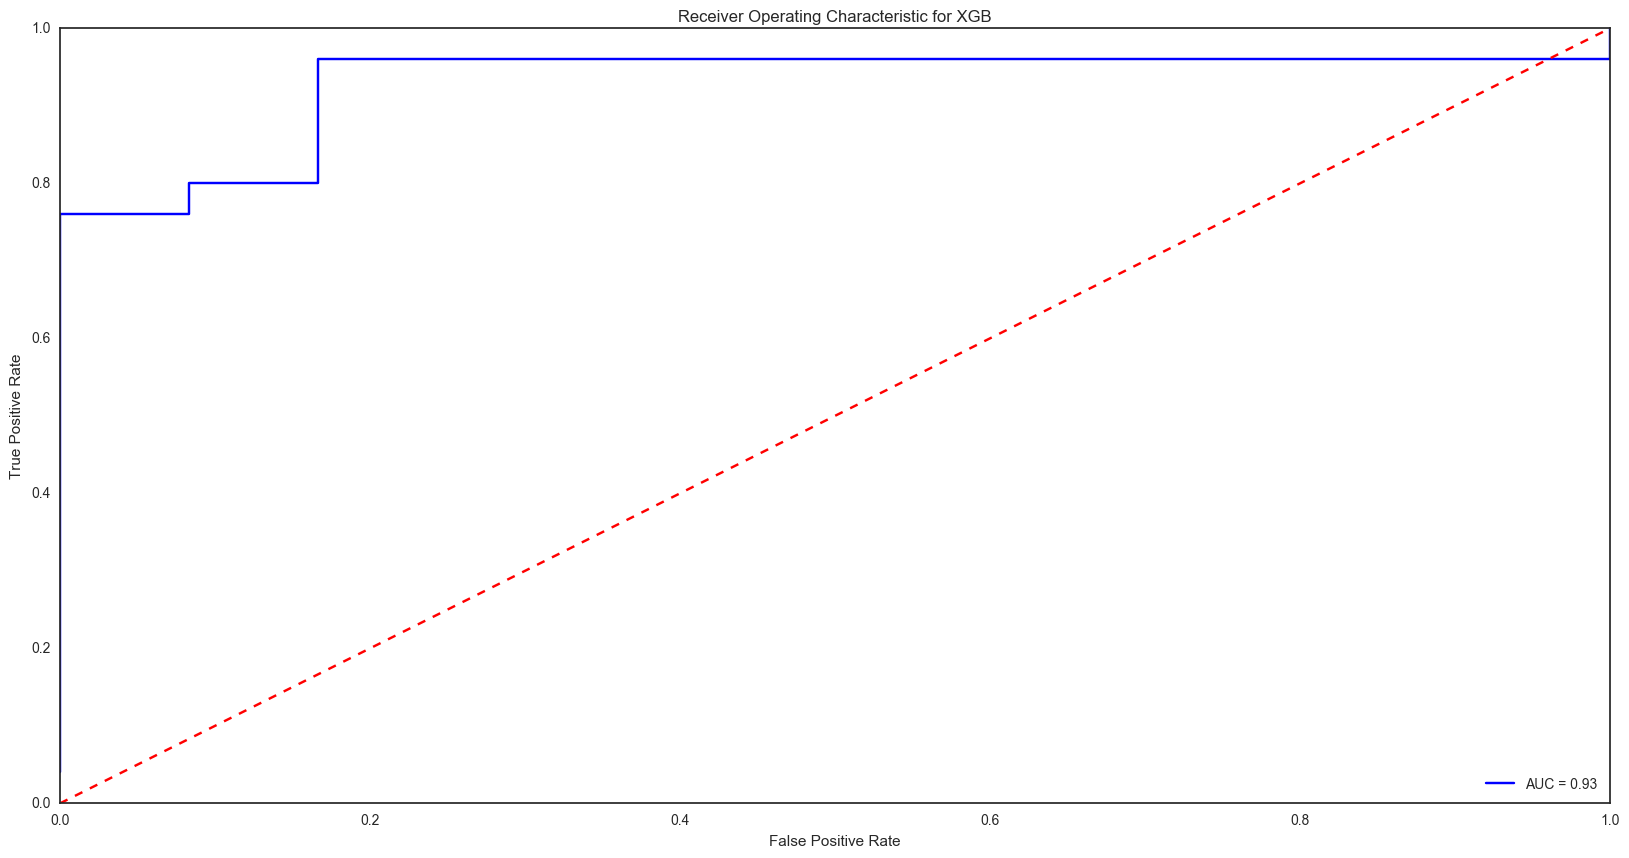

In [131]:
import itertools
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(1)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #if normalize:
    #    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #    print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

def validate_models(training_set, outcome, validation_data, validation_outcome):
    
    models = []
    
    #baselines
    
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC(probability=True)))
    
    #ensemble
    
    models.append(('AB', AdaBoostClassifier()))
    models.append(('GBM', GradientBoostingClassifier()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('ET', ExtraTreesClassifier()))
    models.append(('XGB', xgboost.XGBClassifier()))

    
    for name, model in models:
        mod = model
        mod.fit(training_set, outcome)
        # estimate accuracy on validation dataset
        predictions = mod.predict(validation_data)
        print "Validation based on " + name
        print(accuracy_score(validation_outcome, predictions))
        print(confusion_matrix(validation_outcome, predictions))
        cfmat = confusion_matrix(validation_outcome, predictions)
        plot_confusion_matrix(cfmat, classes=[0.0, 1.0] , title='confusion matrix')
        
        print(classification_report(validation_outcome, predictions))

        # calculate the fpr and tpr for all thresholds of the classification
        probs = mod.predict_proba(validation_data)
        preds = probs[:,1]
        fpr, tpr, threshold = roc_curve(validation_outcome, preds)
        roc_auc = auc(fpr, tpr)
        
        # method I: plt
        plt.figure(2)
        plt.title('Receiver Operating Characteristic for ' + name)
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        
validate_models(X_train, Y_train, X_validation, Y_validation)

# Predicting outcome WITH feature selection


	Corr.	Linear reg	MIC	RF	RFE	Ridge	Stability	XGB	Mean
sex	0.0	0.13	0.0	0.08	0.03	0.3	0.0	0.04	0.04
weight.challenge	0.04	1.0	1.0	0.52	0.58	0.66	0.0	1.0	0.62
weight	0.01	0.81	0.54	0.54	0.55	0.23	0.0	0.28	0.41
ch.weight	0.06	0.39	0.41	0.29	0.87	0.07	0.0	0.29	0.29
pch.weight	0.06	0.64	0.52	0.75	0.9	0.56	0.0	0.38	0.54
hr.post.challenge 	0.01	0.31	0.53	1.0	0.52	0.54	0.0	0.56	0.53
score.overall	0.92	0.09	0.52	0.19	0.65	0.0	0.0	0.09	0.14
score.left	1.0	0.5	0.57	0.94	0.61	1.0	0.0	0.19	0.59
score.right	0.87	0.15	0.45	0.2	0.16	0.38	0.0	0.1	0.18
rights.mobile.overall	0.1	0.38	0.04	0.02	0.97	0.51	0.0	0.0	0.07
rights.shakey.overall	0.16	0.03	0.07	0.02	0.42	0.0	0.0	0.01	0.03
rights.lethargic.overall	0.11	0.01	0.05	0.02	0.48	0.05	0.0	0.01	0.04
rights.nonmobile.overall	0.08	0.61	0.03	0.0	1.0	0.96	0.0	0.0	0.06
ftr.one.side.overall	0.05	0.1	0.02	0.1	0.23	0.26	0.0	0.02	0.08
ftr.mobile.hips.over	0.06	0.03	0.02	0.0	0.26	0.1	0.0	0.0	0.03
ftr.lethargic.hips.overall	0.3	0.21	0.14	0.02	0.45	0.13	0.0	0.0	0.14
f

/Users/Rad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:74: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/Rad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:76: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


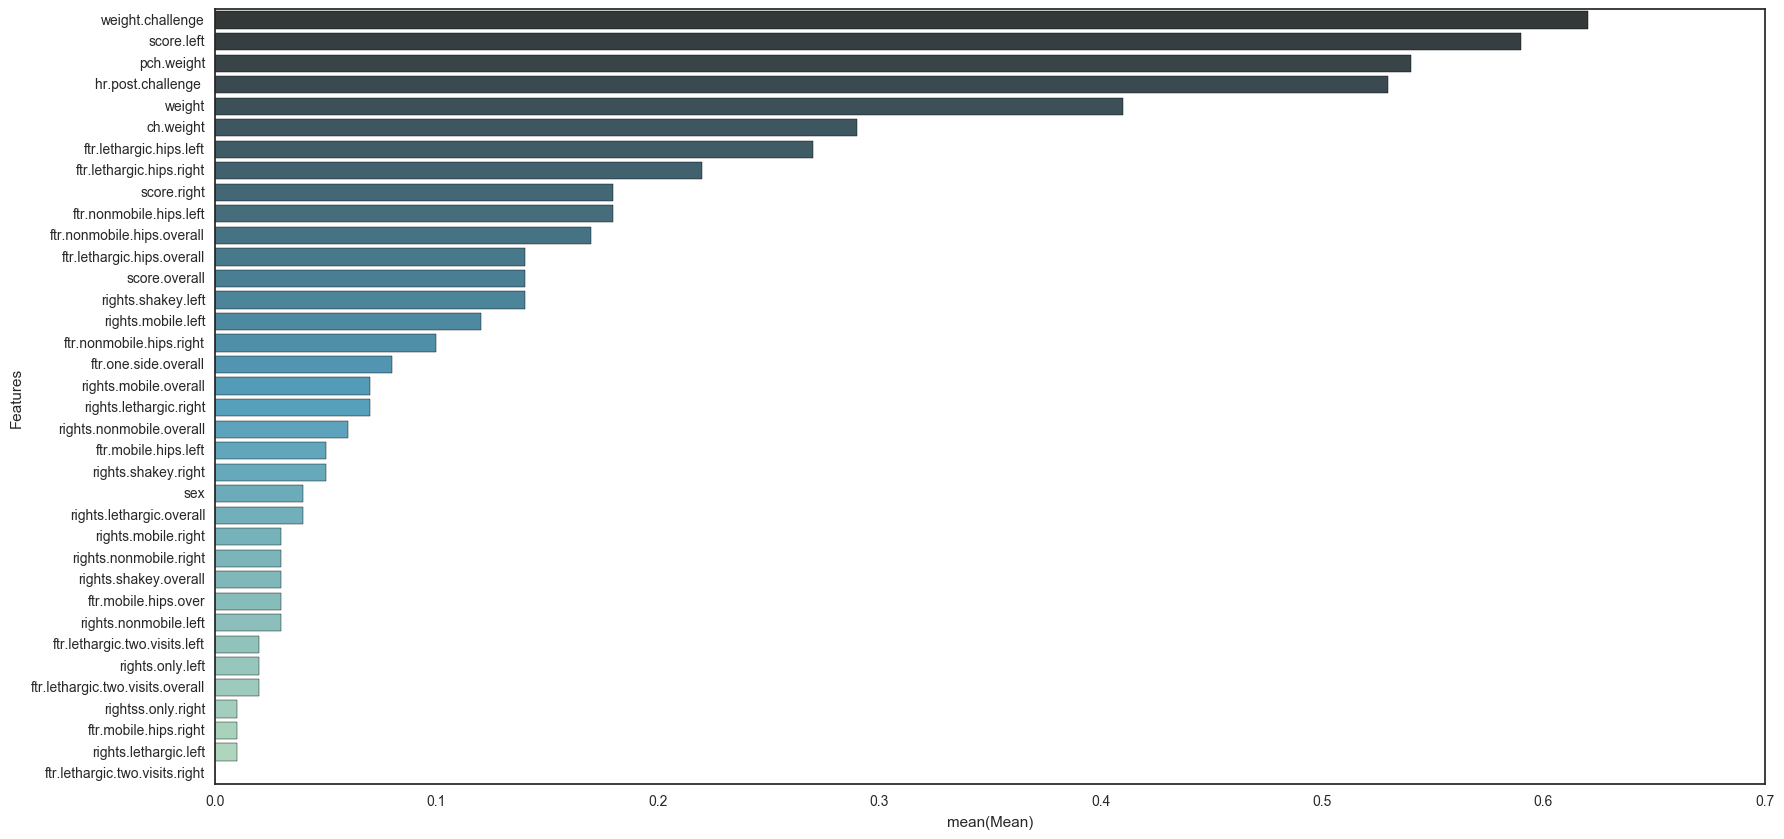

In [132]:
X = df_scaled_df
Y = df_clean_2["outcome"]
names = df_scaled_df.columns

names = X.columns
X = X.values
Y = Y.values

ranks = {}
 
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))
 
lr = LinearRegression(normalize=True)
lr.fit(X, Y)
ranks["Linear reg"] = rank_to_dict(np.abs(lr.coef_), names)
 
ridge = Ridge(alpha=7)
ridge.fit(X, Y)
ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)
 
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, Y)
ranks["Stability"] = rank_to_dict(np.abs(rlasso.scores_), names)

rfe = RFE(lr, n_features_to_select=5)
rfe.fit(X,Y)
ranks["RFE"] = rank_to_dict(map(float, rfe.ranking_), names, order=-1)
 
rf = RandomForestRegressor()
rf.fit(X,Y)
ranks["RF"] = rank_to_dict(rf.feature_importances_, names)

xgb = xgboost.XGBRegressor()
xgb.fit(X,Y)
ranks["XGB"] = rank_to_dict(xgb.feature_importances_, names)
 
f, pval  = f_regression(X, Y, center=True)
ranks["Corr."] = rank_to_dict(f, names)
 
mine = MINE()
mic_scores = []
for i in range(X.shape[1]):
    mine.compute_score(X[:,i], Y)
    m = mine.mic()
    mic_scores.append(m)

ranks["MIC"] = rank_to_dict(mic_scores, names) 
 
r = {}
for name in names:
    r[name] = round(np.median([ranks[method][name] 
                             for method in ranks.keys()]), 2)

methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print "\t%s" % "\t".join(methods)
for name in names:
    print "%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods])))


results_FS = pd.DataFrame(columns=methods)
for name in names:
    results_FS.loc[name] = map(float, [ranks[method][name] for method in methods])

results_FS['Features'] = results_FS.index
results_FS.reset_index(level=0, inplace=True)
results_FS.sort(['Ridge'], ascending=False).head()
results_FS = results_FS.drop(['index'], axis=1)
ax = sns.barplot(y="Features", x="Mean", data=results_FS.sort(['Mean'], ascending=False), orient='h', palette="GnBu_d")

In [137]:
X = df_scaled_df
Y = df_clean_2["outcome"]
names = df_scaled_df.columns

X = X[["weight.challenge", "score.left", "pch.weight", "hr.post.challenge ", "weight"]]

# Validation dataset

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y,test_size=validation_size, random_state=seed)



## Base line Models



LR: 0.700952 (0.105448)
LDA: 0.672857 (0.101397)
KNN: 0.673810 (0.103636)
CART: 0.708571 (0.107640)
NB: 0.651429 (0.142854)
SVM: 0.674286 (0.105284)


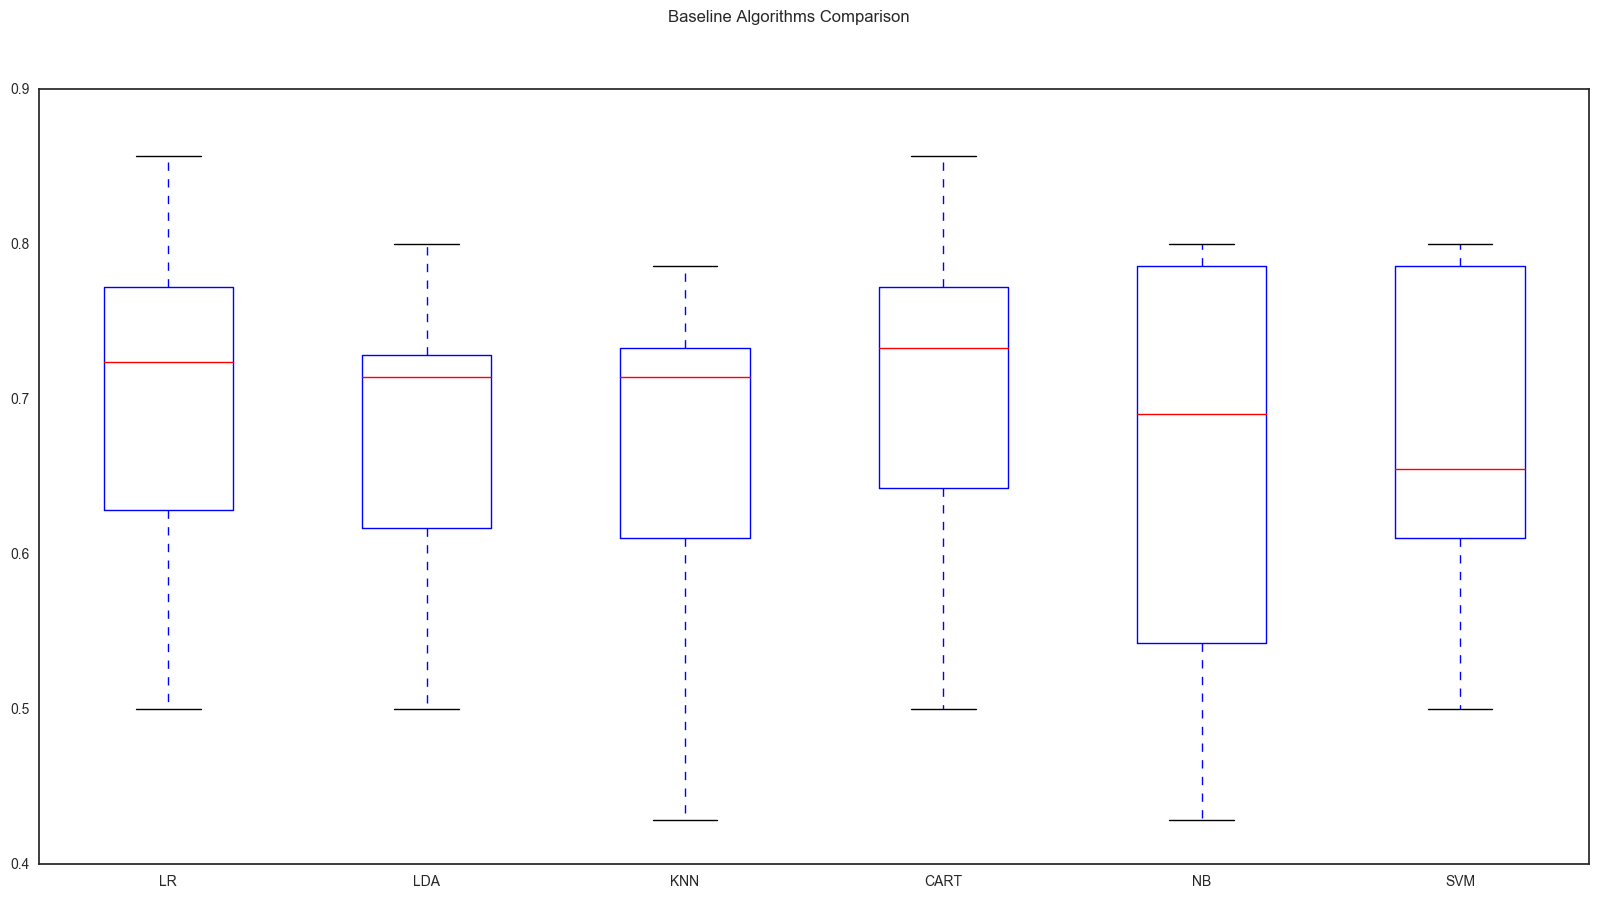

In [138]:
def base_line_models(training_set, outcome):
    # Test options and evaluation metric
    num_folds = 10
    num_instances = len(training_set)
    seed = 7
    scoring = 'accuracy'

    # Spot-Check Algorithms
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))
    results = []
    names = []
    for name, model in models:
        kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
        cv_results = cross_validation.cross_val_score(model, training_set, outcome, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    # Compare Algorithms
    fig = plt.figure()
    fig.suptitle('Baseline Algorithms Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

base_line_models(X_train, Y_train)

## Ensemble Methods

AB: 0.738571 (0.113438)
GBM: 0.731429 (0.093997)
RF: 0.744762 (0.116393)
ET: 0.742381 (0.113937)
XGB: 0.786190 (0.111523)


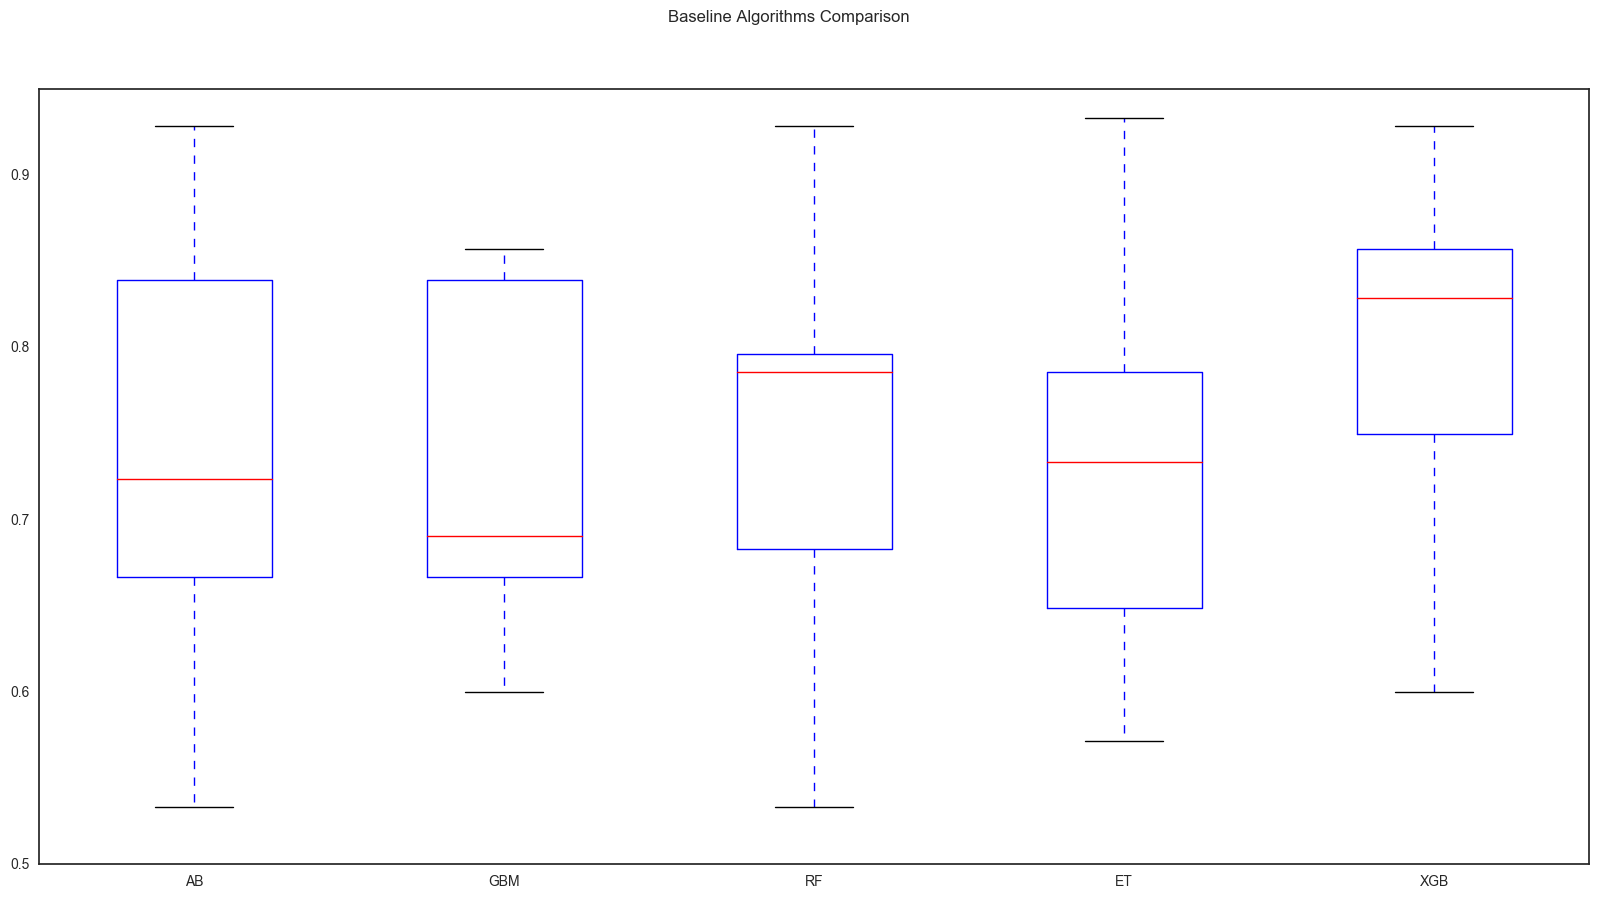

In [139]:
def ensemble_models(training_set, outcome):
    # Test options and evaluation metric
    num_folds = 10
    num_instances = len(training_set)
    seed = 7
    scoring = 'accuracy'

    # ensembles
    ensembles = []
    ensembles.append(('AB', AdaBoostClassifier()))
    ensembles.append(('GBM', GradientBoostingClassifier()))
    ensembles.append(('RF', RandomForestClassifier()))
    ensembles.append(('ET', ExtraTreesClassifier()))
    ensembles.append(('XGB', xgboost.XGBClassifier()))
    results = []
    names = []
    for name, model in ensembles:
        kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
        cv_results = cross_validation.cross_val_score(model, training_set, outcome, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    # Compare Algorithms
    fig = plt.figure()
    fig.suptitle('Baseline Algorithms Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

ensemble_models(X_train, Y_train)

## Model Validation

Validation based on LR
0.72972972973
[[ 6  6]
 [ 4 21]]
[[ 6  6]
 [ 4 21]]
             precision    recall  f1-score   support

        0.0       0.60      0.50      0.55        12
        1.0       0.78      0.84      0.81        25

avg / total       0.72      0.73      0.72        37



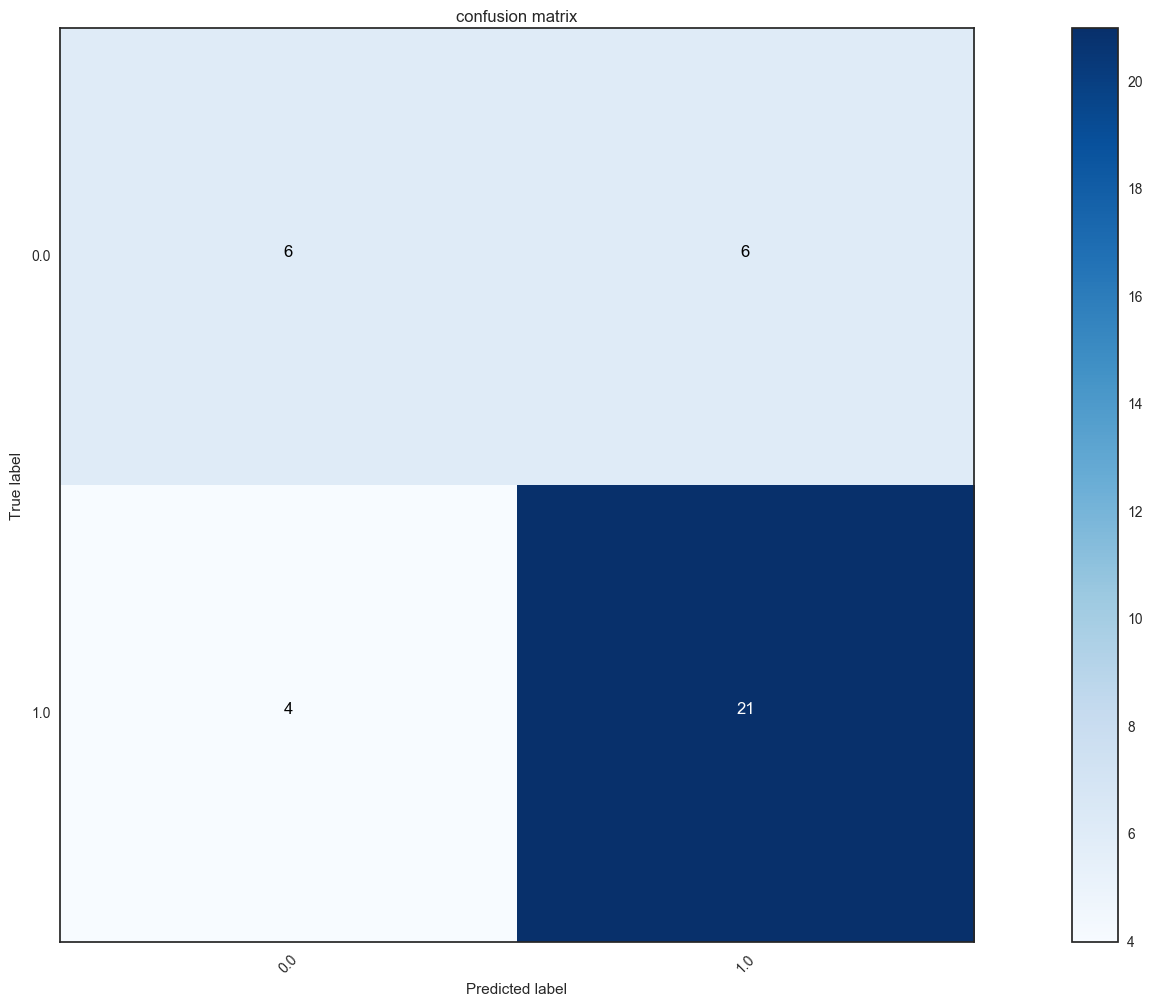

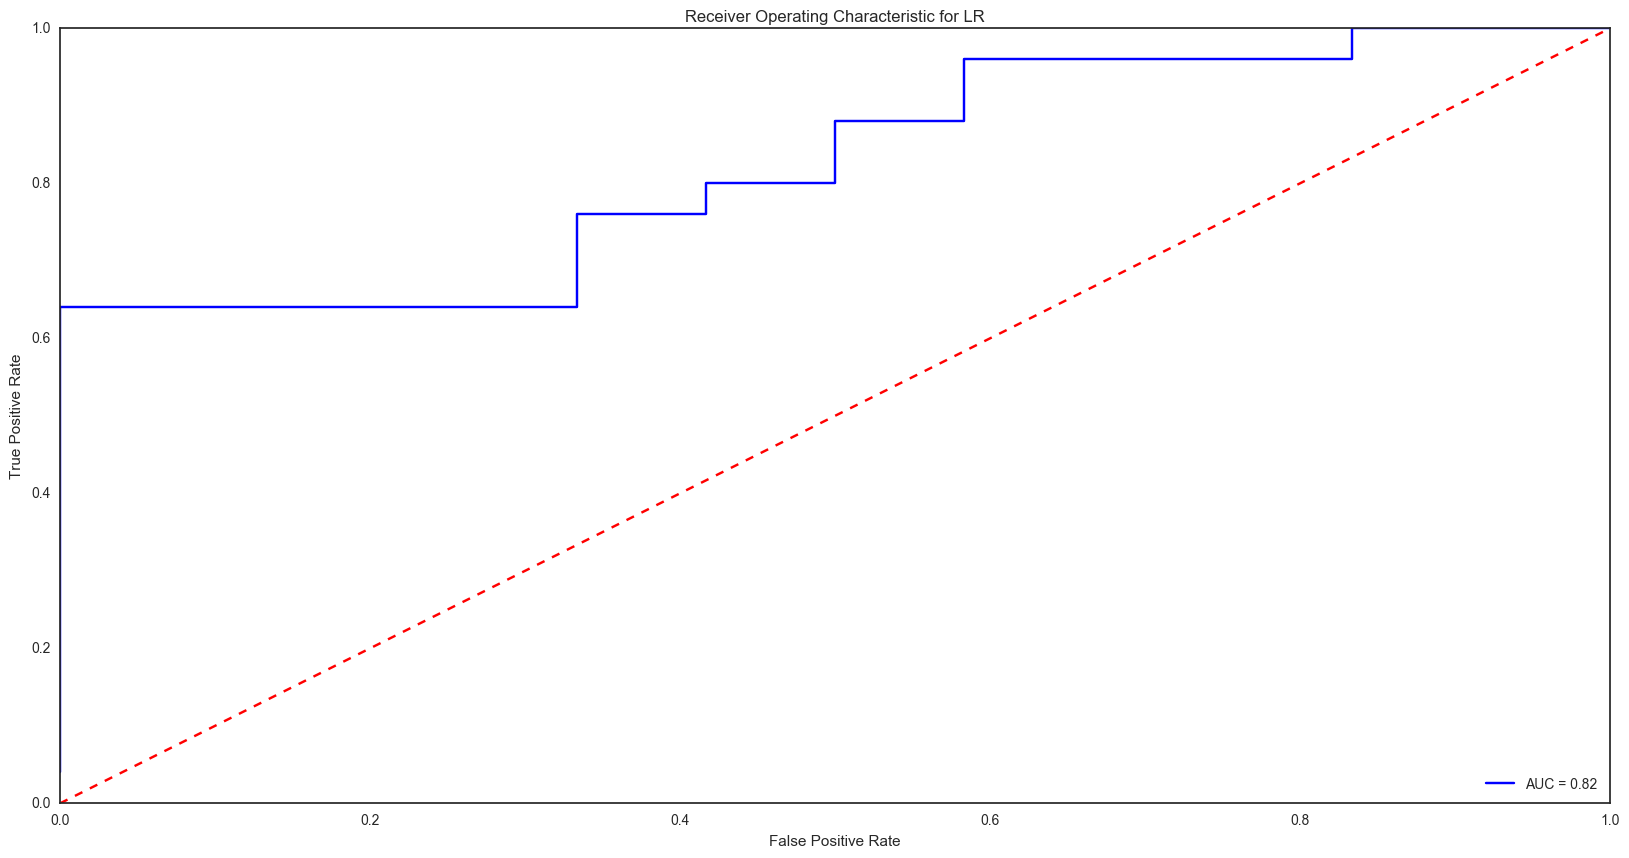

Validation based on LDA
0.72972972973
[[ 6  6]
 [ 4 21]]
[[ 6  6]
 [ 4 21]]
             precision    recall  f1-score   support

        0.0       0.60      0.50      0.55        12
        1.0       0.78      0.84      0.81        25

avg / total       0.72      0.73      0.72        37



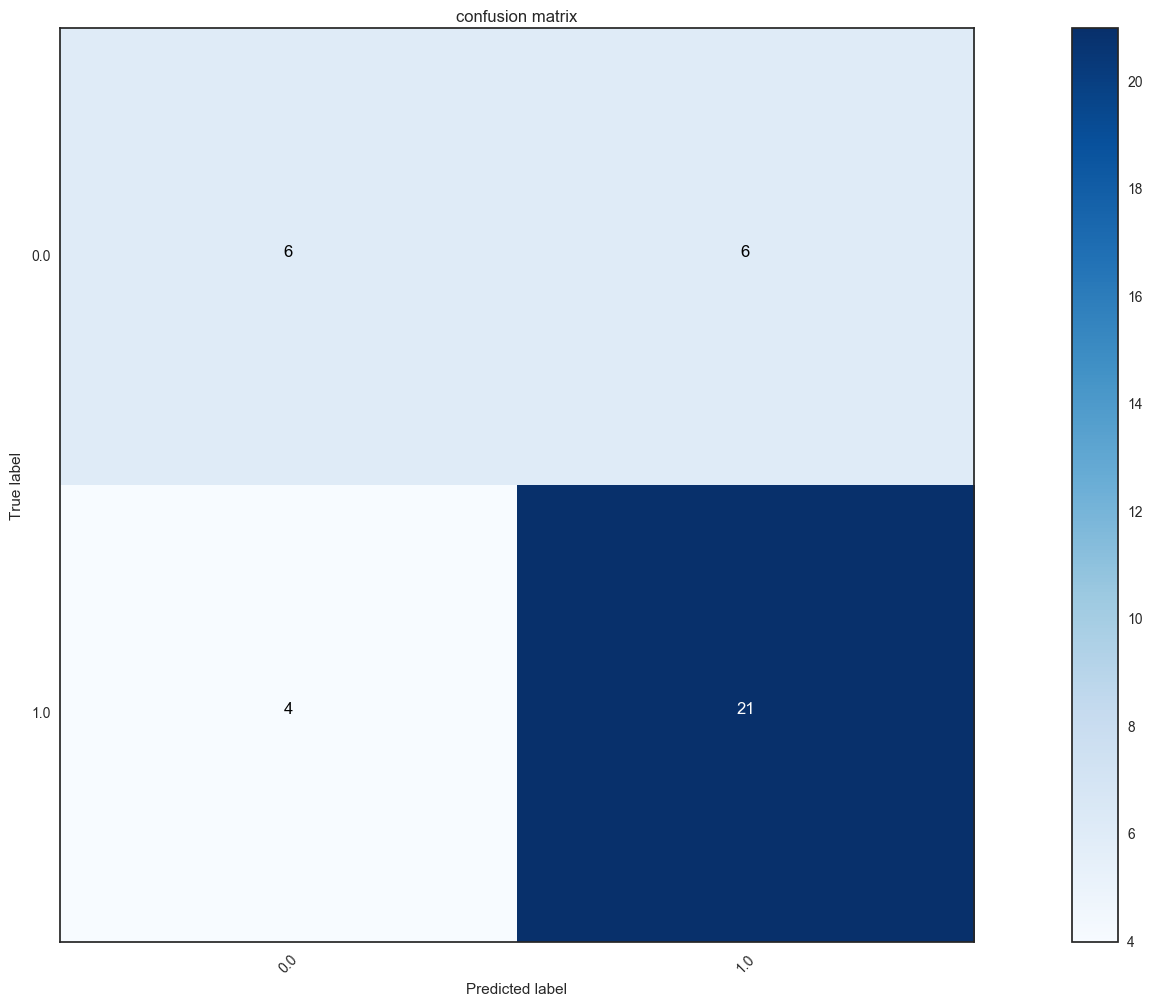

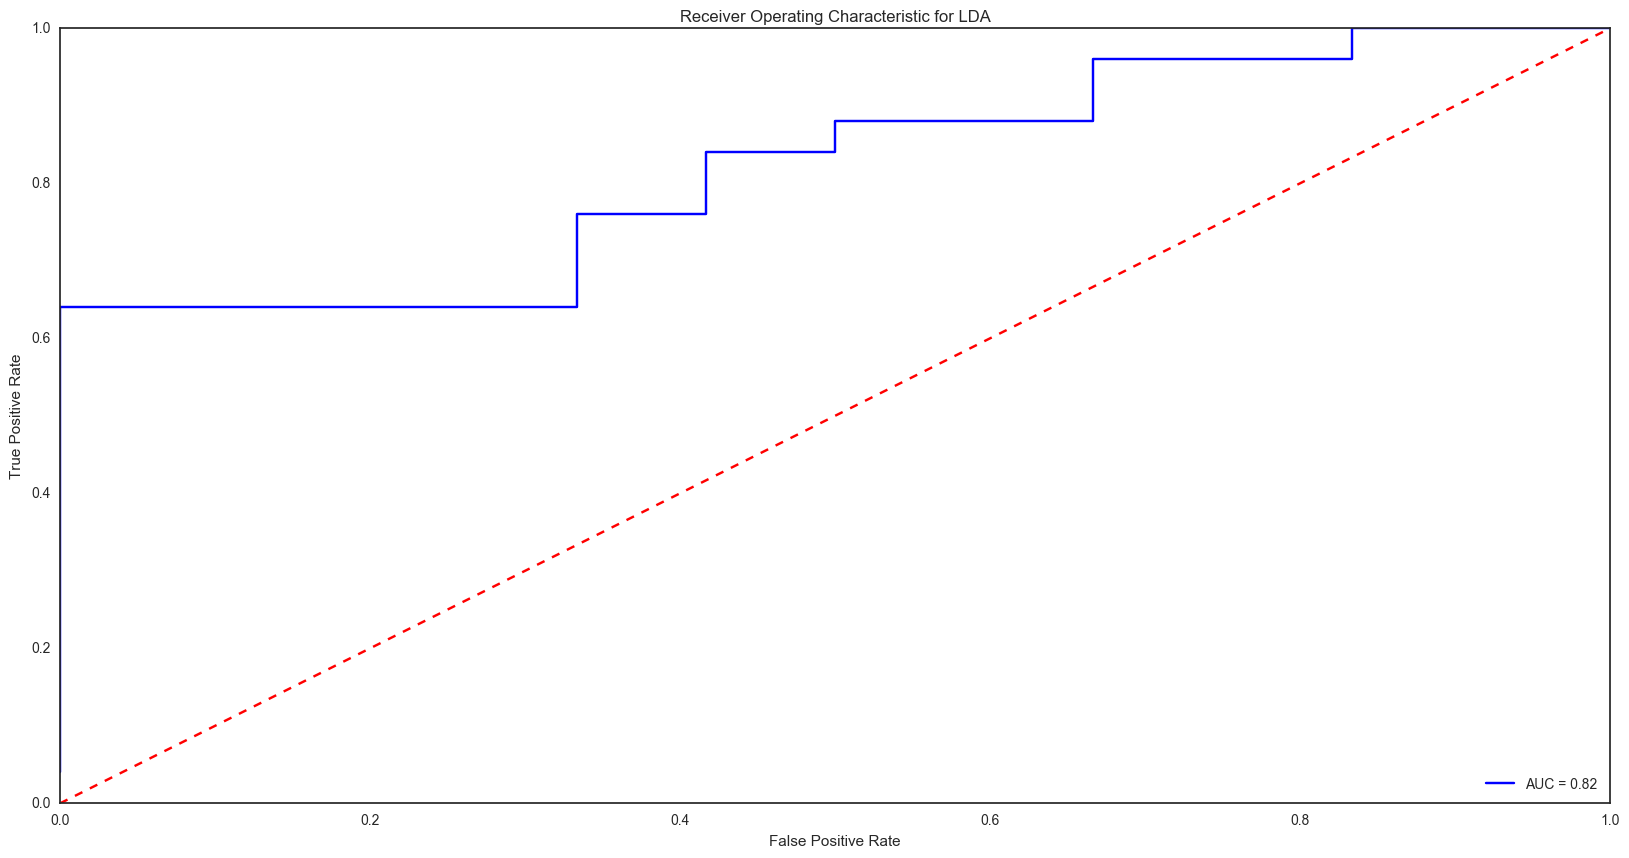

Validation based on KNN
0.810810810811
[[ 7  5]
 [ 2 23]]
[[ 7  5]
 [ 2 23]]
             precision    recall  f1-score   support

        0.0       0.78      0.58      0.67        12
        1.0       0.82      0.92      0.87        25

avg / total       0.81      0.81      0.80        37



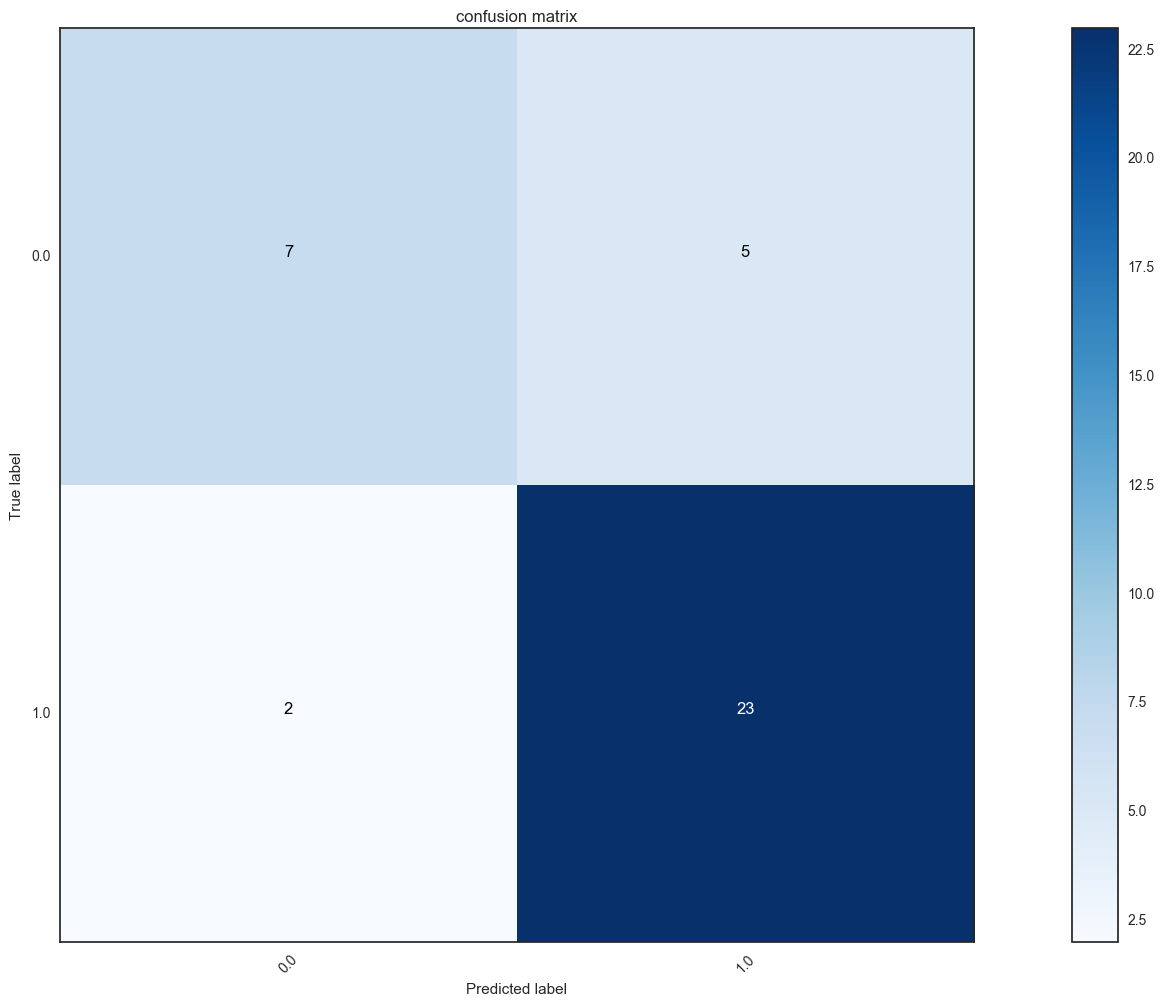

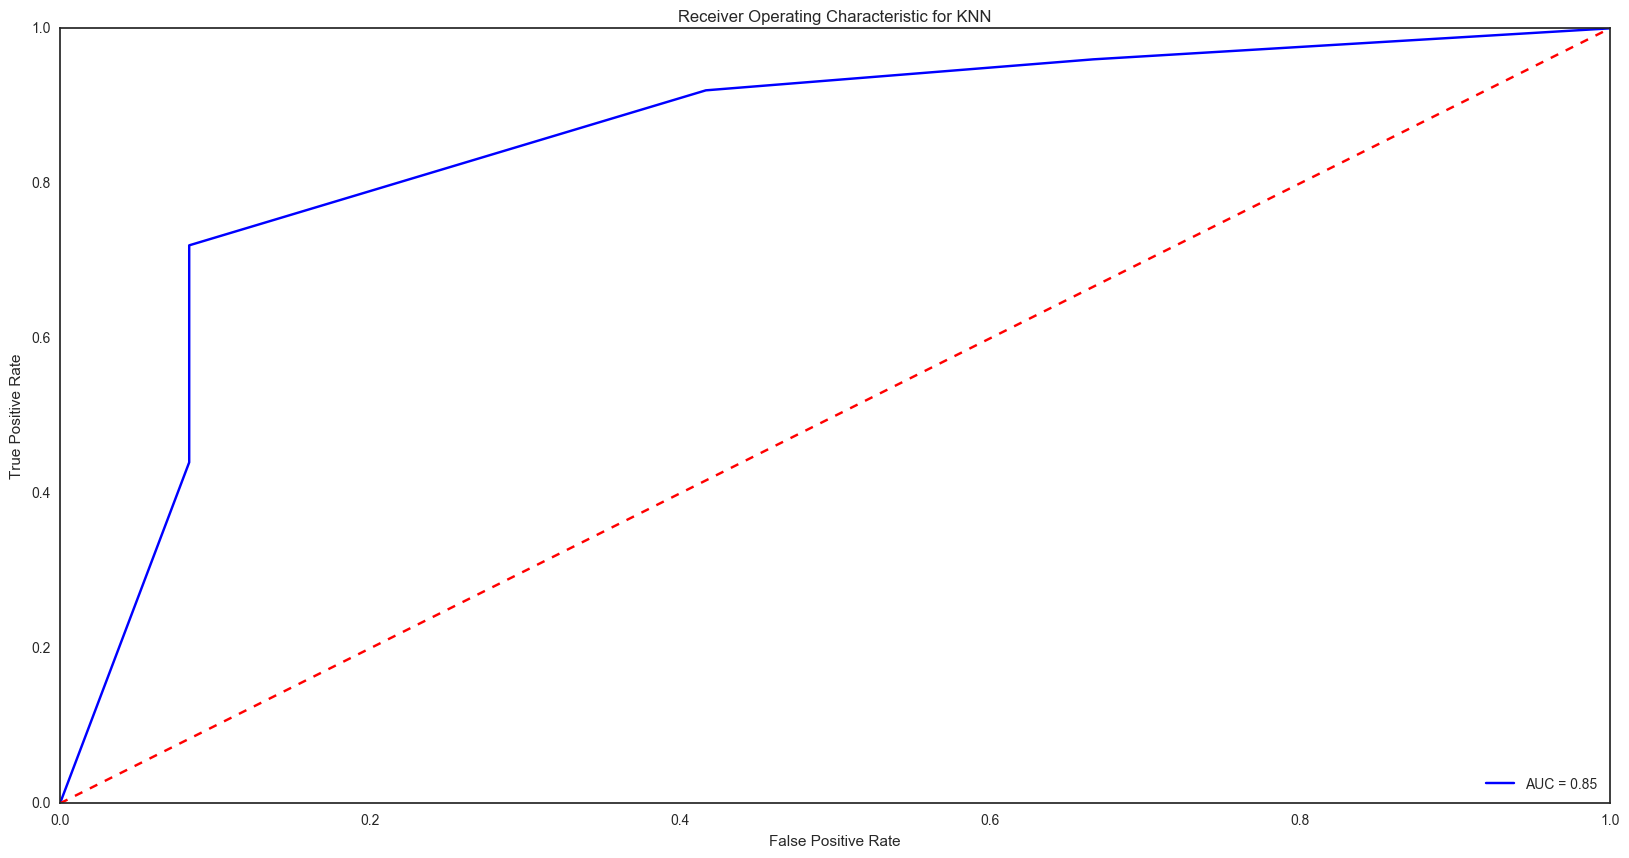

Validation based on CART
0.756756756757
[[ 8  4]
 [ 5 20]]
[[ 8  4]
 [ 5 20]]
             precision    recall  f1-score   support

        0.0       0.62      0.67      0.64        12
        1.0       0.83      0.80      0.82        25

avg / total       0.76      0.76      0.76        37



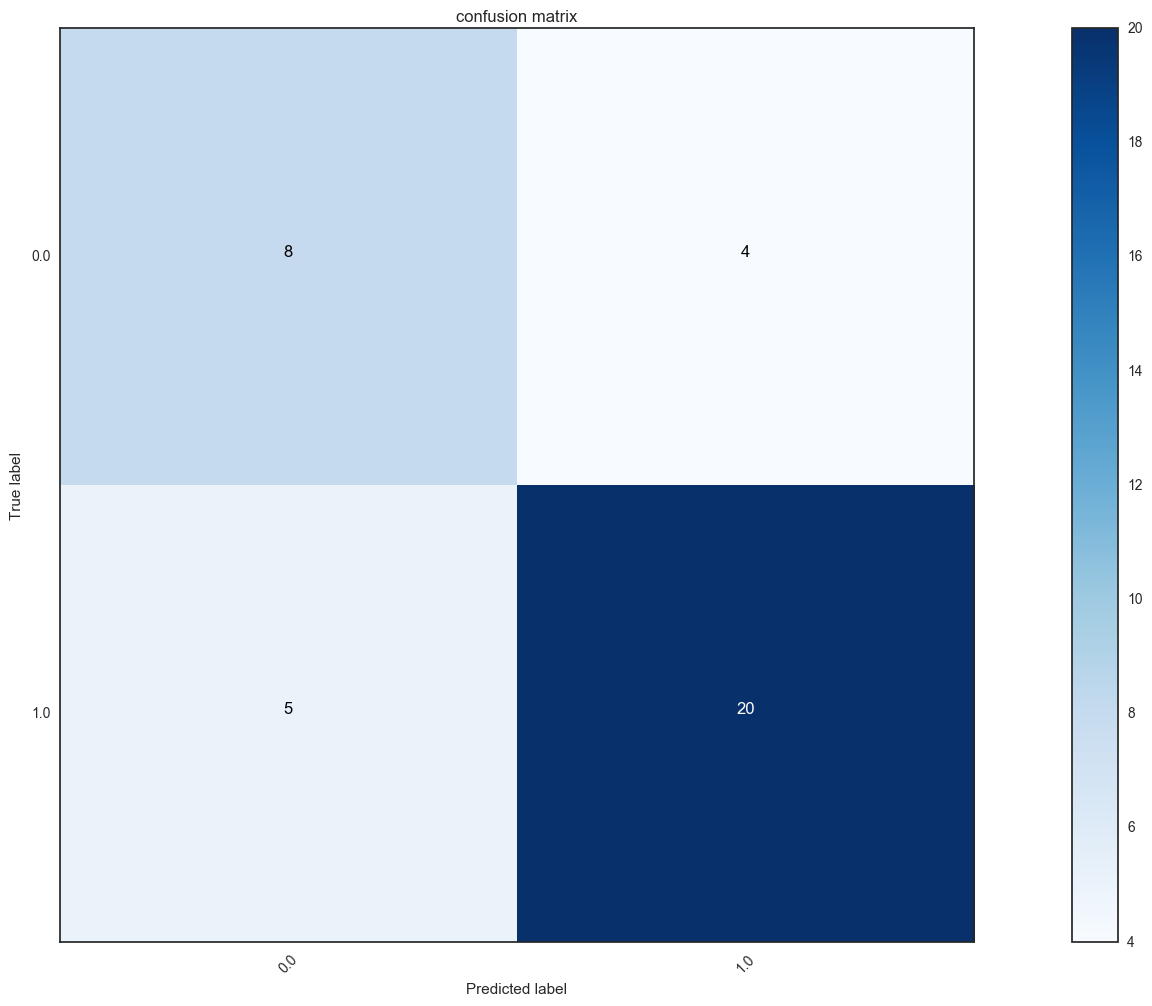

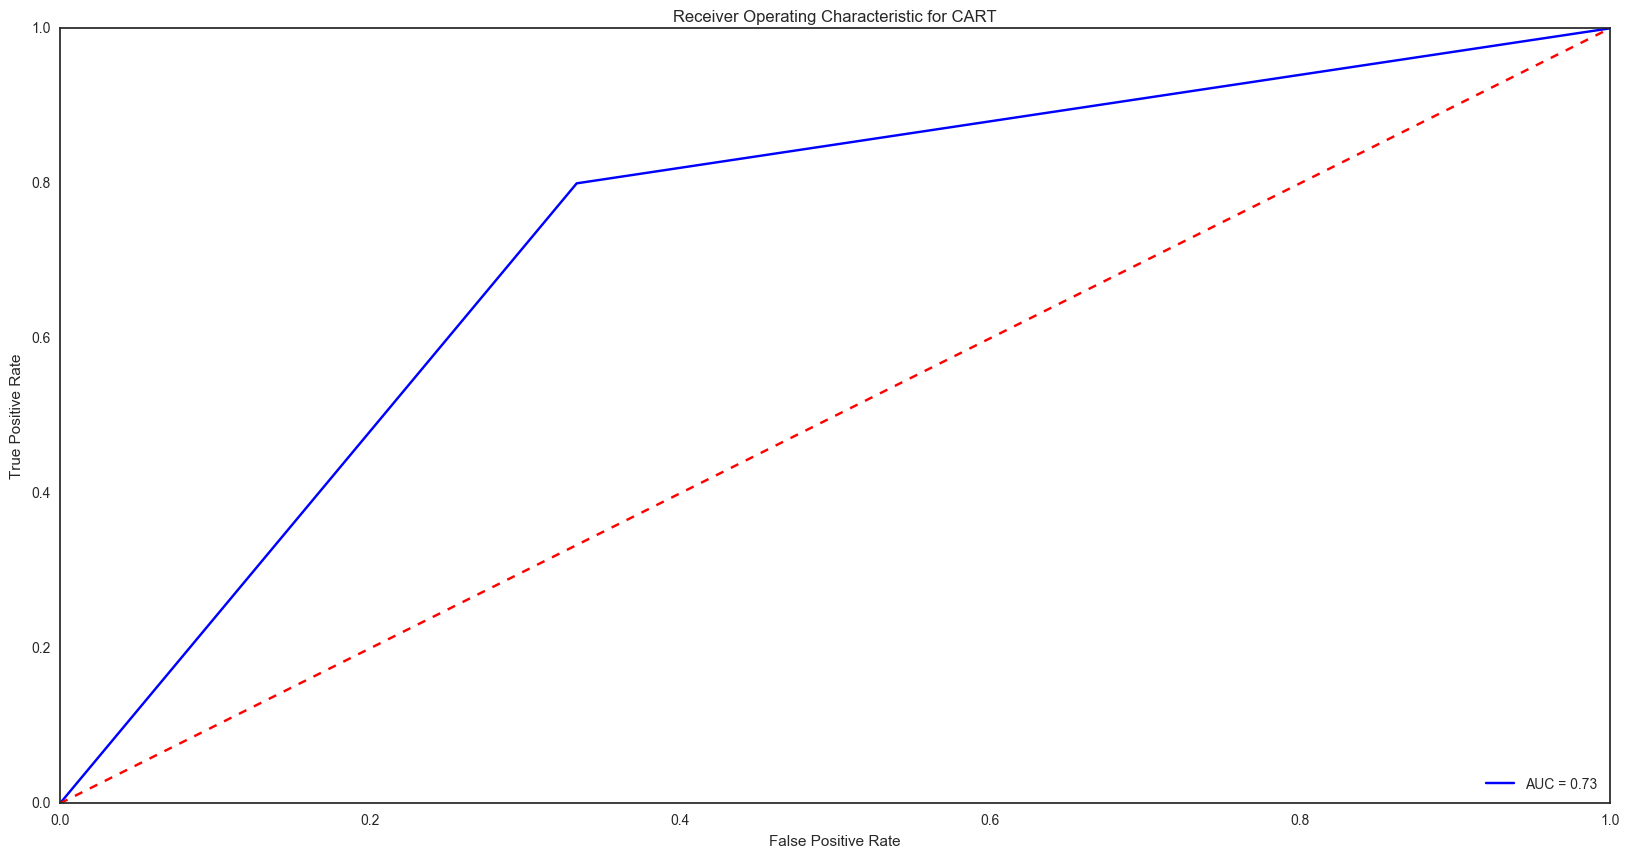

Validation based on NB
0.756756756757
[[ 7  5]
 [ 4 21]]
[[ 7  5]
 [ 4 21]]
             precision    recall  f1-score   support

        0.0       0.64      0.58      0.61        12
        1.0       0.81      0.84      0.82        25

avg / total       0.75      0.76      0.75        37



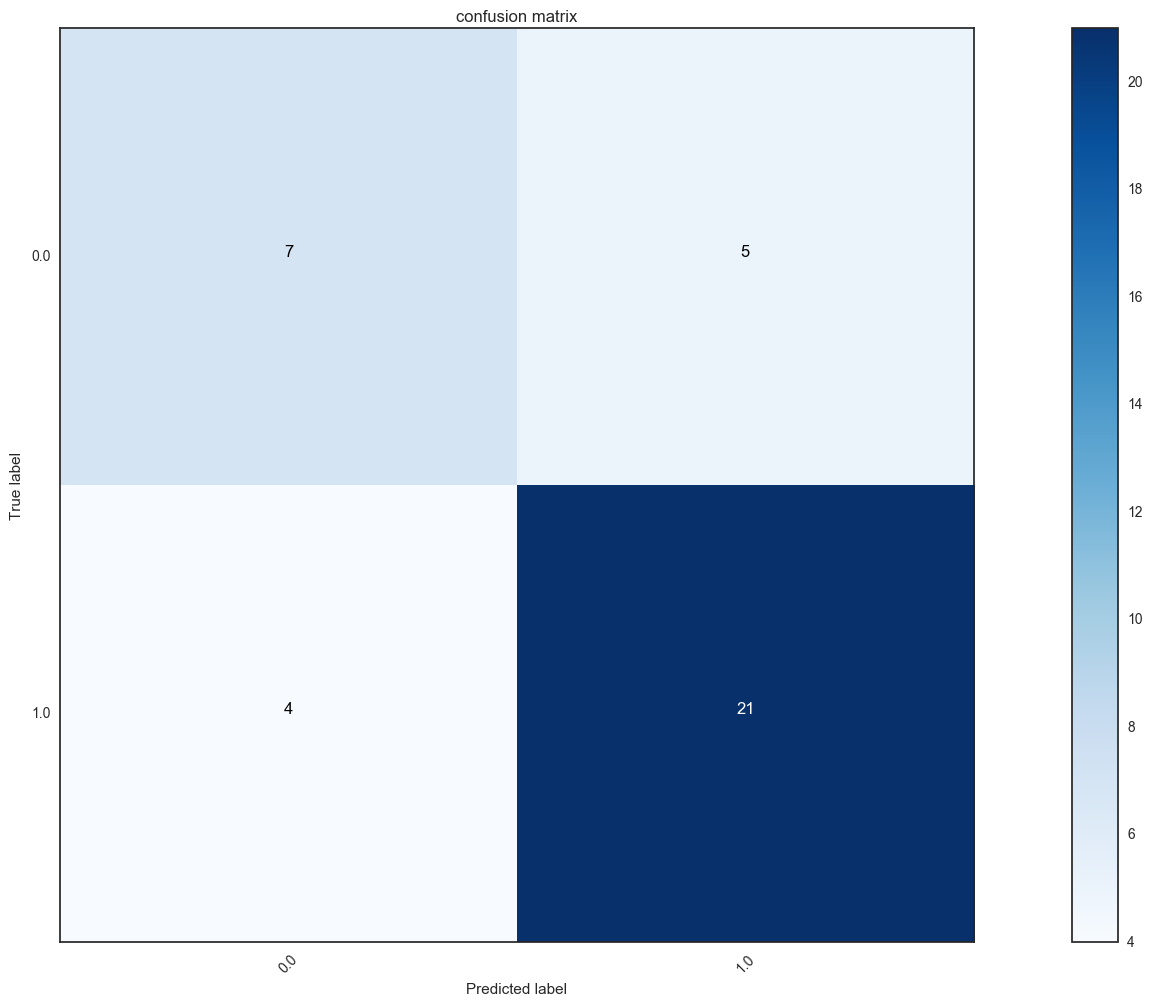

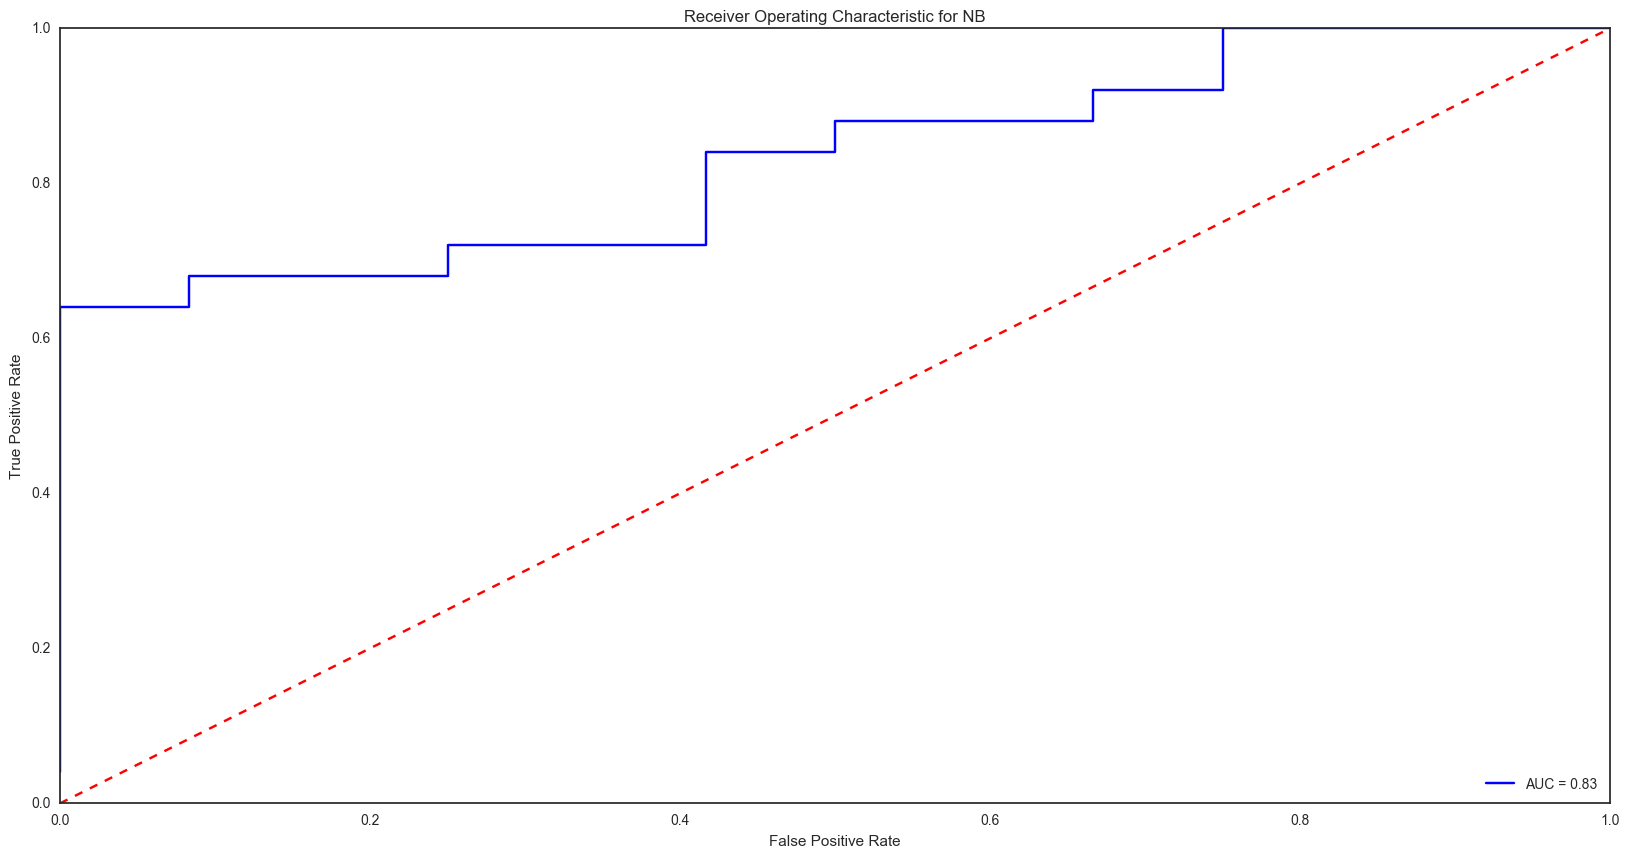

Validation based on SVM
0.756756756757
[[ 4  8]
 [ 1 24]]
[[ 4  8]
 [ 1 24]]
             precision    recall  f1-score   support

        0.0       0.80      0.33      0.47        12
        1.0       0.75      0.96      0.84        25

avg / total       0.77      0.76      0.72        37



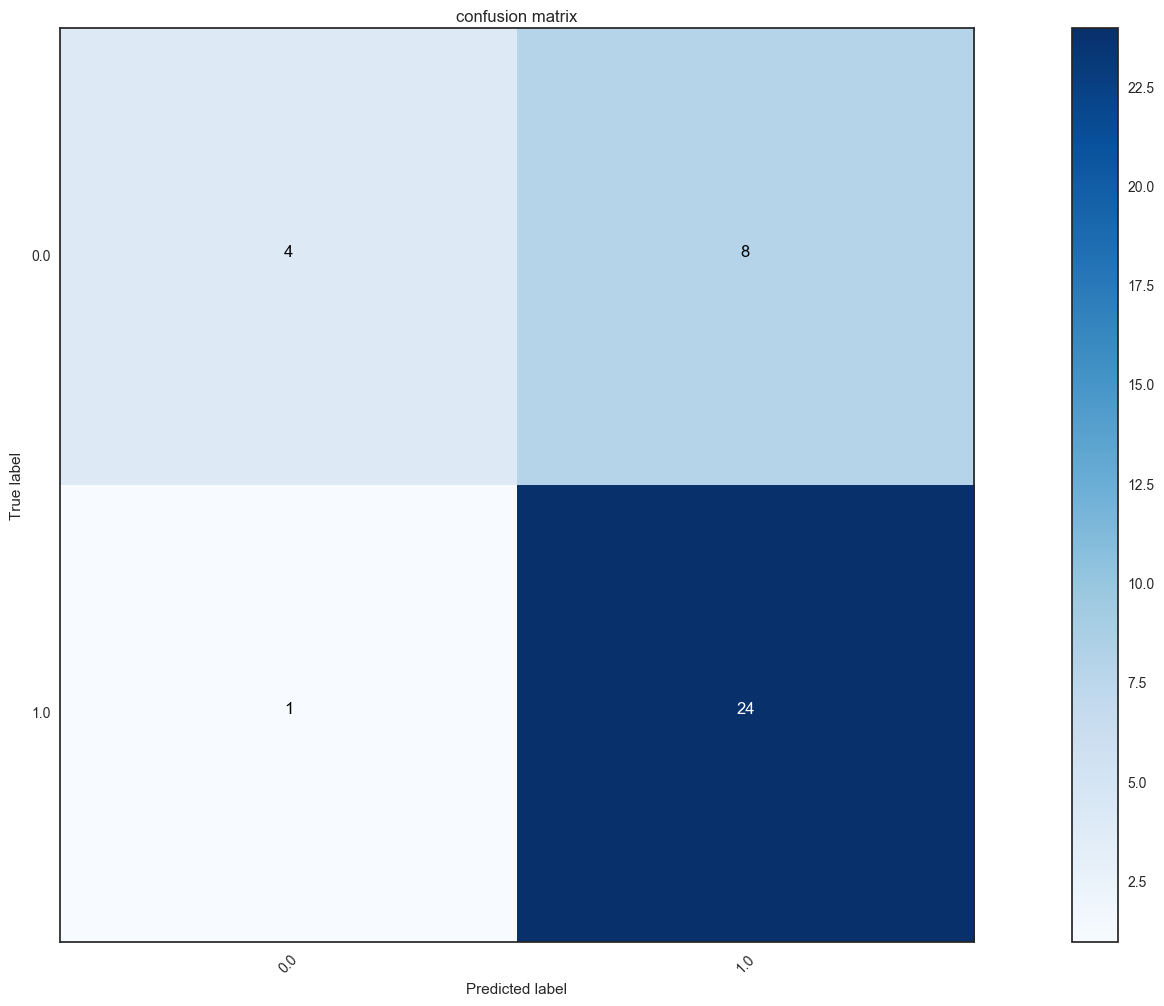

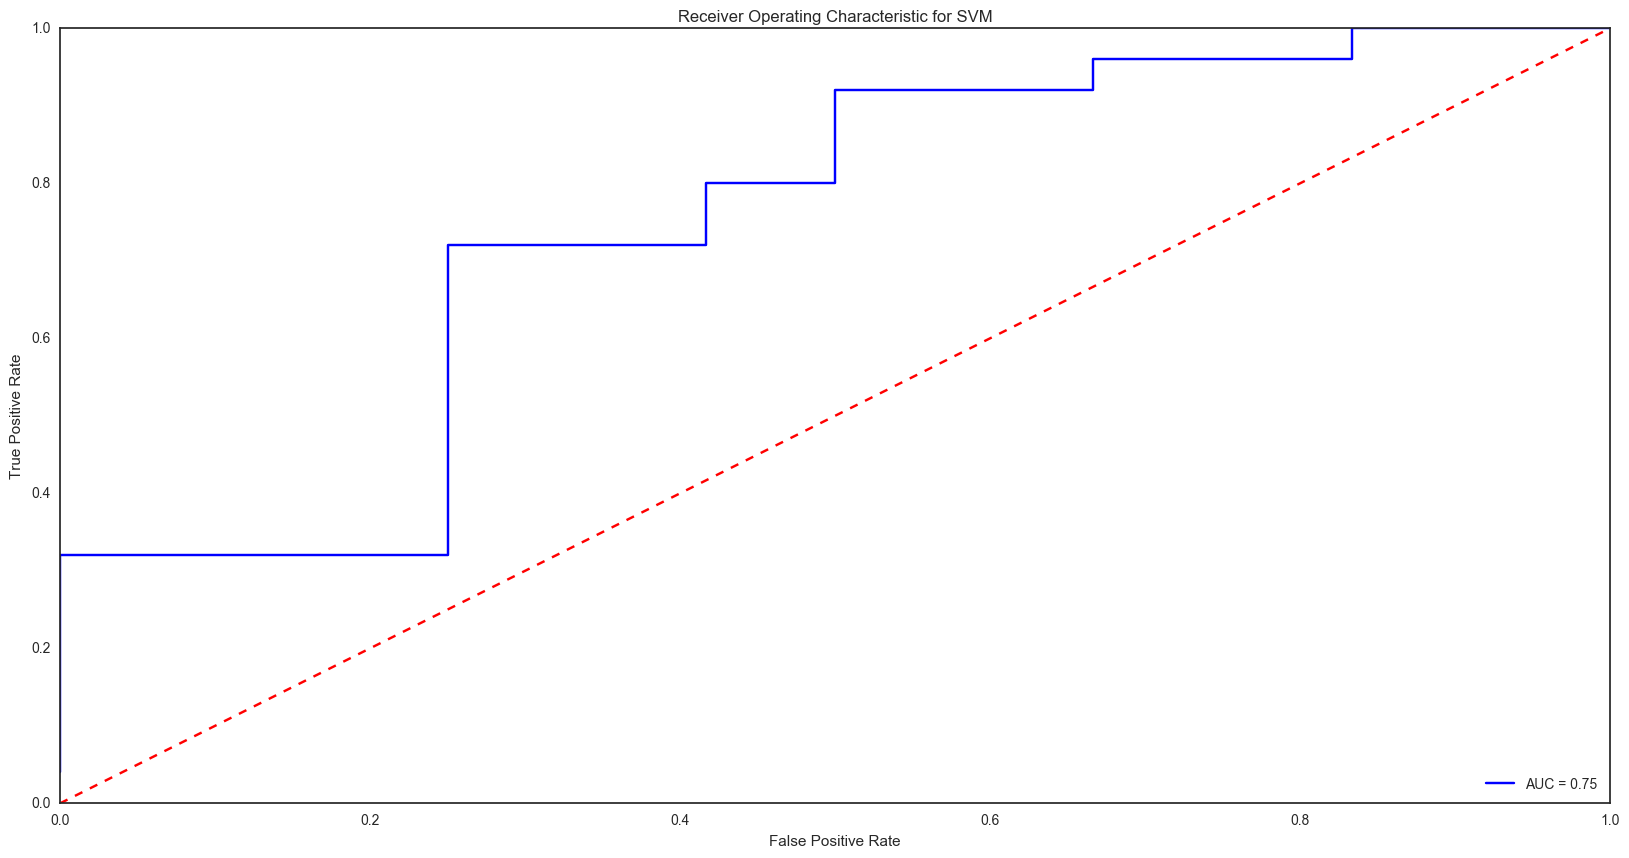

Validation based on AB
0.864864864865
[[ 9  3]
 [ 2 23]]
[[ 9  3]
 [ 2 23]]
             precision    recall  f1-score   support

        0.0       0.82      0.75      0.78        12
        1.0       0.88      0.92      0.90        25

avg / total       0.86      0.86      0.86        37



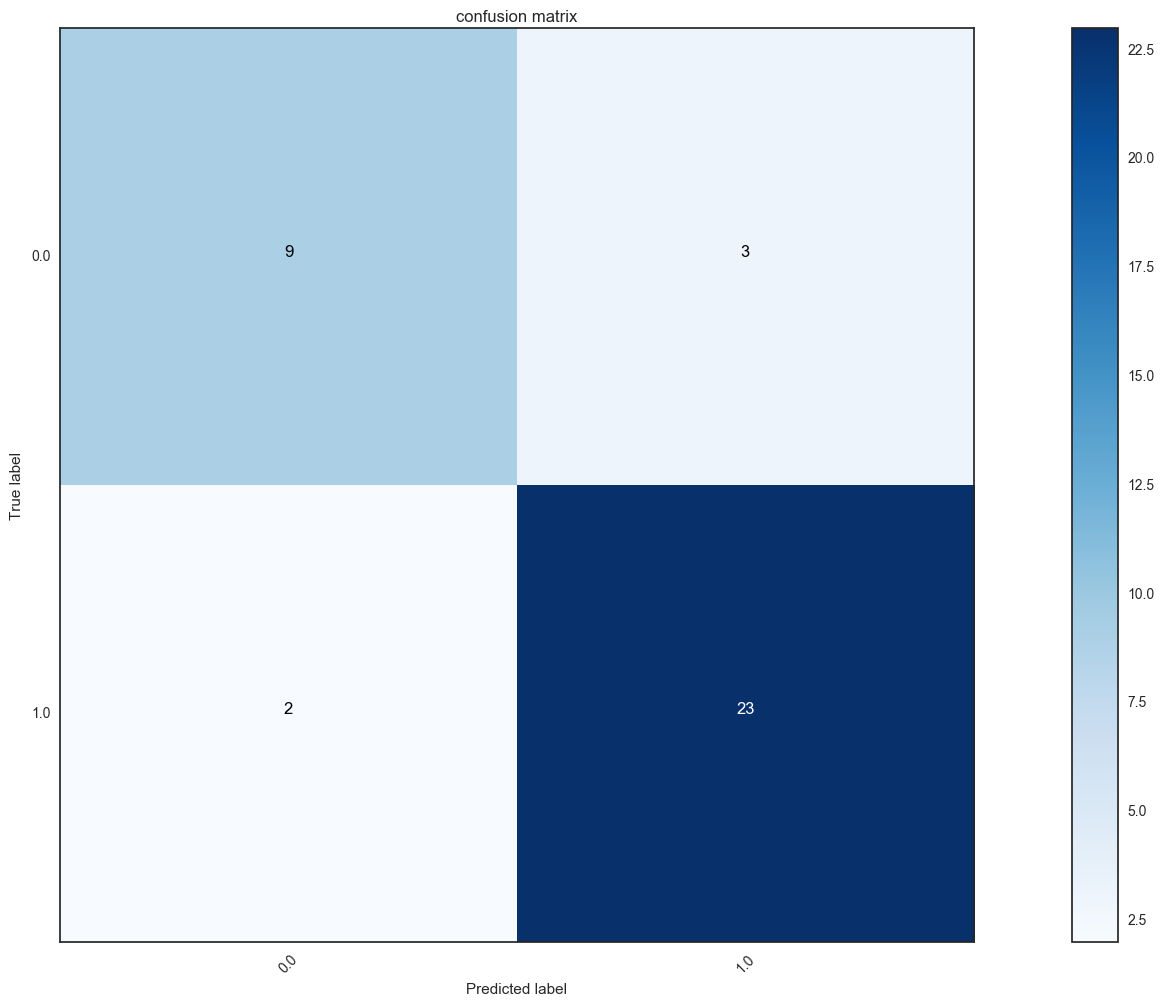

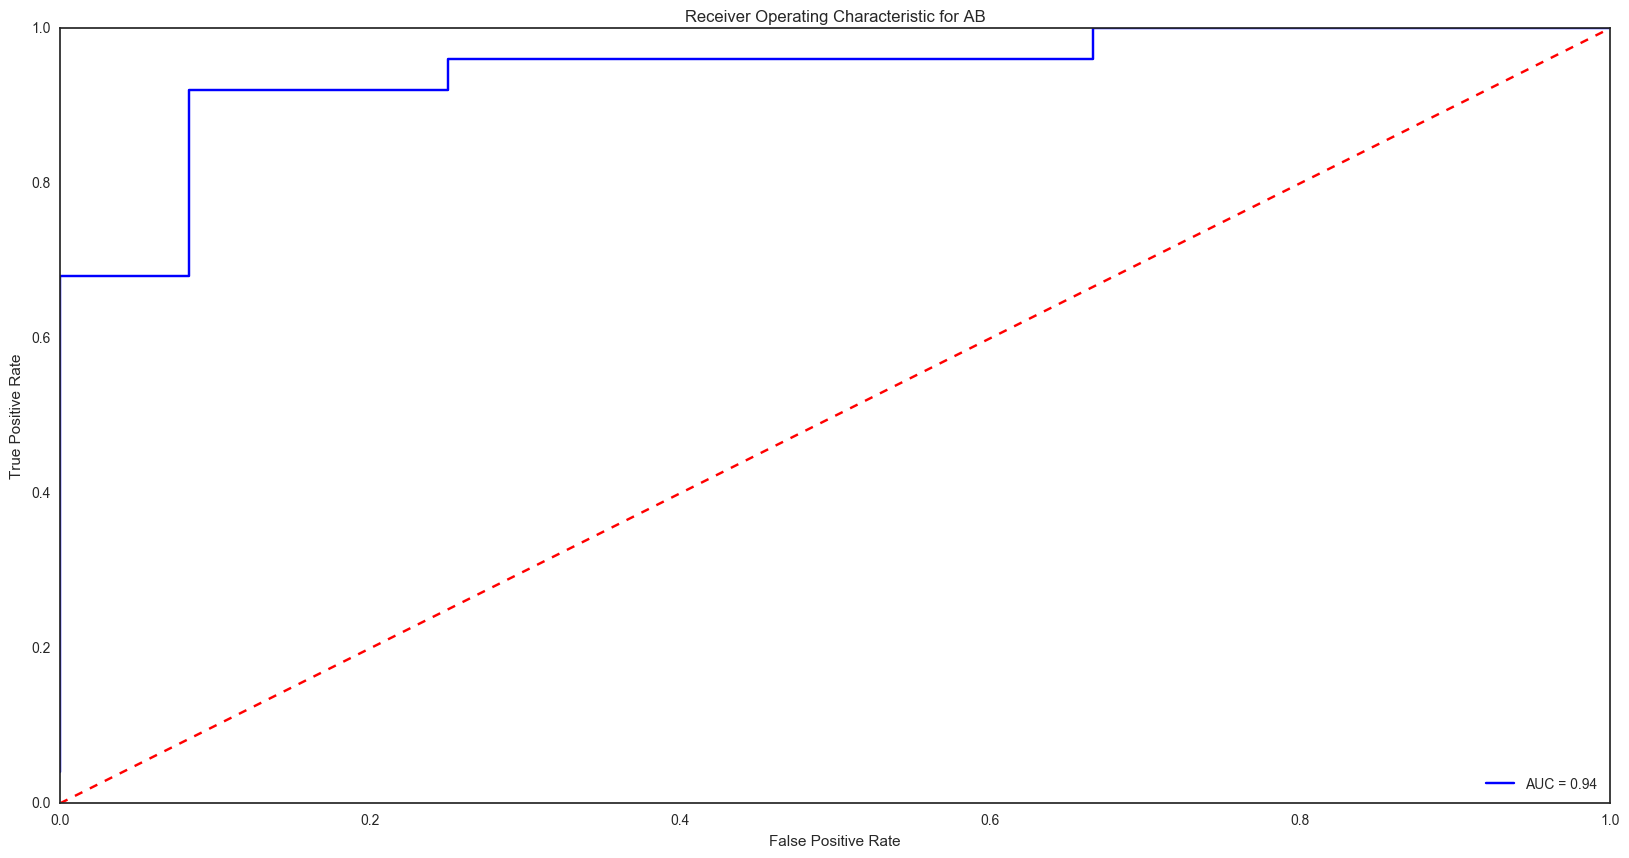

Validation based on GBM
0.891891891892
[[ 9  3]
 [ 1 24]]
[[ 9  3]
 [ 1 24]]
             precision    recall  f1-score   support

        0.0       0.90      0.75      0.82        12
        1.0       0.89      0.96      0.92        25

avg / total       0.89      0.89      0.89        37



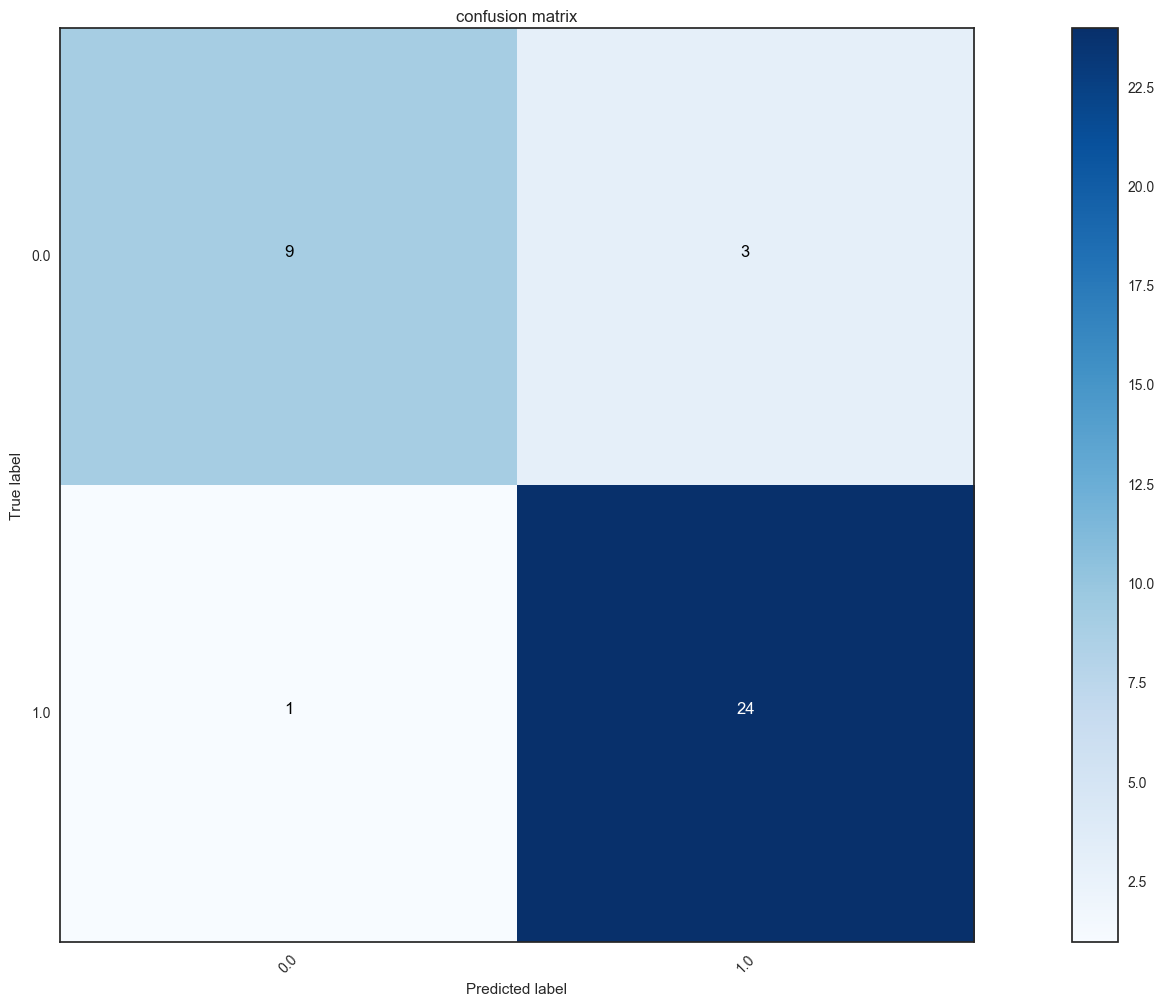

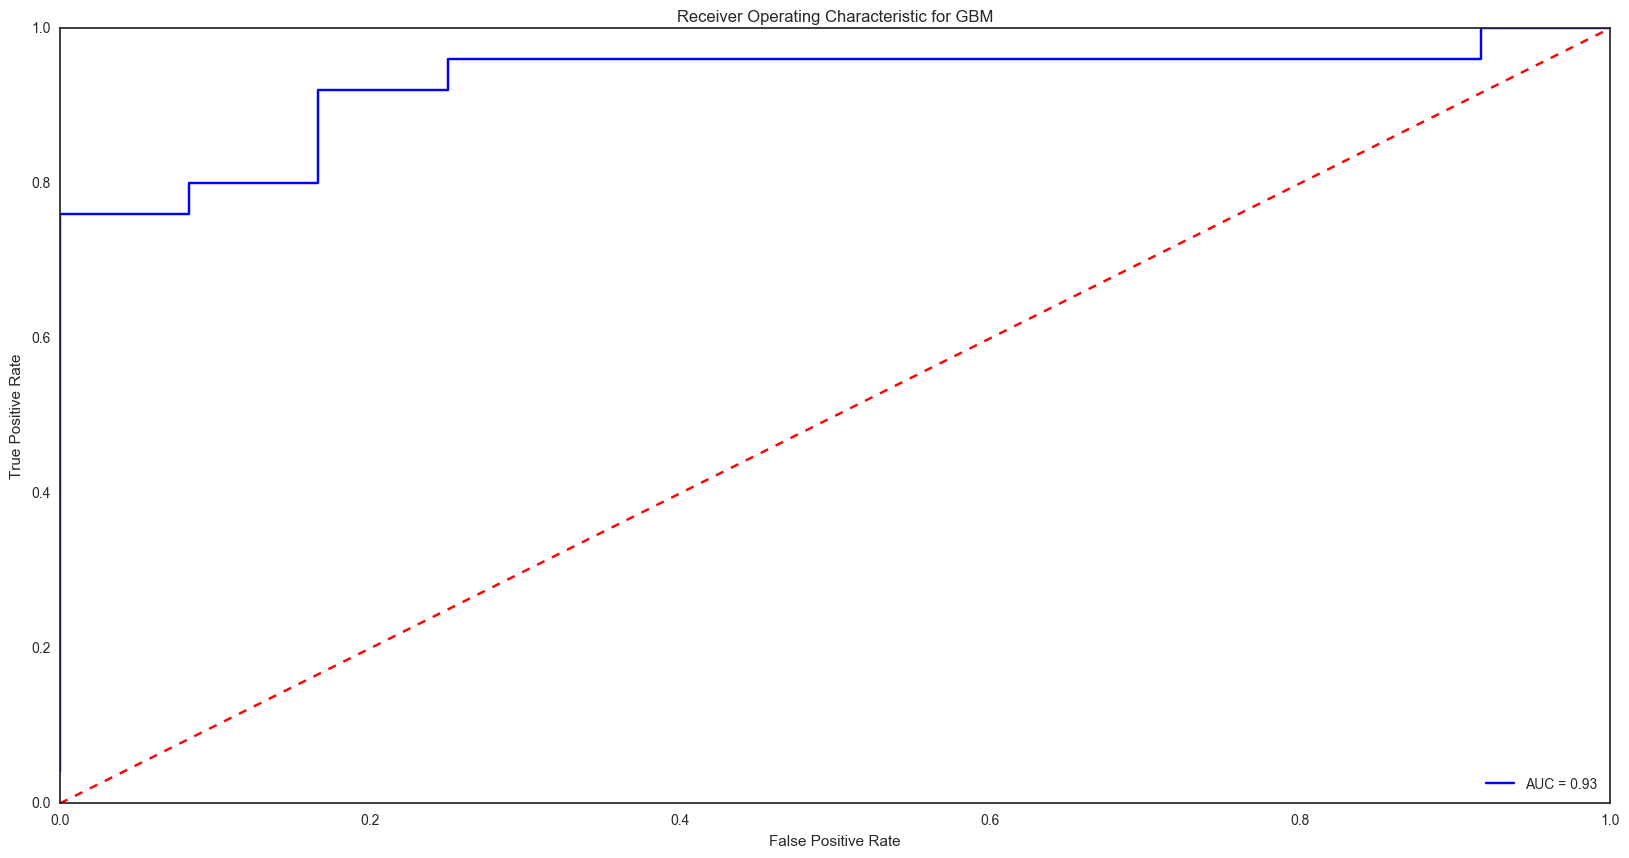

Validation based on RF
0.864864864865
[[ 9  3]
 [ 2 23]]
[[ 9  3]
 [ 2 23]]
             precision    recall  f1-score   support

        0.0       0.82      0.75      0.78        12
        1.0       0.88      0.92      0.90        25

avg / total       0.86      0.86      0.86        37



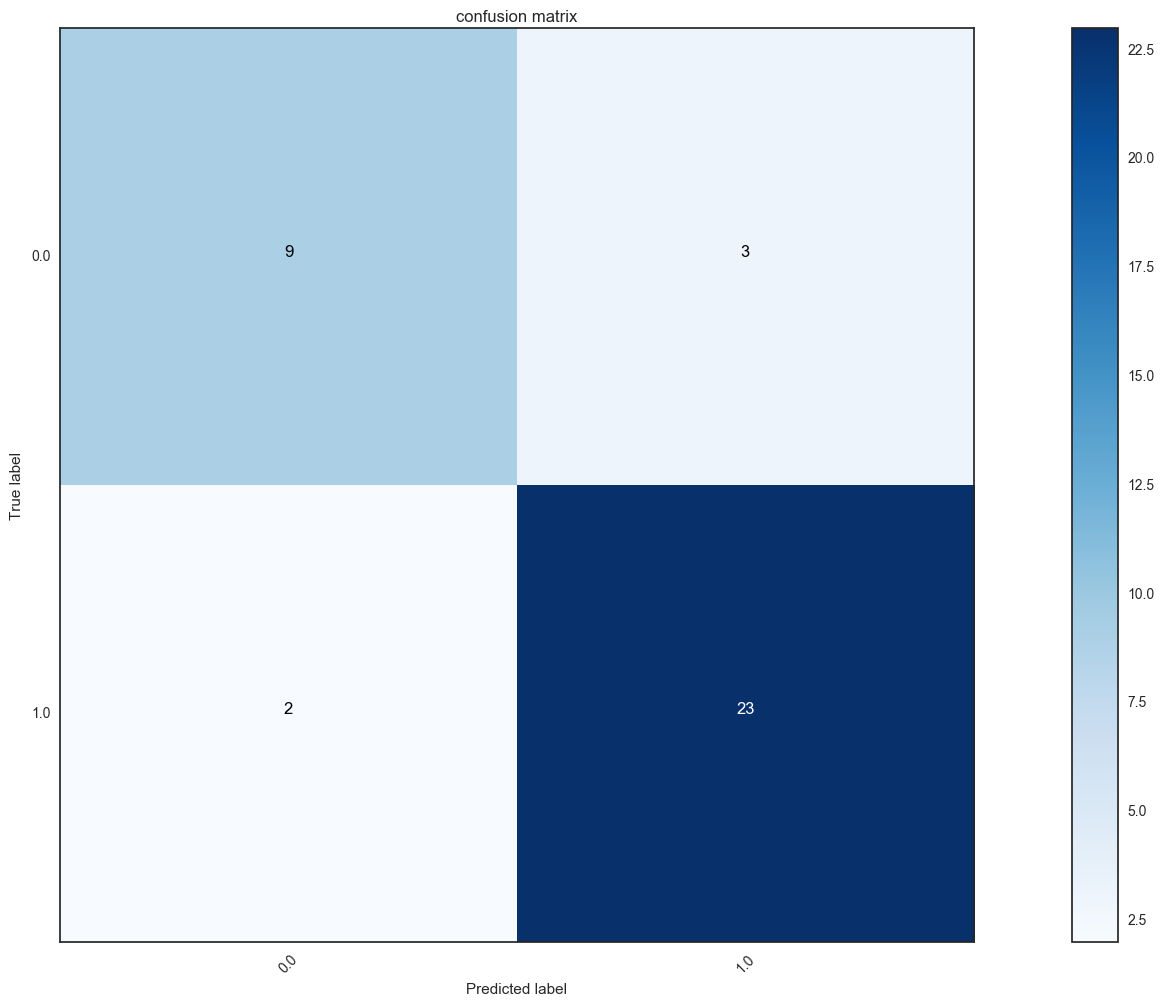

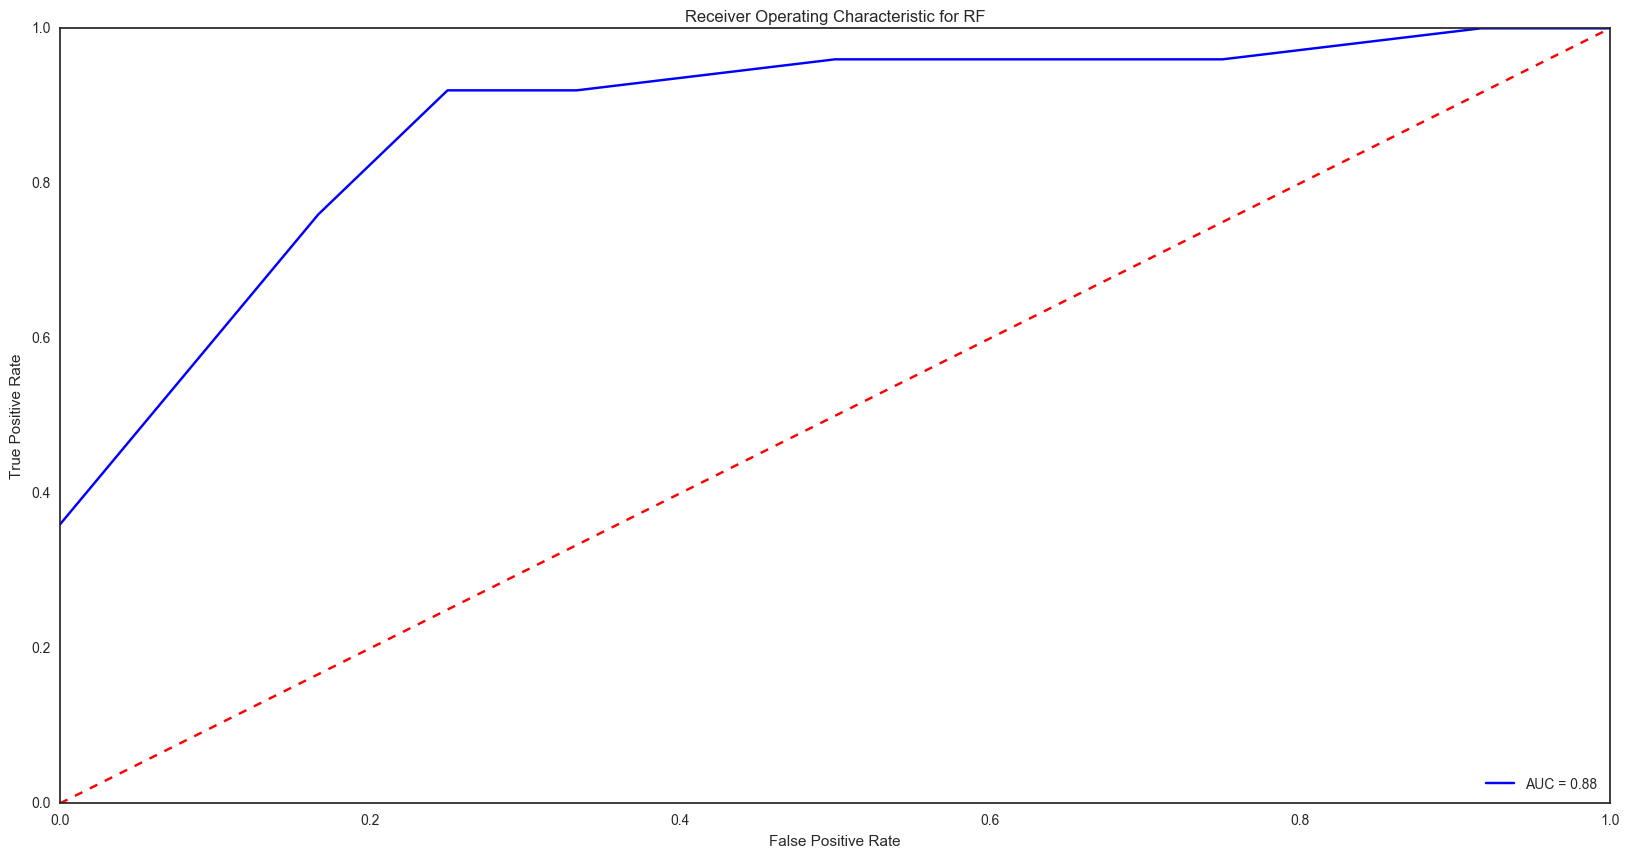

Validation based on ET
0.837837837838
[[ 9  3]
 [ 3 22]]
[[ 9  3]
 [ 3 22]]
             precision    recall  f1-score   support

        0.0       0.75      0.75      0.75        12
        1.0       0.88      0.88      0.88        25

avg / total       0.84      0.84      0.84        37



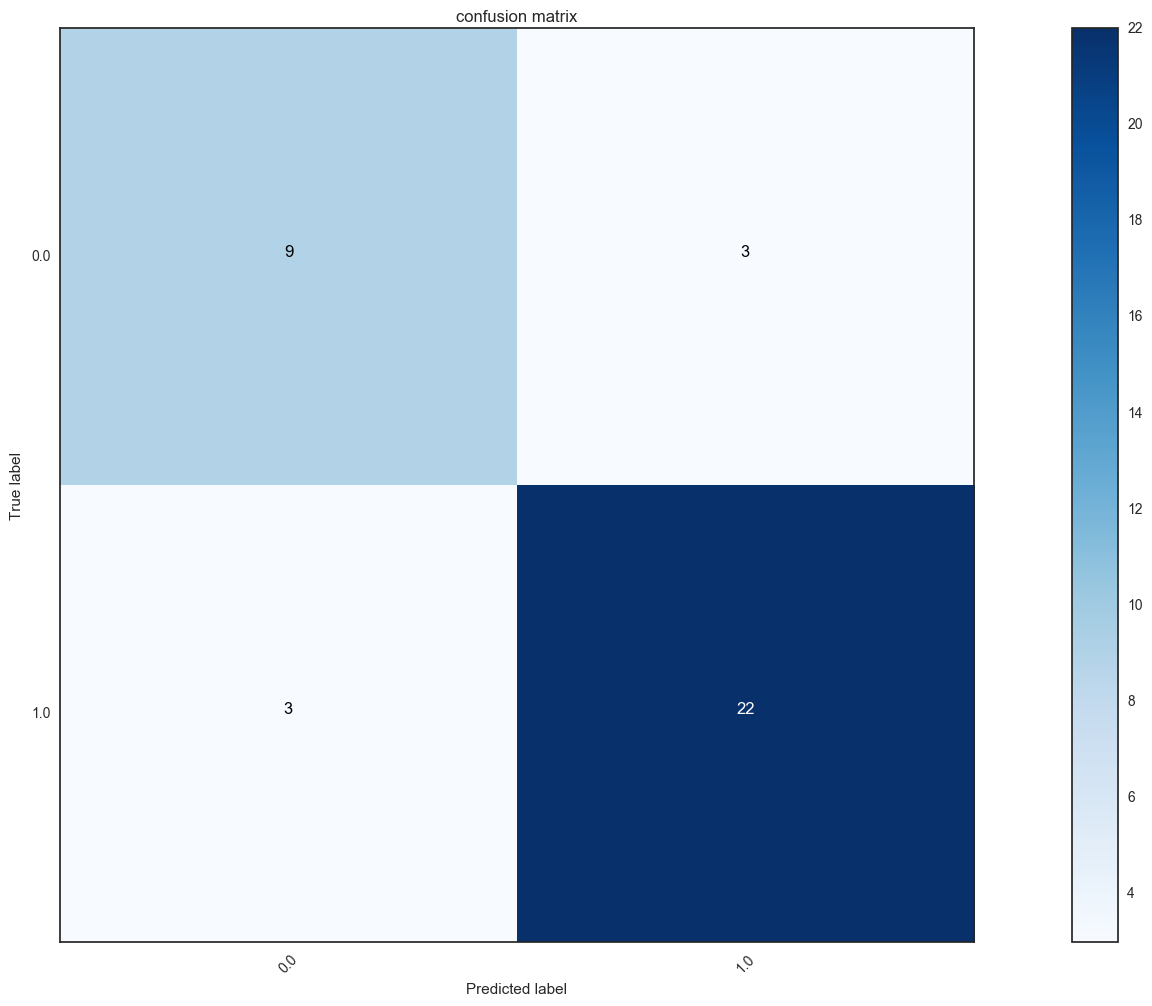

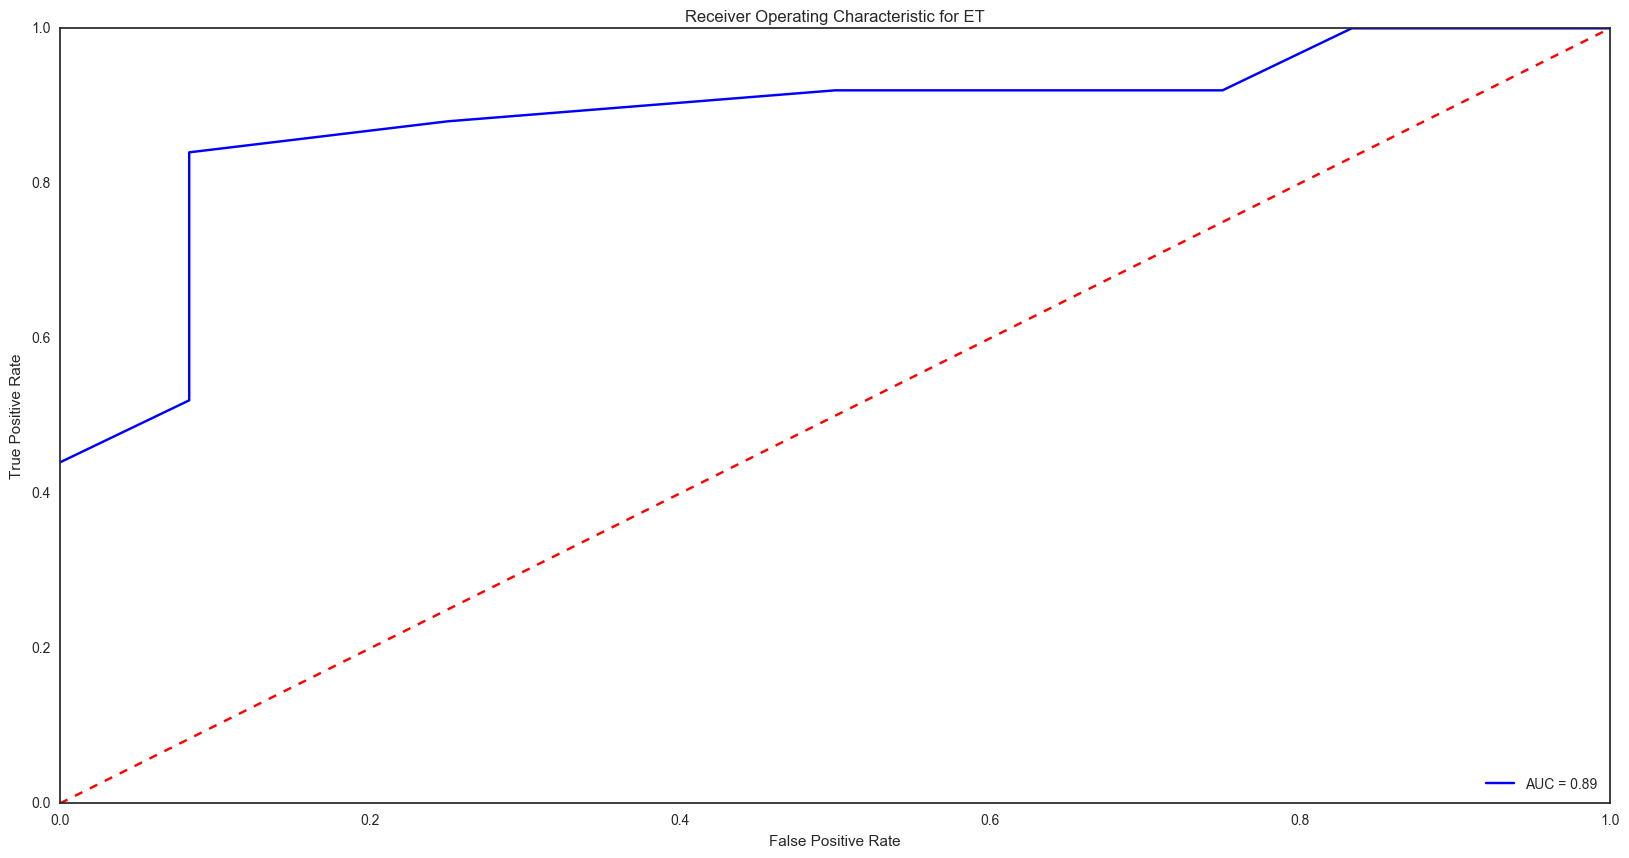

Validation based on XGB
0.891891891892
[[ 9  3]
 [ 1 24]]
[[ 9  3]
 [ 1 24]]
             precision    recall  f1-score   support

        0.0       0.90      0.75      0.82        12
        1.0       0.89      0.96      0.92        25

avg / total       0.89      0.89      0.89        37



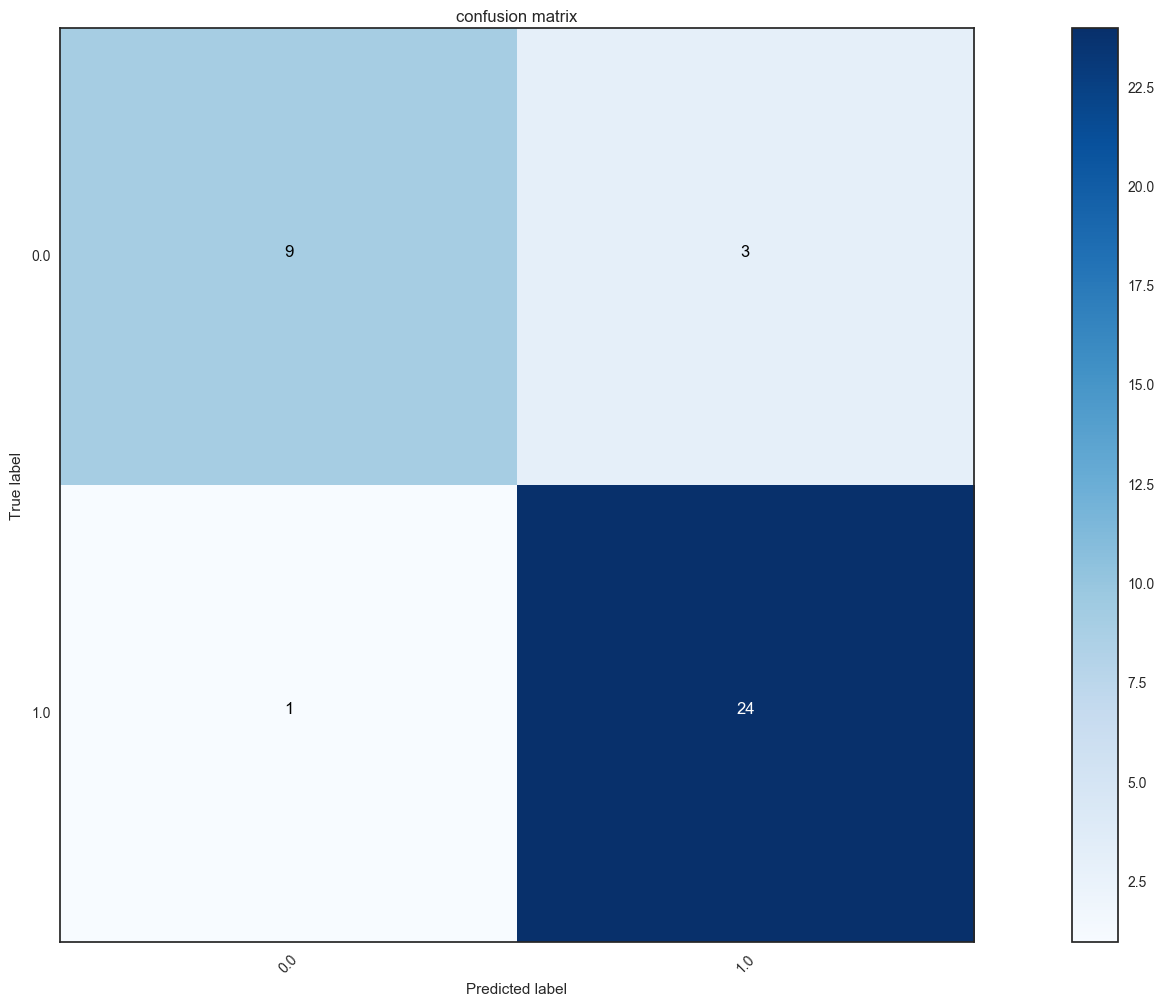

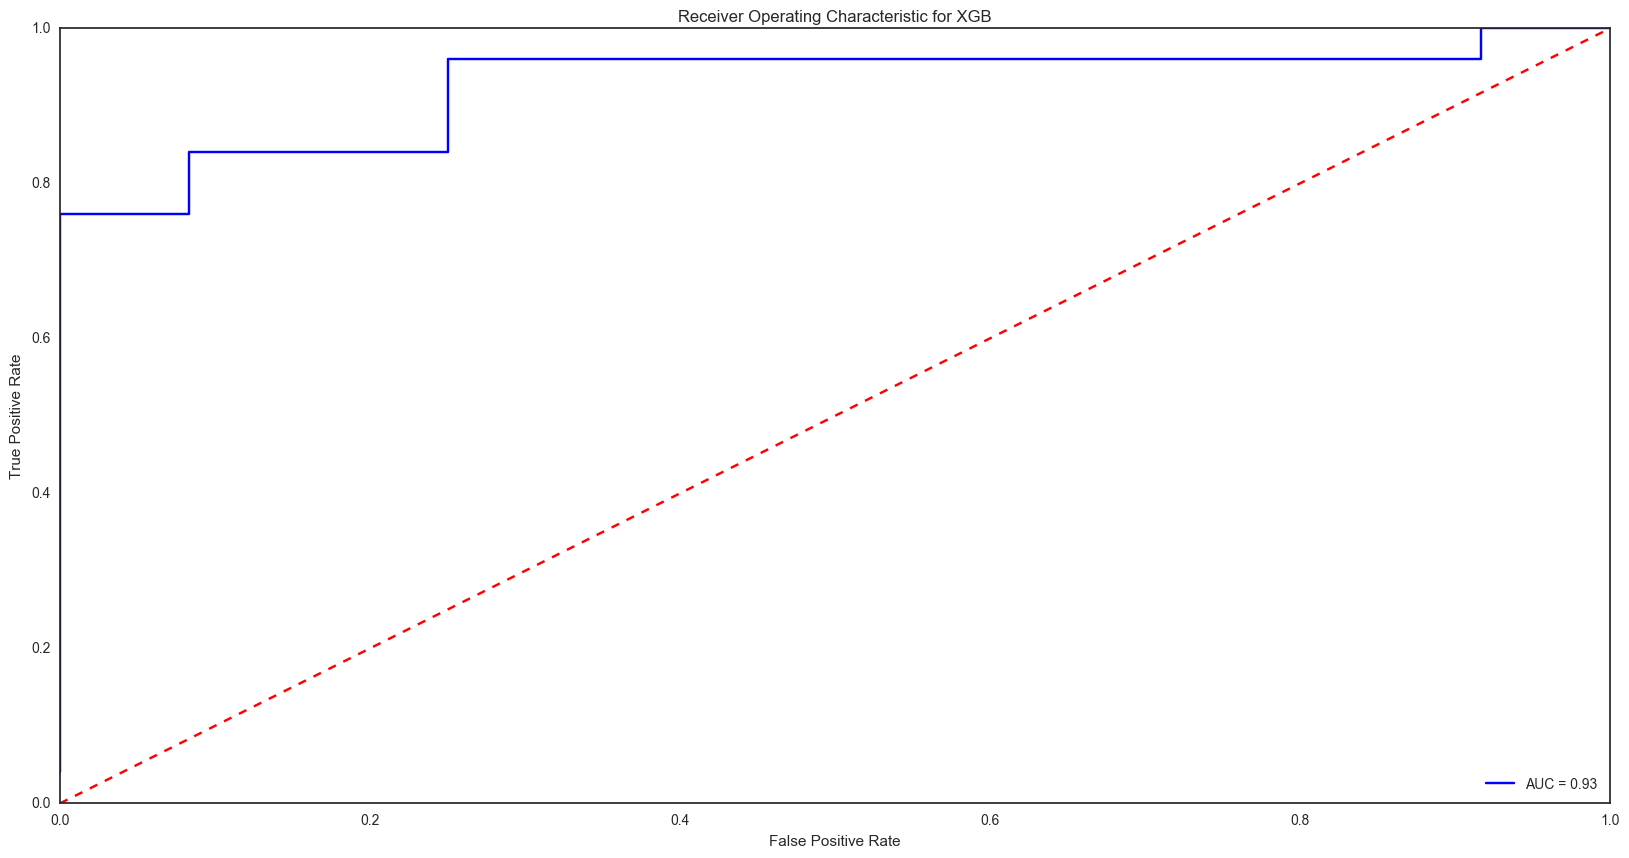

In [140]:
import itertools
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(1)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #if normalize:
    #    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #    print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

def validate_models(training_set, outcome, validation_data, validation_outcome):
    
    models = []
    
    #baselines
    
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC(probability=True)))
    
    #ensemble
    
    models.append(('AB', AdaBoostClassifier()))
    models.append(('GBM', GradientBoostingClassifier()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('ET', ExtraTreesClassifier()))
    models.append(('XGB', xgboost.XGBClassifier()))

    
    for name, model in models:
        mod = model
        mod.fit(training_set, outcome)
        # estimate accuracy on validation dataset
        predictions = mod.predict(validation_data)
        print "Validation based on " + name
        print(accuracy_score(validation_outcome, predictions))
        print(confusion_matrix(validation_outcome, predictions))
        cfmat = confusion_matrix(validation_outcome, predictions)
        plot_confusion_matrix(cfmat, classes=[0.0, 1.0] , title='confusion matrix')
        
        print(classification_report(validation_outcome, predictions))

        # calculate the fpr and tpr for all thresholds of the classification
        probs = mod.predict_proba(validation_data)
        preds = probs[:,1]
        fpr, tpr, threshold = roc_curve(validation_outcome, preds)
        roc_auc = auc(fpr, tpr)
        
        # method I: plt
        plt.figure(2)
        plt.title('Receiver Operating Characteristic for ' + name)
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        
validate_models(X_train, Y_train, X_validation, Y_validation)

# Phase 2

     weight.challenge  score.left  pch.weight  hr.post.challenge   weight  \
138              4.92         5.0       3.252              14.917    4.76   
36               5.67         0.0      -4.938              24.250    5.39   
170              3.61         0.0      -6.925              23.580    3.36   
143              4.68         0.0      -7.051              23.917    4.35   
126              4.54         2.0      -0.881              13.167    4.58   

     outcome  
138      0.0  
36       1.0  
170      1.0  
143      1.0  
126      1.0  
Validation based 
0.891891891892
[[ 9  3]
 [ 1 24]]
             precision    recall  f1-score   support

        0.0       0.90      0.75      0.82        12
        1.0       0.89      0.96      0.92        25

avg / total       0.89      0.89      0.89        37



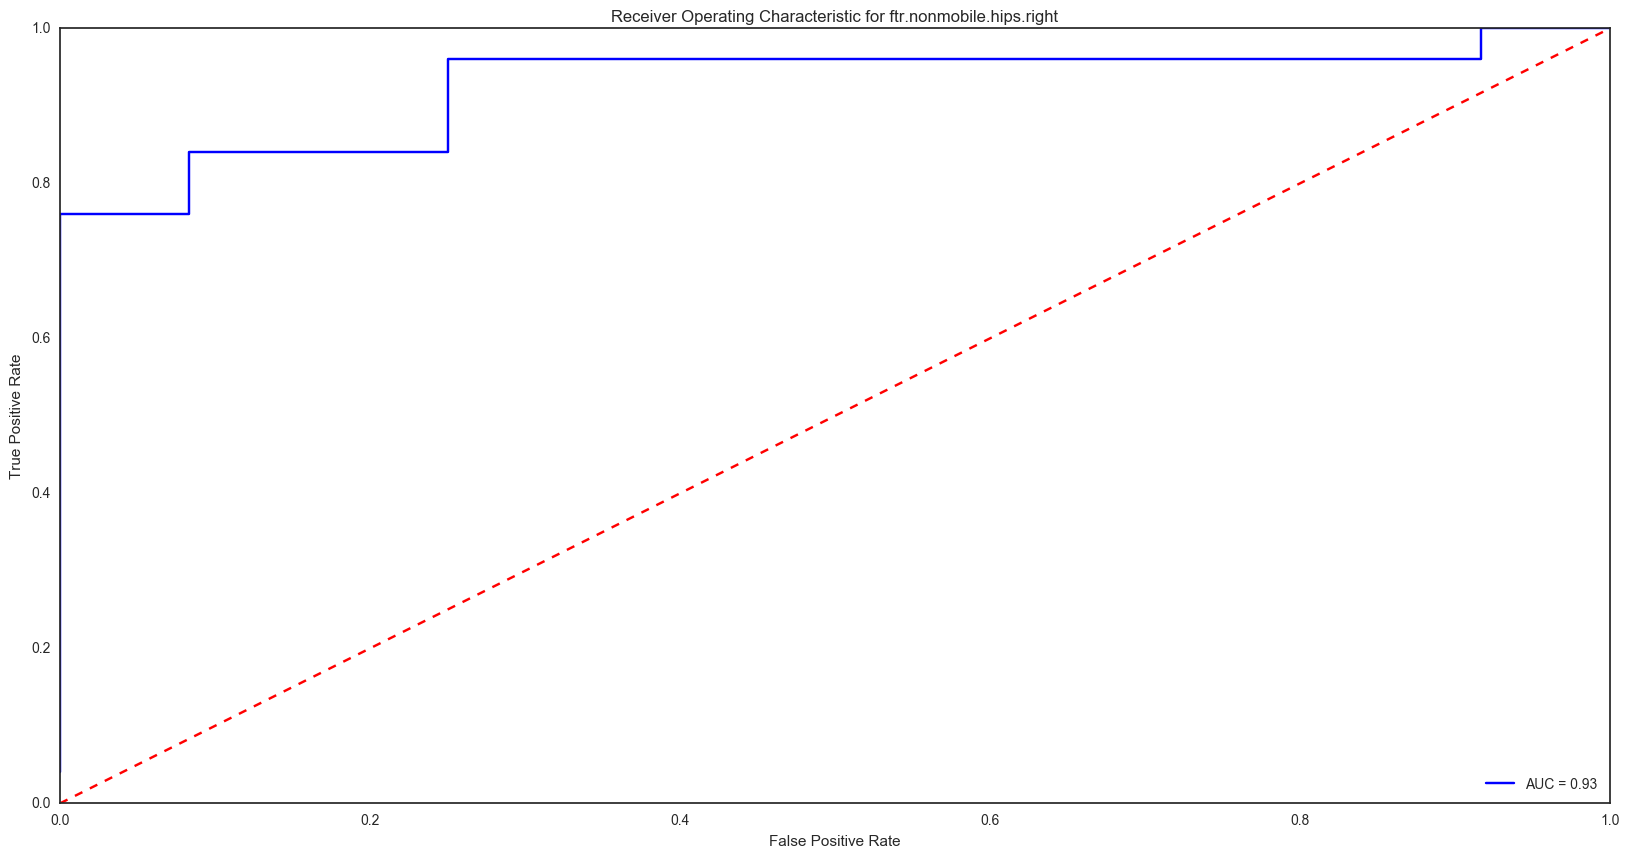

In [141]:
-

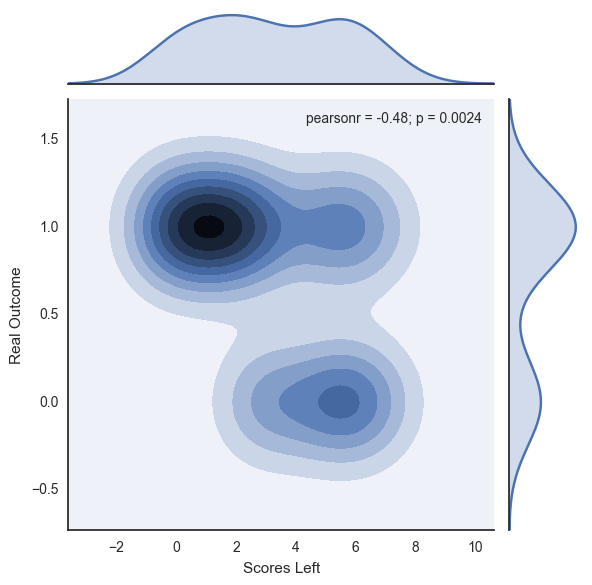

In [142]:
x1 = pd.Series(table["score.left"].values, name="Scores Left")
x2 = pd.Series(Y_validation.values, name="Real Outcome")
g = sns.jointplot(x1, x2, kind="kde")

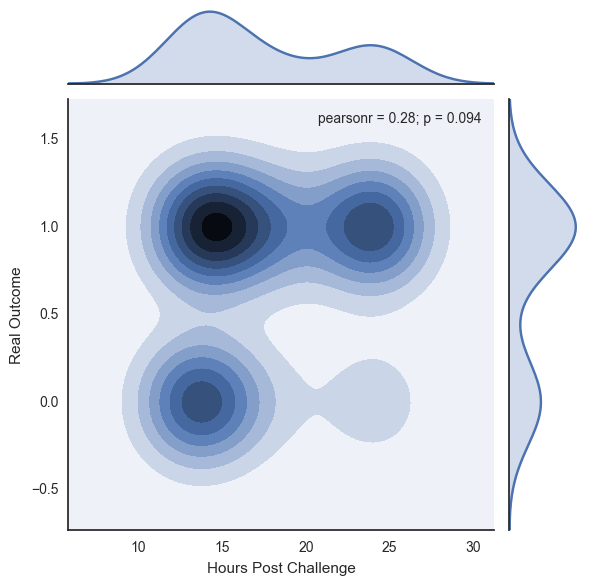

In [143]:
x1 = pd.Series(table["hr.post.challenge "].values, name="Hours Post Challenge")
x2 = pd.Series(Y_validation.values, name="Real Outcome")
g = sns.jointplot(x1, x2, kind="kde")

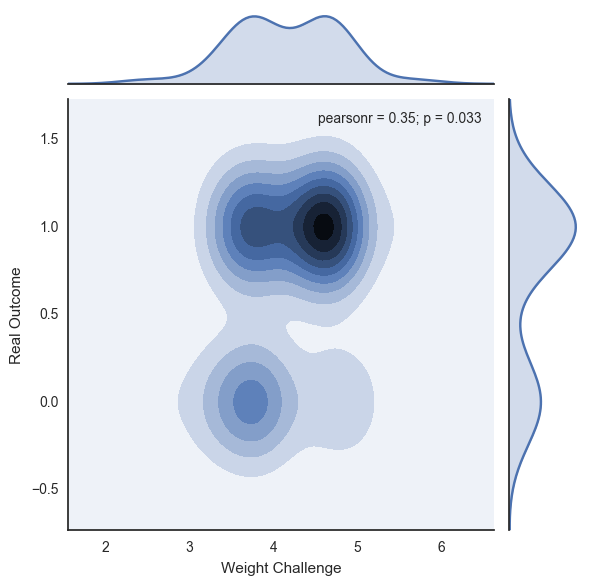

In [144]:
x1 = pd.Series(table["weight.challenge"].values, name="Weight Challenge")
x2 = pd.Series(Y_validation.values, name="Real Outcome")
g = sns.jointplot(x1, x2, kind="kde")